In [1]:
import os
from os import listdir
import random
import sys


## Package
import glob 
import keras
import IPython.display as ipd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objs as go
import plotly.offline as py
import plotly.tools as tls
import seaborn as sns
import scipy.io.wavfile
import tensorflow as tf
# py.init_notebook_mode(connected=True)

## Sklearn
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder


## Rest
from scipy.fftpack import fft
from scipy import signal
from scipy.io import wavfile
from tqdm import tqdm

Using TensorFlow backend.


In [2]:
audio_data_path = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\audio\\audio_rs'

In [4]:
# function to make dataframe of a given emotion
# containing folder_path, images, emotion and label

def make_dataframe(emotion, label):
    
    audio_list = listdir(os.path.join(audio_data_path, emotion))
    folder_path_list = [os.path.join(audio_data_path, emotion)] * len(audio_list)
    emotion_list = [emotion] * len(audio_list)
    label_list = [label] * len(audio_list)
    
    df_emotion = pd.DataFrame()
    df_emotion['folders_path'] = folder_path_list
    df_emotion['audios'] = audio_list
    df_emotion['emotion'] = emotion_list
    df_emotion['label'] = label_list
    
    return df_emotion

__Anger__

In [5]:
# making dataframe of anger

df_anger = make_dataframe('anger', 1)
print('Number of images of angery emotion: ', len(df_anger))

Number of images of angery emotion:  436


In [7]:
df_anger.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-01.wav,anger,1
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-02.wav,anger,1
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-03.wav,anger,1
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-04.wav,anger,1
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-05.wav,anger,1


__Disgust__

In [8]:
# making dataframe of disgust

df_disgust = make_dataframe('disgust', 2)
print('Number of images of disgust emotion: ', len(df_disgust))

Number of images of disgust emotion:  252


In [9]:
df_disgust.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-07-01-01-01-01.wav,disgust,2
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-07-01-01-01-02.wav,disgust,2
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-07-01-01-01-03.wav,disgust,2
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-07-01-01-01-04.wav,disgust,2
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-07-01-01-01-05.wav,disgust,2


__Fear__

In [10]:
# making dataframe of fear

df_fear = make_dataframe('fear', 3)
print('Number of images of fear emotion: ', len(df_fear))

Number of images of fear emotion:  436


In [11]:
df_fear.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-06-01-01-01-01.wav,fear,3
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-06-01-01-01-02.wav,fear,3
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-06-01-01-01-03.wav,fear,3
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-06-01-01-01-04.wav,fear,3
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-06-01-01-01-05.wav,fear,3


__Happiness__

In [12]:
# making dataframe of happiness

df_happy = make_dataframe('happiness', 4)
print('Number of images of happy emotion: ', len(df_happy))

Number of images of happy emotion:  436


In [13]:
df_happy.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-03-01-01-01-01.wav,happiness,4
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-03-01-01-01-02.wav,happiness,4
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-03-01-01-01-03.wav,happiness,4
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-03-01-01-01-04.wav,happiness,4
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-03-01-01-01-05.wav,happiness,4


__Neutral__

In [14]:
# making dataframe of neutral

df_neutral = make_dataframe('neutral', 5)
print('Number of images of neutral emotion: ', len(df_neutral))

Number of images of neutral emotion:  308


In [15]:
df_neutral.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-01-01-01-01-01.wav,neutral,5
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-01-01-01-01-02.wav,neutral,5
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-01-01-01-01-03.wav,neutral,5
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-01-01-01-01-04.wav,neutral,5
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-01-01-01-01-05.wav,neutral,5


__Sadness__

In [16]:
# making dataframe of sad

df_sad = make_dataframe('sadness', 6)
print('Number of images of sad emotion: ', len(df_sad))

Number of images of sad emotion:  436


In [17]:
df_sad.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-04-01-01-01-01.wav,sadness,6
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-04-01-01-01-02.wav,sadness,6
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-04-01-01-01-03.wav,sadness,6
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-04-01-01-01-04.wav,sadness,6
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-04-01-01-01-05.wav,sadness,6


__Surprise__

In [18]:
# making dataframe of surprise

df_surprise = make_dataframe('surprise', 7)
print('Number of images of surprise emotion: ', len(df_surprise))

Number of images of surprise emotion:  252


In [19]:
df_surprise.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-08-01-01-01-01.wav,surprise,7
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-08-01-01-01-02.wav,surprise,7
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-08-01-01-01-03.wav,surprise,7
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-08-01-01-01-04.wav,surprise,7
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-08-01-01-01-05.wav,surprise,7


In [20]:
#concatenating dataframes of all emotions

dataframes = [df_anger, df_disgust, df_fear, df_happy, df_neutral, df_sad, df_surprise]
df = pd.concat(dataframes)
df = df.reset_index(drop=True)
df.shape

(2556, 4)

In [21]:
df.head()

,folders_path,audios,emotion,label
0,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-01.wav,anger,1
1,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-02.wav,anger,1
2,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-03.wav,anger,1
3,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-04.wav,anger,1
4,D:\Aakash\Documents\temp\emotion detection dat...,03-01-05-01-01-01-05.wav,anger,1


__Visualizing audio signals__

In [22]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate, window='hann', nperseg=nperseg, noverlap=noverlap, detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [24]:
filename = os.path.join(df['folders_path'][0], df['audios'][0])
print (filename)

samples, sample_rate = librosa.load(filename)
sample_rate, samples

D:\Aakash\Documents\temp\emotion detection dataset\audio\audio_rs\anger\03-01-05-01-01-01-01.wav


(22050, array([0., 0., 0., ..., 0., 0., 0.], dtype=float32))

Text(0.5, 0, 'Seconds')

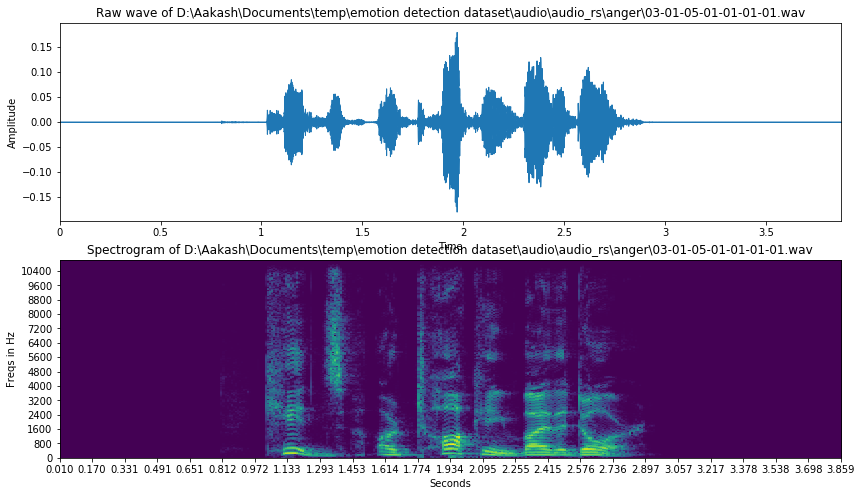

In [25]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [27]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-5.2573381e-07, -4.6874851e-07,  1.7414146e-06, ...,
        -6.3828041e-04, -1.0323879e-04,  1.4417565e-04], dtype=float32),
 array([22016, 63488]))

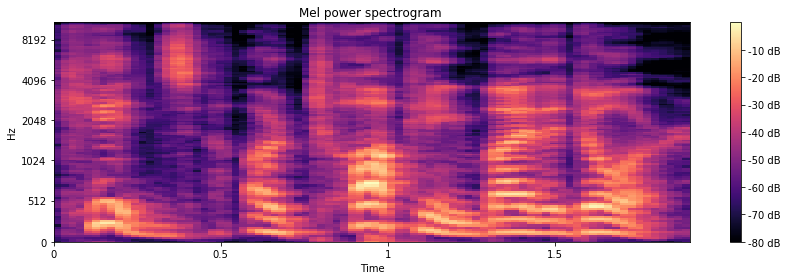

In [28]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

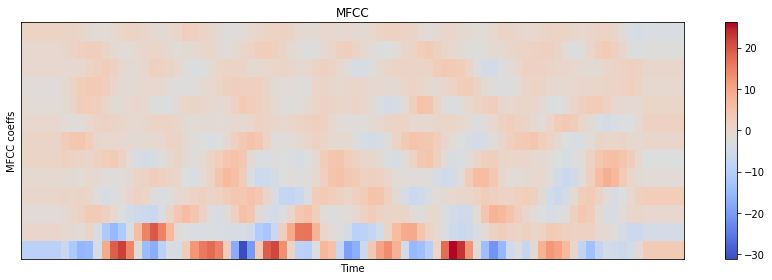

In [29]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

__Extracting features and making dataframes__

In [20]:
# Since all the file in TESS are either of 1 second or 2 second
# Therefore we concantenate the features of more than one audio file for TESS dataset

# making list of files of TESS 

p = 'D:\\Aakash\\Documents\\temp\\emotion detection dataset\\final audio dataset\\Torronto_speech_dataset'
dirs = listdir(p)
lst_all = []
lst_all_path = []
for i in range(len(dirs)):
    dir_p = os.path.join(p, dirs[i])
    lst = listdir(dir_p)
    lst_p = [os.path.join(dir_p, l) for l in lst]
    lst_all += lst
    lst_all_path += lst_p

lst_young = []
lst_old = []
for i in range(len(lst_all)):
    if('Y' in lst_all[i]):
        lst_young.append(lst_all_path[i])
    else:
        lst_old.append(lst_all_path[i])
    
emotions = ['anger', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']
labels = [0, 1, 2, 3, 6, 4, 5]
lst_emotions = []
lst_labels = []
for emotion in emotions:
    lst_emotions += [emotion] * 200
for label in labels:
    lst_labels += [label] * 200

In [21]:
# extracting features for TESS data and then concatenating them

tess_df = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(lst_labels))):
    audio1 = lst_young[i]
    audio2 = lst_old[i]
    y1, sr1 = librosa.load(audio1, res_type='kaiser_fast', duration=2, sr=22050*2,offset=0.5)
    y2, sr3 = librosa.load(audio2, res_type='kaiser_fast', duration=1, sr=22050*2,offset=0.5)
    X = np.array(list(y1) + list(y2))
    sample_rate = np.array(sr1)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    tess_df.loc[i] = [feature]

100%|██████████| 1400/1400 [06:33<00:00,  3.56it/s]


In [22]:
# extracting features for rest of the speech data

data_rs = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(df))):
    X, sample_rate = librosa.load(os.path.join(df['folders_path'][i], df['audios'][i]), res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data_rs.loc[i] = [feature]

100%|██████████| 2556/2556 [07:55<00:00,  5.38it/s]


In [54]:
data[:5]

,feature
0,"[-44.367469643720604, -44.5556815250726, -45.3..."
1,"[-60.59340043578505, -60.59340043578505, -60.5..."
2,"[-6.598600846159973, -4.347036599350118, -5.12..."
3,"[-51.64600829976685, -51.64600829976685, -51.6..."
4,"[-39.097204511558665, -38.48829617643139, -37...."


In [72]:
data = pd.concat([tess_df, data_rs], ignore_index = True)

In [73]:
df3 = pd.DataFrame(data['feature'].values.tolist())

In [74]:
labels = lst_emotions
labels += df['emotion'].tolist()
labels = pd.DataFrame(labels)
newdf = pd.concat([df3,labels], axis=1, ignore_index = True)
rnewdf = newdf.rename(index=str, columns={259: "label"})
rnewdf = rnewdf.T.fillna(rnewdf.mean(axis=1)).T

In [75]:
len(lst_emotions)

3956

In [76]:
rnewdf.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-14.1466,-17.3939,-26.6736,-27.6981,-28.2481,-27.9993,-29.4383,-28.5235,-27.6006,-29.0867,...,-28.7453,-28.7453,-28.7453,-28.7453,-28.7453,-28.7453,-28.7453,-28.7453,-28.7453,anger
1,-9.86139,-13.7706,-29.714,-31.2592,-31.6706,-31.5266,-30.456,-30.309,-30.7089,-30.0353,...,-29.1115,-29.1115,-29.1115,-29.1115,-29.1115,-29.1115,-29.1115,-29.1115,-29.1115,anger
2,-16.6497,-20.6011,-33.1576,-31.9017,-30.7993,-30.9058,-31.8414,-32.6184,-27.4565,-26.3988,...,-30.3202,-30.3202,-30.3202,-30.3202,-30.3202,-30.3202,-30.3202,-30.3202,-30.3202,anger
3,-13.5639,-16.8556,-27.0729,-28.5707,-28.2956,-27.8958,-28.0998,-28.2438,-29.1346,-29.5158,...,-29.3579,-29.3579,-29.3579,-29.3579,-29.3579,-29.3579,-29.3579,-29.3579,-29.3579,anger
4,-16.2214,-19.3427,-27.6042,-30.2216,-27.5985,-26.7782,-27.4752,-21.8305,-16.2416,-14.3194,...,-24.8062,-24.8062,-24.8062,-24.8062,-24.8062,-24.8062,-24.8062,-24.8062,-24.8062,anger


In [25]:
from sklearn.utils import shuffle
rnewdf = shuffle(newdf)
rnewdf[:10]

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
3519,-60.908027,-60.908027,-60.908027,-60.908027,-60.908027,-60.908027,-60.908027,-60.908027,-60.908027,-60.908027,...,-52.146051,-51.094690,-50.634876,-52.243951,-51.795944,-52.350265,-54.328481,-51.590965,-47.711046,sadness
3741,-63.905578,-63.905578,-63.905578,-63.905578,-63.905578,-63.905578,-63.905578,-63.905578,-63.905578,-63.905578,...,-63.905578,-63.905578,-63.905578,-63.862501,-63.374674,-63.464737,-63.905578,-63.905578,-63.905578,surprise
73,-9.807045,-13.685949,-28.175424,-27.898549,-27.327249,-28.195141,-30.032125,-30.634765,-32.650754,-33.981383,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,anger
3776,-65.059177,-65.059177,-65.059177,-65.059177,-65.059177,-65.059177,-65.059177,-65.059177,-65.059177,-65.059177,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,surprise
2136,-59.449245,-60.975841,-62.336355,-62.336355,-62.336355,-61.444703,-62.336355,-62.336355,-62.336109,-62.336355,...,-33.334226,-36.692335,-36.934009,NaN,NaN,NaN,NaN,NaN,NaN,fear
826,-15.999137,-19.064329,-22.660942,-23.701229,-24.188805,-23.501625,-22.817596,-22.234224,-22.721121,-22.362992,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,neutral
3070,-52.853276,-54.419995,-54.794745,-52.099746,-51.257262,-53.530611,-52.675849,-52.425973,-53.017561,-54.100564,...,-29.356200,-29.231900,-27.919522,-28.266602,-29.632794,-31.098347,-30.708820,-27.571162,-23.748679,neutral
1103,-7.101738,-11.413138,-28.701948,-27.424749,-25.154072,-24.689147,-25.131513,-24.170292,-21.793029,-20.921337,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,sadness
2071,-37.362339,-28.121708,-24.814530,-23.489686,-22.065641,-22.092005,-24.273008,-27.490105,-29.957546,-32.503874,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,disgust
369,-24.417240,-27.813718,-35.132523,-34.365253,-33.867761,-34.096731,-35.835655,-35.527014,-35.019121,-34.906163,...,-34.975218,-34.977972,-36.207013,-39.061302,-38.498295,-36.832452,-34.768358,-30.691730,-25.895122,disgust


In [77]:
rnewdf.isnull().sum().sum()

0

In [29]:
def noise(data):
    # https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])
    return data

def pitch(data, sample_rate):
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data = librosa.effects.pitch_shift(data.astype('float64'), 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data


In [31]:
syn_data1_tess = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(lst_labels))):
    audio1 = lst_young[i]
    audio2 = lst_old[i]
    y1, sr1 = librosa.load(audio1, res_type='kaiser_fast', duration=2, sr=22050*2,offset=0.5)
    y2, sr3 = librosa.load(audio2, res_type='kaiser_fast', duration=1, sr=22050*2,offset=0.5)
    X = np.array(list(y1) + list(y2))
    sample_rate = sr1
    if lst_emotions[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1_tess.loc[i] = [feature, lst_emotions[i]]

100%|██████████| 1400/1400 [05:13<00:00,  6.96it/s]


In [32]:
syn_data1_rs = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(df))):
    X, sample_rate = librosa.load(os.path.join(df['folders_path'][i], df['audios'][i]), res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)
    if df.emotion[i]:
        X = noise(X)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data1_rs.loc[i] = [feature, df.emotion[i]]

100%|██████████| 2556/2556 [05:51<00:00,  7.27it/s]


In [78]:
syn_data1 = pd.concat([syn_data1_tess, syn_data1_rs], ignore_index = True)

In [42]:
syn_data2_tess = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(lst_labels))):
    audio1 = lst_young[i]
    audio2 = lst_old[i]
    y1, sr1 = librosa.load(audio1, res_type='kaiser_fast', duration=2, sr=22050*2,offset=0.5)
    y2, sr3 = librosa.load(audio2, res_type='kaiser_fast', duration=1, sr=22050*2,offset=0.5)
    X = np.array(list(y1) + list(y2))
    sample_rate = sr1
    if lst_emotions[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2_tess.loc[i] = [feature, lst_emotions[i]]

100%|██████████| 1400/1400 [32:18<00:00,  1.40s/it]


In [43]:
len(lst_emotions)

1400

In [35]:
syn_data2_rs = pd.DataFrame(columns=['feature', 'label'])
for i in tqdm(range(len(df))):
    X, sample_rate = librosa.load(os.path.join(df['folders_path'][i], df['audios'][i]), res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)
    if df.emotion[i]:
        X = pitch(X, sample_rate)
        sample_rate = np.array(sample_rate)
        mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
        feature = mfccs
        a = random.uniform(0, 1)
        syn_data2_rs.loc[i] = [feature, df.emotion[i]]

100%|██████████| 2556/2556 [57:54<00:00,  1.47s/it] 


In [79]:
syn_data2 = pd.concat([syn_data2_tess, syn_data2_rs], ignore_index = True)

In [80]:
len(syn_data1), len(syn_data2)

(3956, 3956)

In [81]:
syn_data1 = syn_data1.reset_index(drop=True)
syn_data2 = syn_data2.reset_index(drop=True)
rnewdf = rnewdf.reset_index(drop=True)

In [82]:
syn_data1.head()

,feature,label
0,"[-13.849019407450449, -16.56819838263772, -22....",anger
1,"[-9.735269805996694, -13.386416828726016, -28....",anger
2,"[-16.048389918436744, -19.597472547650632, -28...",anger
3,"[-13.464413372436146, -16.651382578993346, -26...",anger
4,"[-16.17961207842293, -19.14429133283781, -26.9...",anger


In [84]:
df4 = pd.DataFrame(syn_data1['feature'].values.tolist())
labels4 = syn_data1.label
syndf1 = pd.concat([df4,labels4], axis=1)
syndf1 = syndf1.rename(index=str, columns={"0": "label"})
# syndf1 = syndf1.fillna(0)
syndf1 = syndf1.T.fillna(syndf1.mean(axis=1)).T
syndf1.shape

(3956, 260)

In [86]:
syndf1.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-13.849,-16.5682,-22.7666,-26.6239,-26.3547,-25.1844,-25.5462,-25.8224,-24.8456,-27.9574,...,-24.9569,-24.9569,-24.9569,-24.9569,-24.9569,-24.9569,-24.9569,-24.9569,-24.9569,anger
1,-9.73527,-13.3864,-28.4955,-30.4534,-28.5763,-27.5005,-27.2072,-27.9003,-27.8429,-25.8693,...,-25.7853,-25.7853,-25.7853,-25.7853,-25.7853,-25.7853,-25.7853,-25.7853,-25.7853,anger
2,-16.0484,-19.5975,-28.4692,-28.7245,-27.6174,-27.3751,-27.0754,-28.7607,-25.4703,-25.2227,...,-27.3219,-27.3219,-27.3219,-27.3219,-27.3219,-27.3219,-27.3219,-27.3219,-27.3219,anger
3,-13.4644,-16.6514,-26.814,-28.4028,-28.1379,-27.7293,-27.7838,-27.8526,-28.4813,-28.9675,...,-28.8641,-28.8641,-28.8641,-28.8641,-28.8641,-28.8641,-28.8641,-28.8641,-28.8641,anger
4,-16.1796,-19.1443,-26.9811,-29.6739,-26.4489,-25.8602,-26.6845,-20.7372,-15.4611,-13.3579,...,-23.7093,-23.7093,-23.7093,-23.7093,-23.7093,-23.7093,-23.7093,-23.7093,-23.7093,anger


In [87]:
df4 = pd.DataFrame(syn_data2['feature'].values.tolist())
labels4 = syn_data2.label
syndf2 = pd.concat([df4,labels4], axis=1)
syndf2 = syndf2.rename(index=str, columns={"0": "label"})
# syndf2 = syndf2.fillna(0)
syndf2 = syndf2.T.fillna(syndf2.mean(axis=1)).T
syndf2.shape

(3956, 260)

In [88]:
syndf2.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-13.2291,-17.0489,-29.186,-30.5347,-30.6815,-32.5144,-32.6419,-33.7586,-33.2735,-33.0379,...,-32.8569,-32.8569,-32.8569,-32.8569,-32.8569,-32.8569,-32.8569,-32.8569,-32.8569,anger
1,-7.74779,-12.0722,-32.7575,-34.3871,-34.517,-34.0695,-33.7107,-35.7899,-35.637,-33.6343,...,-32.5963,-32.5963,-32.5963,-32.5963,-32.5963,-32.5963,-32.5963,-32.5963,-32.5963,anger
2,-16.9726,-21.0817,-35.2623,-34.0967,-33.5784,-33.046,-32.3435,-32.9473,-30.9133,-31.0821,...,-33.0213,-33.0213,-33.0213,-33.0213,-33.0213,-33.0213,-33.0213,-33.0213,-33.0213,anger
3,-15.1338,-18.4167,-29.4723,-32.2047,-33.1459,-33.0406,-33.4746,-35.5469,-35.5711,-32.8721,...,-32.929,-32.929,-32.929,-32.929,-32.929,-32.929,-32.929,-32.929,-32.929,anger
4,-16.3659,-19.6469,-29.2719,-29.9369,-29.2148,-29.0956,-26.6964,-20.7798,-16.2555,-15.3147,...,-26.845,-26.845,-26.845,-26.845,-26.845,-26.845,-26.845,-26.845,-26.845,anger


In [89]:
combined_df = pd.concat([rnewdf, syndf1, syndf2], ignore_index=True)
combined_df = combined_df.fillna(0)
combined_df.head()

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,label
0,-14.146636,-17.393934,-26.673644,-27.698061,-28.248122,-27.999279,-29.438322,-28.523528,-27.600598,-29.086704,...,-28.745329,-28.745329,-28.745329,-28.745329,-28.745329,-28.745329,-28.745329,-28.745329,-28.745329,anger
1,-9.861386,-13.770627,-29.714045,-31.259181,-31.670597,-31.526615,-30.456018,-30.308974,-30.708918,-30.035270,...,-29.111453,-29.111453,-29.111453,-29.111453,-29.111453,-29.111453,-29.111453,-29.111453,-29.111453,anger
2,-16.649676,-20.601113,-33.157565,-31.901663,-30.799279,-30.905825,-31.841404,-32.618360,-27.456481,-26.398847,...,-30.320206,-30.320206,-30.320206,-30.320206,-30.320206,-30.320206,-30.320206,-30.320206,-30.320206,anger
3,-13.563900,-16.855584,-27.072878,-28.570732,-28.295611,-27.895841,-28.099773,-28.243841,-29.134636,-29.515783,...,-29.357926,-29.357926,-29.357926,-29.357926,-29.357926,-29.357926,-29.357926,-29.357926,-29.357926,anger
4,-16.221396,-19.342689,-27.604158,-30.221644,-27.598509,-26.778208,-27.475236,-21.830539,-16.241639,-14.319386,...,-24.806228,-24.806228,-24.806228,-24.806228,-24.806228,-24.806228,-24.806228,-24.806228,-24.806228,anger


In [90]:
len(combined_df)

11868

In [91]:
combined_df.to_csv('data_mfcc_aug.csv', sep=',', encoding='utf-8', index = False)

In [ ]:
X = combined_df.drop(['label'], axis=1)
y = combined_df.label
xxx = StratifiedShuffleSplit(1, test_size=0.2, random_state=12)
for train_index, test_index in xxx.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [ ]:
y_train.value_counts()

In [ ]:
y_test.value_counts()

In [ ]:
X_train.isna().sum().sum()

In [ ]:
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
lb = LabelEncoder()
y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))

In [ ]:
X_train.shape

In [ ]:
x_traincnn = np.expand_dims(X_train, axis=2)
x_testcnn = np.expand_dims(X_test, axis=2)

In [ ]:
model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.SGD(lr=0.0001, momentum=0.0, decay=0.0, nesterov=False)

In [ ]:
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy', fscore])

In [ ]:
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint('model/aug_noiseNshift_2class2_np.h5', save_best_only=True, monitor='val_loss', mode='min')
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=700,
                     validation_data=(x_testcnn, y_test), callbacks=[mcp_save, lr_reduce])

In [ ]:
import json
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

# load weights into new model
loaded_model.load_weights("model/aug_noiseNshift_2class2_np.h5")
print("Loaded model from disk")
 
# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
score = loaded_model.evaluate(x_testcnn, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [60]:
newdf1 = np.random.rand(len(rnewdf)) < 0.8
train = rnewdf[newdf1]
test = rnewdf[~newdf1]

In [61]:
trainfeatures = train.iloc[:, :-1]

In [62]:
trainlabel = train.iloc[:, -1:]

In [63]:
testfeatures = test.iloc[:, :-1]

In [64]:
testlabel = test.iloc[:, -1:]

In [65]:
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

X_train = np.array(trainfeatures)
y_train = np.array(trainlabel)
X_test = np.array(testfeatures)
y_test = np.array(testlabel)

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))
y_train

C:\Users\AAKASH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\AAKASH\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [66]:
X_train.shape

(2043, 259)

In [68]:
x_traincnn =np.expand_dims(X_train, axis=2)
x_testcnn= np.expand_dims(X_test, axis=2)

In [77]:
model = Sequential()

model.add(Conv1D(256, 5,padding='same',
                 input_shape=(259,1)))
model.add(Activation('relu'))
model.add(Conv1D(128, 5,padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Conv1D(128, 5,padding='same',))
#model.add(Activation('relu'))
#model.add(Dropout(0.2))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(7))
model.add(Activation('softmax'))
opt = keras.optimizers.rmsprop(lr=0.00001, decay=1e-6)

In [78]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_9 (Conv1D)            (None, 259, 256)          1536      
_________________________________________________________________
activation_11 (Activation)   (None, 259, 256)          0         
_________________________________________________________________
conv1d_10 (Conv1D)           (None, 259, 128)          163968    
_________________________________________________________________
activation_12 (Activation)   (None, 259, 128)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 259, 128)          0         
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 32, 128)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 32, 128)           82048     
__________

In [79]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

In [83]:
cnnhistory=model.fit(x_traincnn, y_train, batch_size=16, epochs=300, validation_data=(x_testcnn, y_test))

Train on 2043 samples, validate on 513 samples
Epoch 1/300
2043/2043 [==============================] - ETA: 1:52 - loss: 1.8346 - acc: 0.187 - ETA: 1:45 - loss: 1.7722 - acc: 0.312 - ETA: 1:35 - loss: 1.7509 - acc: 0.312 - ETA: 1:28 - loss: 1.7190 - acc: 0.375 - ETA: 1:21 - loss: 1.7592 - acc: 0.325 - ETA: 1:16 - loss: 1.7472 - acc: 0.333 - ETA: 1:11 - loss: 1.7243 - acc: 0.330 - ETA: 1:07 - loss: 1.7039 - acc: 0.359 - ETA: 1:04 - loss: 1.7155 - acc: 0.340 - ETA: 1:00 - loss: 1.7363 - acc: 0.331 - ETA: 57s - loss: 1.7452 - acc: 0.329 - ETA: 55s - loss: 1.7295 - acc: 0.33 - ETA: 52s - loss: 1.7304 - acc: 0.34 - ETA: 50s - loss: 1.7219 - acc: 0.34 - ETA: 48s - loss: 1.7088 - acc: 0.35 - ETA: 46s - loss: 1.7000 - acc: 0.37 - ETA: 45s - loss: 1.6966 - acc: 0.36 - ETA: 43s - loss: 1.6976 - acc: 0.36 - ETA: 42s - loss: 1.6892 - acc: 0.37 - ETA: 41s - loss: 1.6798 - acc: 0.37 - ETA: 40s - loss: 1.6854 - acc: 0.36 - ETA: 39s - loss: 1.6828 - acc: 0.37 - ETA: 38s - loss: 1.6828 - acc: 0.37 - E

2043/2043 [==============================] - ETA: 29s - loss: 1.5908 - acc: 0.50 - ETA: 31s - loss: 1.5764 - acc: 0.40 - ETA: 32s - loss: 1.6428 - acc: 0.35 - ETA: 32s - loss: 1.6744 - acc: 0.32 - ETA: 32s - loss: 1.6877 - acc: 0.33 - ETA: 32s - loss: 1.6762 - acc: 0.36 - ETA: 31s - loss: 1.6757 - acc: 0.35 - ETA: 31s - loss: 1.6636 - acc: 0.36 - ETA: 30s - loss: 1.6962 - acc: 0.34 - ETA: 30s - loss: 1.7020 - acc: 0.32 - ETA: 29s - loss: 1.7113 - acc: 0.32 - ETA: 29s - loss: 1.7147 - acc: 0.31 - ETA: 29s - loss: 1.7208 - acc: 0.31 - ETA: 28s - loss: 1.7275 - acc: 0.31 - ETA: 28s - loss: 1.7349 - acc: 0.31 - ETA: 28s - loss: 1.7358 - acc: 0.30 - ETA: 27s - loss: 1.7348 - acc: 0.30 - ETA: 27s - loss: 1.7205 - acc: 0.31 - ETA: 27s - loss: 1.7161 - acc: 0.31 - ETA: 27s - loss: 1.7186 - acc: 0.32 - ETA: 26s - loss: 1.7218 - acc: 0.32 - ETA: 26s - loss: 1.7199 - acc: 0.32 - ETA: 26s - loss: 1.7252 - acc: 0.32 - ETA: 25s - loss: 1.7249 - acc: 0.32 - ETA: 25s - loss: 1.7197 - acc: 0.32 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.7043 - acc: 0.37 - ETA: 38s - loss: 1.7730 - acc: 0.31 - ETA: 37s - loss: 1.7130 - acc: 0.35 - ETA: 38s - loss: 1.7199 - acc: 0.32 - ETA: 36s - loss: 1.6445 - acc: 0.36 - ETA: 35s - loss: 1.6138 - acc: 0.37 - ETA: 35s - loss: 1.6327 - acc: 0.37 - ETA: 34s - loss: 1.6451 - acc: 0.38 - ETA: 35s - loss: 1.6335 - acc: 0.38 - ETA: 34s - loss: 1.6415 - acc: 0.37 - ETA: 34s - loss: 1.6337 - acc: 0.37 - ETA: 33s - loss: 1.6176 - acc: 0.40 - ETA: 34s - loss: 1.6221 - acc: 0.39 - ETA: 34s - loss: 1.6236 - acc: 0.38 - ETA: 34s - loss: 1.6216 - acc: 0.38 - ETA: 33s - loss: 1.6272 - acc: 0.38 - ETA: 32s - loss: 1.6185 - acc: 0.39 - ETA: 32s - loss: 1.6104 - acc: 0.40 - ETA: 31s - loss: 1.6094 - acc: 0.41 - ETA: 31s - loss: 1.6224 - acc: 0.40 - ETA: 31s - loss: 1.6298 - acc: 0.39 - ETA: 30s - loss: 1.6342 - acc: 0.39 - ETA: 30s - loss: 1.6361 - acc: 0.39 - ETA: 30s - loss: 1.6456 - acc: 0.39 - ETA: 30s - loss: 1.6420 - acc: 0.39 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.5011 - acc: 0.56 - ETA: 31s - loss: 1.4853 - acc: 0.50 - ETA: 34s - loss: 1.4533 - acc: 0.58 - ETA: 35s - loss: 1.4997 - acc: 0.51 - ETA: 34s - loss: 1.5067 - acc: 0.50 - ETA: 33s - loss: 1.5259 - acc: 0.44 - ETA: 33s - loss: 1.5412 - acc: 0.42 - ETA: 34s - loss: 1.5495 - acc: 0.42 - ETA: 33s - loss: 1.5644 - acc: 0.39 - ETA: 33s - loss: 1.5899 - acc: 0.37 - ETA: 33s - loss: 1.6050 - acc: 0.36 - ETA: 33s - loss: 1.6168 - acc: 0.35 - ETA: 32s - loss: 1.6111 - acc: 0.36 - ETA: 32s - loss: 1.6063 - acc: 0.35 - ETA: 32s - loss: 1.6021 - acc: 0.36 - ETA: 32s - loss: 1.6292 - acc: 0.35 - ETA: 31s - loss: 1.6348 - acc: 0.34 - ETA: 31s - loss: 1.6323 - acc: 0.35 - ETA: 32s - loss: 1.6358 - acc: 0.35 - ETA: 31s - loss: 1.6358 - acc: 0.35 - ETA: 31s - loss: 1.6325 - acc: 0.36 - ETA: 31s - loss: 1.6394 - acc: 0.35 - ETA: 31s - loss: 1.6482 - acc: 0.34 - ETA: 30s - loss: 1.6452 - acc: 0.34 - ETA: 30s - loss: 1.6373 - acc: 0.35 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.4766 - acc: 0.37 - ETA: 33s - loss: 1.6599 - acc: 0.31 - ETA: 33s - loss: 1.6114 - acc: 0.35 - ETA: 32s - loss: 1.6359 - acc: 0.35 - ETA: 32s - loss: 1.6577 - acc: 0.32 - ETA: 32s - loss: 1.6743 - acc: 0.32 - ETA: 31s - loss: 1.6426 - acc: 0.35 - ETA: 31s - loss: 1.6243 - acc: 0.38 - ETA: 30s - loss: 1.6573 - acc: 0.38 - ETA: 30s - loss: 1.6557 - acc: 0.38 - ETA: 29s - loss: 1.6775 - acc: 0.38 - ETA: 29s - loss: 1.6705 - acc: 0.36 - ETA: 29s - loss: 1.6609 - acc: 0.36 - ETA: 30s - loss: 1.6390 - acc: 0.37 - ETA: 30s - loss: 1.6441 - acc: 0.37 - ETA: 29s - loss: 1.6281 - acc: 0.37 - ETA: 29s - loss: 1.6333 - acc: 0.37 - ETA: 29s - loss: 1.6438 - acc: 0.38 - ETA: 28s - loss: 1.6563 - acc: 0.37 - ETA: 28s - loss: 1.6685 - acc: 0.35 - ETA: 28s - loss: 1.6628 - acc: 0.36 - ETA: 27s - loss: 1.6746 - acc: 0.35 - ETA: 27s - loss: 1.6733 - acc: 0.35 - ETA: 27s - loss: 1.6769 - acc: 0.34 - ETA: 26s - loss: 1.6803 - acc: 0.34 - ETA: 

2043/2043 [==============================] - ETA: 28s - loss: 1.5282 - acc: 0.37 - ETA: 27s - loss: 1.6565 - acc: 0.37 - ETA: 27s - loss: 1.6073 - acc: 0.39 - ETA: 27s - loss: 1.6354 - acc: 0.39 - ETA: 29s - loss: 1.6714 - acc: 0.35 - ETA: 29s - loss: 1.6953 - acc: 0.33 - ETA: 29s - loss: 1.6618 - acc: 0.36 - ETA: 28s - loss: 1.6627 - acc: 0.36 - ETA: 28s - loss: 1.6395 - acc: 0.36 - ETA: 28s - loss: 1.6366 - acc: 0.37 - ETA: 27s - loss: 1.6160 - acc: 0.40 - ETA: 29s - loss: 1.6132 - acc: 0.40 - ETA: 29s - loss: 1.6118 - acc: 0.39 - ETA: 29s - loss: 1.6089 - acc: 0.39 - ETA: 28s - loss: 1.6356 - acc: 0.37 - ETA: 28s - loss: 1.6275 - acc: 0.38 - ETA: 27s - loss: 1.6298 - acc: 0.38 - ETA: 27s - loss: 1.6446 - acc: 0.37 - ETA: 27s - loss: 1.6502 - acc: 0.36 - ETA: 27s - loss: 1.6471 - acc: 0.37 - ETA: 26s - loss: 1.6575 - acc: 0.36 - ETA: 26s - loss: 1.6438 - acc: 0.36 - ETA: 26s - loss: 1.6398 - acc: 0.36 - ETA: 25s - loss: 1.6437 - acc: 0.36 - ETA: 25s - loss: 1.6443 - acc: 0.36 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.6540 - acc: 0.43 - ETA: 31s - loss: 1.5028 - acc: 0.46 - ETA: 31s - loss: 1.5521 - acc: 0.45 - ETA: 30s - loss: 1.5779 - acc: 0.46 - ETA: 30s - loss: 1.6648 - acc: 0.43 - ETA: 32s - loss: 1.6660 - acc: 0.41 - ETA: 32s - loss: 1.6726 - acc: 0.40 - ETA: 32s - loss: 1.6681 - acc: 0.40 - ETA: 32s - loss: 1.6541 - acc: 0.39 - ETA: 31s - loss: 1.6380 - acc: 0.41 - ETA: 31s - loss: 1.6423 - acc: 0.42 - ETA: 31s - loss: 1.6240 - acc: 0.43 - ETA: 31s - loss: 1.6306 - acc: 0.42 - ETA: 30s - loss: 1.6268 - acc: 0.41 - ETA: 30s - loss: 1.6282 - acc: 0.42 - ETA: 29s - loss: 1.6365 - acc: 0.40 - ETA: 29s - loss: 1.6419 - acc: 0.39 - ETA: 29s - loss: 1.6420 - acc: 0.38 - ETA: 28s - loss: 1.6465 - acc: 0.38 - ETA: 28s - loss: 1.6405 - acc: 0.40 - ETA: 28s - loss: 1.6456 - acc: 0.38 - ETA: 27s - loss: 1.6437 - acc: 0.39 - ETA: 27s - loss: 1.6511 - acc: 0.38 - ETA: 27s - loss: 1.6440 - acc: 0.39 - ETA: 27s - loss: 1.6434 - acc: 0.39 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.9007 - acc: 0.18 - ETA: 33s - loss: 1.6798 - acc: 0.37 - ETA: 32s - loss: 1.7430 - acc: 0.33 - ETA: 32s - loss: 1.6990 - acc: 0.35 - ETA: 31s - loss: 1.6607 - acc: 0.38 - ETA: 31s - loss: 1.6354 - acc: 0.39 - ETA: 31s - loss: 1.6586 - acc: 0.37 - ETA: 31s - loss: 1.6409 - acc: 0.37 - ETA: 31s - loss: 1.6516 - acc: 0.36 - ETA: 31s - loss: 1.6556 - acc: 0.36 - ETA: 31s - loss: 1.6475 - acc: 0.35 - ETA: 31s - loss: 1.6363 - acc: 0.36 - ETA: 31s - loss: 1.6285 - acc: 0.36 - ETA: 31s - loss: 1.6300 - acc: 0.36 - ETA: 31s - loss: 1.6364 - acc: 0.35 - ETA: 31s - loss: 1.6375 - acc: 0.36 - ETA: 30s - loss: 1.6449 - acc: 0.35 - ETA: 30s - loss: 1.6334 - acc: 0.35 - ETA: 30s - loss: 1.6372 - acc: 0.34 - ETA: 29s - loss: 1.6442 - acc: 0.34 - ETA: 29s - loss: 1.6452 - acc: 0.34 - ETA: 29s - loss: 1.6402 - acc: 0.34 - ETA: 29s - loss: 1.6382 - acc: 0.34 - ETA: 28s - loss: 1.6307 - acc: 0.35 - ETA: 28s - loss: 1.6300 - acc: 0.35 - ETA: 

2043/2043 [==============================] - ETA: 35s - loss: 1.4655 - acc: 0.43 - ETA: 36s - loss: 1.4307 - acc: 0.43 - ETA: 35s - loss: 1.4582 - acc: 0.41 - ETA: 34s - loss: 1.6061 - acc: 0.35 - ETA: 34s - loss: 1.5958 - acc: 0.35 - ETA: 33s - loss: 1.5683 - acc: 0.39 - ETA: 34s - loss: 1.5632 - acc: 0.40 - ETA: 33s - loss: 1.5654 - acc: 0.40 - ETA: 33s - loss: 1.5821 - acc: 0.38 - ETA: 33s - loss: 1.5985 - acc: 0.36 - ETA: 32s - loss: 1.5962 - acc: 0.37 - ETA: 32s - loss: 1.5920 - acc: 0.38 - ETA: 31s - loss: 1.6146 - acc: 0.37 - ETA: 31s - loss: 1.5945 - acc: 0.37 - ETA: 30s - loss: 1.5939 - acc: 0.37 - ETA: 30s - loss: 1.5900 - acc: 0.37 - ETA: 30s - loss: 1.6044 - acc: 0.37 - ETA: 29s - loss: 1.5888 - acc: 0.38 - ETA: 29s - loss: 1.5821 - acc: 0.39 - ETA: 28s - loss: 1.5949 - acc: 0.37 - ETA: 28s - loss: 1.5853 - acc: 0.38 - ETA: 28s - loss: 1.5898 - acc: 0.38 - ETA: 27s - loss: 1.5968 - acc: 0.38 - ETA: 27s - loss: 1.5882 - acc: 0.39 - ETA: 27s - loss: 1.5949 - acc: 0.38 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.3340 - acc: 0.50 - ETA: 31s - loss: 1.5221 - acc: 0.40 - ETA: 35s - loss: 1.5167 - acc: 0.39 - ETA: 33s - loss: 1.5036 - acc: 0.42 - ETA: 32s - loss: 1.5169 - acc: 0.42 - ETA: 31s - loss: 1.5168 - acc: 0.42 - ETA: 31s - loss: 1.5412 - acc: 0.41 - ETA: 30s - loss: 1.5981 - acc: 0.38 - ETA: 30s - loss: 1.6019 - acc: 0.38 - ETA: 29s - loss: 1.5678 - acc: 0.40 - ETA: 29s - loss: 1.5533 - acc: 0.41 - ETA: 29s - loss: 1.5594 - acc: 0.40 - ETA: 30s - loss: 1.5563 - acc: 0.42 - ETA: 30s - loss: 1.5720 - acc: 0.41 - ETA: 29s - loss: 1.5757 - acc: 0.41 - ETA: 29s - loss: 1.5713 - acc: 0.42 - ETA: 29s - loss: 1.5750 - acc: 0.41 - ETA: 29s - loss: 1.5838 - acc: 0.40 - ETA: 29s - loss: 1.5871 - acc: 0.40 - ETA: 28s - loss: 1.5812 - acc: 0.41 - ETA: 28s - loss: 1.5726 - acc: 0.41 - ETA: 28s - loss: 1.5661 - acc: 0.42 - ETA: 28s - loss: 1.5696 - acc: 0.42 - ETA: 28s - loss: 1.5801 - acc: 0.42 - ETA: 28s - loss: 1.5829 - acc: 0.42 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.4897 - acc: 0.50 - ETA: 32s - loss: 1.5403 - acc: 0.50 - ETA: 31s - loss: 1.6394 - acc: 0.45 - ETA: 30s - loss: 1.5831 - acc: 0.46 - ETA: 30s - loss: 1.5542 - acc: 0.46 - ETA: 30s - loss: 1.5628 - acc: 0.43 - ETA: 29s - loss: 1.5864 - acc: 0.41 - ETA: 29s - loss: 1.5843 - acc: 0.42 - ETA: 30s - loss: 1.6067 - acc: 0.40 - ETA: 29s - loss: 1.5878 - acc: 0.41 - ETA: 29s - loss: 1.5940 - acc: 0.41 - ETA: 29s - loss: 1.6048 - acc: 0.41 - ETA: 28s - loss: 1.6061 - acc: 0.39 - ETA: 28s - loss: 1.5937 - acc: 0.41 - ETA: 28s - loss: 1.5976 - acc: 0.40 - ETA: 27s - loss: 1.6021 - acc: 0.40 - ETA: 27s - loss: 1.5956 - acc: 0.40 - ETA: 27s - loss: 1.5933 - acc: 0.39 - ETA: 27s - loss: 1.5966 - acc: 0.39 - ETA: 26s - loss: 1.5948 - acc: 0.39 - ETA: 26s - loss: 1.5966 - acc: 0.39 - ETA: 26s - loss: 1.5959 - acc: 0.39 - ETA: 25s - loss: 1.5899 - acc: 0.39 - ETA: 25s - loss: 1.5942 - acc: 0.39 - ETA: 25s - loss: 1.5979 - acc: 0.40 - ETA: 

2043/2043 [==============================] - ETA: 46s - loss: 1.4483 - acc: 0.50 - ETA: 38s - loss: 1.5216 - acc: 0.50 - ETA: 35s - loss: 1.5851 - acc: 0.45 - ETA: 38s - loss: 1.5902 - acc: 0.43 - ETA: 37s - loss: 1.5188 - acc: 0.47 - ETA: 36s - loss: 1.4763 - acc: 0.48 - ETA: 36s - loss: 1.5168 - acc: 0.46 - ETA: 35s - loss: 1.5196 - acc: 0.46 - ETA: 35s - loss: 1.5345 - acc: 0.45 - ETA: 34s - loss: 1.5493 - acc: 0.43 - ETA: 33s - loss: 1.5365 - acc: 0.43 - ETA: 33s - loss: 1.5333 - acc: 0.43 - ETA: 32s - loss: 1.5432 - acc: 0.42 - ETA: 32s - loss: 1.5542 - acc: 0.41 - ETA: 31s - loss: 1.5628 - acc: 0.40 - ETA: 31s - loss: 1.5531 - acc: 0.41 - ETA: 31s - loss: 1.5598 - acc: 0.40 - ETA: 30s - loss: 1.5730 - acc: 0.38 - ETA: 30s - loss: 1.5681 - acc: 0.39 - ETA: 30s - loss: 1.5633 - acc: 0.40 - ETA: 30s - loss: 1.5638 - acc: 0.40 - ETA: 30s - loss: 1.5652 - acc: 0.40 - ETA: 29s - loss: 1.5564 - acc: 0.40 - ETA: 29s - loss: 1.5616 - acc: 0.40 - ETA: 29s - loss: 1.5662 - acc: 0.40 - ETA: 

2043/2043 [==============================] - ETA: 39s - loss: 1.4094 - acc: 0.31 - ETA: 34s - loss: 1.5988 - acc: 0.31 - ETA: 32s - loss: 1.5311 - acc: 0.35 - ETA: 32s - loss: 1.5305 - acc: 0.35 - ETA: 31s - loss: 1.5304 - acc: 0.36 - ETA: 31s - loss: 1.5240 - acc: 0.36 - ETA: 30s - loss: 1.5059 - acc: 0.38 - ETA: 31s - loss: 1.5105 - acc: 0.39 - ETA: 31s - loss: 1.5335 - acc: 0.38 - ETA: 31s - loss: 1.5562 - acc: 0.38 - ETA: 31s - loss: 1.5584 - acc: 0.39 - ETA: 30s - loss: 1.5527 - acc: 0.40 - ETA: 31s - loss: 1.5508 - acc: 0.40 - ETA: 30s - loss: 1.5549 - acc: 0.39 - ETA: 30s - loss: 1.5455 - acc: 0.40 - ETA: 30s - loss: 1.5322 - acc: 0.42 - ETA: 30s - loss: 1.5395 - acc: 0.41 - ETA: 30s - loss: 1.5452 - acc: 0.40 - ETA: 29s - loss: 1.5449 - acc: 0.40 - ETA: 29s - loss: 1.5486 - acc: 0.40 - ETA: 28s - loss: 1.5466 - acc: 0.41 - ETA: 28s - loss: 1.5545 - acc: 0.40 - ETA: 28s - loss: 1.5516 - acc: 0.40 - ETA: 27s - loss: 1.5519 - acc: 0.39 - ETA: 27s - loss: 1.5451 - acc: 0.40 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.7614 - acc: 0.31 - ETA: 36s - loss: 1.6744 - acc: 0.34 - ETA: 37s - loss: 1.5801 - acc: 0.37 - ETA: 36s - loss: 1.6053 - acc: 0.34 - ETA: 37s - loss: 1.6292 - acc: 0.33 - ETA: 36s - loss: 1.6307 - acc: 0.32 - ETA: 35s - loss: 1.6062 - acc: 0.33 - ETA: 35s - loss: 1.6095 - acc: 0.34 - ETA: 34s - loss: 1.6049 - acc: 0.35 - ETA: 33s - loss: 1.5931 - acc: 0.36 - ETA: 33s - loss: 1.5865 - acc: 0.38 - ETA: 33s - loss: 1.5493 - acc: 0.41 - ETA: 33s - loss: 1.5667 - acc: 0.40 - ETA: 33s - loss: 1.5815 - acc: 0.41 - ETA: 32s - loss: 1.5836 - acc: 0.40 - ETA: 32s - loss: 1.5636 - acc: 0.42 - ETA: 31s - loss: 1.5622 - acc: 0.42 - ETA: 31s - loss: 1.5591 - acc: 0.42 - ETA: 30s - loss: 1.5581 - acc: 0.42 - ETA: 30s - loss: 1.5540 - acc: 0.42 - ETA: 29s - loss: 1.5570 - acc: 0.43 - ETA: 29s - loss: 1.5625 - acc: 0.42 - ETA: 29s - loss: 1.5626 - acc: 0.42 - ETA: 28s - loss: 1.5739 - acc: 0.42 - ETA: 28s - loss: 1.5682 - acc: 0.42 - ETA: 

2043/2043 [==============================] - ETA: 30s - loss: 1.3297 - acc: 0.75 - ETA: 29s - loss: 1.5529 - acc: 0.50 - ETA: 29s - loss: 1.6171 - acc: 0.41 - ETA: 29s - loss: 1.6030 - acc: 0.40 - ETA: 29s - loss: 1.5337 - acc: 0.45 - ETA: 28s - loss: 1.5613 - acc: 0.41 - ETA: 28s - loss: 1.5411 - acc: 0.41 - ETA: 28s - loss: 1.5104 - acc: 0.42 - ETA: 28s - loss: 1.5313 - acc: 0.40 - ETA: 28s - loss: 1.5346 - acc: 0.41 - ETA: 27s - loss: 1.5485 - acc: 0.40 - ETA: 27s - loss: 1.5619 - acc: 0.39 - ETA: 27s - loss: 1.5816 - acc: 0.37 - ETA: 26s - loss: 1.5896 - acc: 0.37 - ETA: 26s - loss: 1.5827 - acc: 0.38 - ETA: 26s - loss: 1.5662 - acc: 0.39 - ETA: 26s - loss: 1.5590 - acc: 0.40 - ETA: 26s - loss: 1.5612 - acc: 0.41 - ETA: 26s - loss: 1.5572 - acc: 0.41 - ETA: 25s - loss: 1.5714 - acc: 0.40 - ETA: 25s - loss: 1.5435 - acc: 0.42 - ETA: 25s - loss: 1.5484 - acc: 0.42 - ETA: 25s - loss: 1.5521 - acc: 0.41 - ETA: 24s - loss: 1.5633 - acc: 0.40 - ETA: 24s - loss: 1.5589 - acc: 0.41 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.5267 - acc: 0.37 - ETA: 33s - loss: 1.7372 - acc: 0.31 - ETA: 33s - loss: 1.6686 - acc: 0.35 - ETA: 33s - loss: 1.6663 - acc: 0.35 - ETA: 32s - loss: 1.6360 - acc: 0.35 - ETA: 32s - loss: 1.6274 - acc: 0.36 - ETA: 31s - loss: 1.5959 - acc: 0.40 - ETA: 31s - loss: 1.5954 - acc: 0.40 - ETA: 31s - loss: 1.5946 - acc: 0.36 - ETA: 31s - loss: 1.5902 - acc: 0.36 - ETA: 32s - loss: 1.5846 - acc: 0.38 - ETA: 32s - loss: 1.5865 - acc: 0.36 - ETA: 32s - loss: 1.5739 - acc: 0.37 - ETA: 31s - loss: 1.5635 - acc: 0.38 - ETA: 31s - loss: 1.5498 - acc: 0.40 - ETA: 30s - loss: 1.5379 - acc: 0.39 - ETA: 30s - loss: 1.5256 - acc: 0.40 - ETA: 29s - loss: 1.5417 - acc: 0.39 - ETA: 29s - loss: 1.5419 - acc: 0.39 - ETA: 28s - loss: 1.5428 - acc: 0.39 - ETA: 28s - loss: 1.5440 - acc: 0.39 - ETA: 28s - loss: 1.5405 - acc: 0.40 - ETA: 27s - loss: 1.5534 - acc: 0.39 - ETA: 27s - loss: 1.5514 - acc: 0.39 - ETA: 27s - loss: 1.5577 - acc: 0.39 - ETA: 

2043/2043 [==============================] - ETA: 30s - loss: 1.3390 - acc: 0.62 - ETA: 34s - loss: 1.4752 - acc: 0.46 - ETA: 35s - loss: 1.4076 - acc: 0.50 - ETA: 34s - loss: 1.4100 - acc: 0.51 - ETA: 34s - loss: 1.4119 - acc: 0.48 - ETA: 33s - loss: 1.4442 - acc: 0.47 - ETA: 33s - loss: 1.4790 - acc: 0.46 - ETA: 33s - loss: 1.4629 - acc: 0.47 - ETA: 33s - loss: 1.4789 - acc: 0.46 - ETA: 32s - loss: 1.4683 - acc: 0.46 - ETA: 31s - loss: 1.4887 - acc: 0.47 - ETA: 31s - loss: 1.4982 - acc: 0.47 - ETA: 31s - loss: 1.4927 - acc: 0.48 - ETA: 31s - loss: 1.4769 - acc: 0.49 - ETA: 32s - loss: 1.4554 - acc: 0.50 - ETA: 32s - loss: 1.4530 - acc: 0.50 - ETA: 31s - loss: 1.4429 - acc: 0.51 - ETA: 31s - loss: 1.4558 - acc: 0.50 - ETA: 31s - loss: 1.4505 - acc: 0.49 - ETA: 31s - loss: 1.4632 - acc: 0.49 - ETA: 30s - loss: 1.4695 - acc: 0.49 - ETA: 30s - loss: 1.4732 - acc: 0.49 - ETA: 30s - loss: 1.4653 - acc: 0.49 - ETA: 29s - loss: 1.4754 - acc: 0.48 - ETA: 29s - loss: 1.4712 - acc: 0.49 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.8360 - acc: 0.06 - ETA: 31s - loss: 1.6213 - acc: 0.18 - ETA: 31s - loss: 1.5735 - acc: 0.27 - ETA: 31s - loss: 1.5649 - acc: 0.29 - ETA: 31s - loss: 1.5338 - acc: 0.32 - ETA: 31s - loss: 1.5308 - acc: 0.33 - ETA: 31s - loss: 1.5471 - acc: 0.33 - ETA: 30s - loss: 1.5484 - acc: 0.32 - ETA: 30s - loss: 1.5459 - acc: 0.33 - ETA: 29s - loss: 1.5511 - acc: 0.33 - ETA: 29s - loss: 1.5452 - acc: 0.34 - ETA: 29s - loss: 1.5674 - acc: 0.35 - ETA: 29s - loss: 1.5514 - acc: 0.36 - ETA: 28s - loss: 1.5512 - acc: 0.36 - ETA: 28s - loss: 1.5583 - acc: 0.36 - ETA: 28s - loss: 1.5474 - acc: 0.37 - ETA: 28s - loss: 1.5407 - acc: 0.37 - ETA: 27s - loss: 1.5445 - acc: 0.37 - ETA: 27s - loss: 1.5505 - acc: 0.37 - ETA: 27s - loss: 1.5409 - acc: 0.38 - ETA: 27s - loss: 1.5392 - acc: 0.38 - ETA: 26s - loss: 1.5533 - acc: 0.38 - ETA: 26s - loss: 1.5491 - acc: 0.39 - ETA: 26s - loss: 1.5500 - acc: 0.39 - ETA: 26s - loss: 1.5563 - acc: 0.39 - ETA: 

2043/2043 [==============================] - ETA: 29s - loss: 1.5994 - acc: 0.37 - ETA: 40s - loss: 1.5952 - acc: 0.34 - ETA: 41s - loss: 1.5464 - acc: 0.37 - ETA: 43s - loss: 1.5001 - acc: 0.40 - ETA: 43s - loss: 1.4982 - acc: 0.41 - ETA: 43s - loss: 1.4604 - acc: 0.43 - ETA: 43s - loss: 1.4791 - acc: 0.42 - ETA: 42s - loss: 1.4638 - acc: 0.44 - ETA: 40s - loss: 1.4676 - acc: 0.43 - ETA: 39s - loss: 1.4872 - acc: 0.43 - ETA: 37s - loss: 1.4652 - acc: 0.45 - ETA: 36s - loss: 1.4711 - acc: 0.45 - ETA: 35s - loss: 1.4620 - acc: 0.46 - ETA: 35s - loss: 1.4865 - acc: 0.45 - ETA: 34s - loss: 1.4908 - acc: 0.43 - ETA: 34s - loss: 1.4797 - acc: 0.43 - ETA: 33s - loss: 1.4836 - acc: 0.44 - ETA: 33s - loss: 1.4915 - acc: 0.43 - ETA: 32s - loss: 1.4805 - acc: 0.44 - ETA: 32s - loss: 1.4842 - acc: 0.44 - ETA: 31s - loss: 1.4755 - acc: 0.44 - ETA: 31s - loss: 1.4720 - acc: 0.44 - ETA: 30s - loss: 1.4669 - acc: 0.44 - ETA: 30s - loss: 1.4641 - acc: 0.45 - ETA: 30s - loss: 1.4712 - acc: 0.44 - ETA: 

2043/2043 [==============================] - ETA: 51s - loss: 1.3665 - acc: 0.43 - ETA: 43s - loss: 1.4546 - acc: 0.43 - ETA: 39s - loss: 1.5257 - acc: 0.43 - ETA: 37s - loss: 1.4729 - acc: 0.45 - ETA: 36s - loss: 1.5161 - acc: 0.42 - ETA: 36s - loss: 1.5019 - acc: 0.41 - ETA: 35s - loss: 1.5228 - acc: 0.42 - ETA: 34s - loss: 1.5101 - acc: 0.42 - ETA: 35s - loss: 1.5216 - acc: 0.41 - ETA: 35s - loss: 1.5384 - acc: 0.40 - ETA: 35s - loss: 1.5695 - acc: 0.39 - ETA: 34s - loss: 1.5505 - acc: 0.40 - ETA: 33s - loss: 1.5423 - acc: 0.40 - ETA: 33s - loss: 1.5449 - acc: 0.39 - ETA: 33s - loss: 1.5504 - acc: 0.39 - ETA: 32s - loss: 1.5394 - acc: 0.40 - ETA: 32s - loss: 1.5371 - acc: 0.40 - ETA: 31s - loss: 1.5400 - acc: 0.39 - ETA: 31s - loss: 1.5429 - acc: 0.39 - ETA: 31s - loss: 1.5451 - acc: 0.39 - ETA: 31s - loss: 1.5384 - acc: 0.40 - ETA: 30s - loss: 1.5305 - acc: 0.40 - ETA: 30s - loss: 1.5402 - acc: 0.39 - ETA: 30s - loss: 1.5232 - acc: 0.40 - ETA: 30s - loss: 1.5204 - acc: 0.41 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.5579 - acc: 0.37 - ETA: 34s - loss: 1.4983 - acc: 0.43 - ETA: 33s - loss: 1.3749 - acc: 0.47 - ETA: 33s - loss: 1.3597 - acc: 0.50 - ETA: 32s - loss: 1.4110 - acc: 0.48 - ETA: 32s - loss: 1.3879 - acc: 0.47 - ETA: 31s - loss: 1.3911 - acc: 0.46 - ETA: 31s - loss: 1.3975 - acc: 0.45 - ETA: 30s - loss: 1.4108 - acc: 0.45 - ETA: 30s - loss: 1.4077 - acc: 0.46 - ETA: 29s - loss: 1.4099 - acc: 0.47 - ETA: 29s - loss: 1.4239 - acc: 0.46 - ETA: 29s - loss: 1.4260 - acc: 0.47 - ETA: 29s - loss: 1.4432 - acc: 0.45 - ETA: 29s - loss: 1.4298 - acc: 0.47 - ETA: 29s - loss: 1.4459 - acc: 0.46 - ETA: 29s - loss: 1.4351 - acc: 0.47 - ETA: 29s - loss: 1.4414 - acc: 0.46 - ETA: 28s - loss: 1.4485 - acc: 0.47 - ETA: 28s - loss: 1.4590 - acc: 0.45 - ETA: 28s - loss: 1.4604 - acc: 0.45 - ETA: 27s - loss: 1.4622 - acc: 0.46 - ETA: 27s - loss: 1.4643 - acc: 0.45 - ETA: 27s - loss: 1.4582 - acc: 0.45 - ETA: 27s - loss: 1.4508 - acc: 0.46 - ETA: 

2043/2043 [==============================] - ETA: 30s - loss: 1.3469 - acc: 0.56 - ETA: 31s - loss: 1.4761 - acc: 0.46 - ETA: 31s - loss: 1.5374 - acc: 0.41 - ETA: 30s - loss: 1.4555 - acc: 0.43 - ETA: 30s - loss: 1.4551 - acc: 0.42 - ETA: 30s - loss: 1.4744 - acc: 0.40 - ETA: 30s - loss: 1.4538 - acc: 0.42 - ETA: 29s - loss: 1.4532 - acc: 0.44 - ETA: 29s - loss: 1.4534 - acc: 0.41 - ETA: 29s - loss: 1.4993 - acc: 0.40 - ETA: 28s - loss: 1.5082 - acc: 0.39 - ETA: 28s - loss: 1.5161 - acc: 0.38 - ETA: 28s - loss: 1.5172 - acc: 0.37 - ETA: 28s - loss: 1.5198 - acc: 0.37 - ETA: 28s - loss: 1.5235 - acc: 0.36 - ETA: 28s - loss: 1.5211 - acc: 0.37 - ETA: 28s - loss: 1.5252 - acc: 0.37 - ETA: 28s - loss: 1.5184 - acc: 0.37 - ETA: 28s - loss: 1.5240 - acc: 0.37 - ETA: 28s - loss: 1.5312 - acc: 0.36 - ETA: 28s - loss: 1.5127 - acc: 0.38 - ETA: 28s - loss: 1.5120 - acc: 0.38 - ETA: 27s - loss: 1.5105 - acc: 0.38 - ETA: 27s - loss: 1.5158 - acc: 0.38 - ETA: 27s - loss: 1.5138 - acc: 0.39 - ETA: 

2043/2043 [==============================] - ETA: 29s - loss: 1.6483 - acc: 0.31 - ETA: 31s - loss: 1.4718 - acc: 0.43 - ETA: 34s - loss: 1.4466 - acc: 0.50 - ETA: 33s - loss: 1.4680 - acc: 0.46 - ETA: 32s - loss: 1.4429 - acc: 0.46 - ETA: 31s - loss: 1.4503 - acc: 0.47 - ETA: 30s - loss: 1.4677 - acc: 0.46 - ETA: 29s - loss: 1.4742 - acc: 0.45 - ETA: 29s - loss: 1.4960 - acc: 0.44 - ETA: 28s - loss: 1.4715 - acc: 0.46 - ETA: 28s - loss: 1.4629 - acc: 0.47 - ETA: 28s - loss: 1.4530 - acc: 0.47 - ETA: 28s - loss: 1.4729 - acc: 0.47 - ETA: 27s - loss: 1.4807 - acc: 0.45 - ETA: 27s - loss: 1.4916 - acc: 0.44 - ETA: 27s - loss: 1.4801 - acc: 0.44 - ETA: 27s - loss: 1.4763 - acc: 0.44 - ETA: 27s - loss: 1.4694 - acc: 0.45 - ETA: 27s - loss: 1.4620 - acc: 0.45 - ETA: 27s - loss: 1.4701 - acc: 0.45 - ETA: 26s - loss: 1.4832 - acc: 0.44 - ETA: 26s - loss: 1.4745 - acc: 0.44 - ETA: 26s - loss: 1.4651 - acc: 0.45 - ETA: 26s - loss: 1.4611 - acc: 0.46 - ETA: 26s - loss: 1.4775 - acc: 0.46 - ETA: 

2043/2043 [==============================] - ETA: 28s - loss: 1.4865 - acc: 0.37 - ETA: 28s - loss: 1.5653 - acc: 0.28 - ETA: 28s - loss: 1.3758 - acc: 0.41 - ETA: 27s - loss: 1.4181 - acc: 0.37 - ETA: 27s - loss: 1.4703 - acc: 0.37 - ETA: 27s - loss: 1.4429 - acc: 0.41 - ETA: 27s - loss: 1.4297 - acc: 0.42 - ETA: 28s - loss: 1.3922 - acc: 0.46 - ETA: 28s - loss: 1.4007 - acc: 0.47 - ETA: 28s - loss: 1.4094 - acc: 0.48 - ETA: 28s - loss: 1.4334 - acc: 0.46 - ETA: 28s - loss: 1.4443 - acc: 0.44 - ETA: 28s - loss: 1.4414 - acc: 0.43 - ETA: 28s - loss: 1.4648 - acc: 0.41 - ETA: 27s - loss: 1.4723 - acc: 0.40 - ETA: 27s - loss: 1.4485 - acc: 0.41 - ETA: 27s - loss: 1.4516 - acc: 0.42 - ETA: 27s - loss: 1.4461 - acc: 0.42 - ETA: 27s - loss: 1.4527 - acc: 0.42 - ETA: 27s - loss: 1.4750 - acc: 0.41 - ETA: 26s - loss: 1.4833 - acc: 0.41 - ETA: 26s - loss: 1.4916 - acc: 0.40 - ETA: 26s - loss: 1.4861 - acc: 0.41 - ETA: 26s - loss: 1.4834 - acc: 0.41 - ETA: 25s - loss: 1.4727 - acc: 0.42 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.2693 - acc: 0.62 - ETA: 35s - loss: 1.4725 - acc: 0.53 - ETA: 36s - loss: 1.5157 - acc: 0.47 - ETA: 37s - loss: 1.4817 - acc: 0.50 - ETA: 36s - loss: 1.4882 - acc: 0.46 - ETA: 35s - loss: 1.4360 - acc: 0.46 - ETA: 36s - loss: 1.4410 - acc: 0.44 - ETA: 36s - loss: 1.4607 - acc: 0.42 - ETA: 35s - loss: 1.4288 - acc: 0.45 - ETA: 34s - loss: 1.4275 - acc: 0.45 - ETA: 34s - loss: 1.4554 - acc: 0.43 - ETA: 33s - loss: 1.4713 - acc: 0.43 - ETA: 33s - loss: 1.4653 - acc: 0.43 - ETA: 32s - loss: 1.4699 - acc: 0.43 - ETA: 31s - loss: 1.4755 - acc: 0.44 - ETA: 31s - loss: 1.4821 - acc: 0.42 - ETA: 31s - loss: 1.4895 - acc: 0.43 - ETA: 30s - loss: 1.4907 - acc: 0.42 - ETA: 30s - loss: 1.4966 - acc: 0.42 - ETA: 30s - loss: 1.5022 - acc: 0.41 - ETA: 31s - loss: 1.5093 - acc: 0.41 - ETA: 31s - loss: 1.5073 - acc: 0.41 - ETA: 31s - loss: 1.5072 - acc: 0.41 - ETA: 31s - loss: 1.5142 - acc: 0.40 - ETA: 30s - loss: 1.5075 - acc: 0.41 - ETA: 

2043/2043 [==============================] - ETA: 38s - loss: 1.6172 - acc: 0.37 - ETA: 36s - loss: 1.4929 - acc: 0.53 - ETA: 36s - loss: 1.4392 - acc: 0.54 - ETA: 35s - loss: 1.5239 - acc: 0.46 - ETA: 34s - loss: 1.4847 - acc: 0.47 - ETA: 34s - loss: 1.4948 - acc: 0.46 - ETA: 34s - loss: 1.4843 - acc: 0.47 - ETA: 34s - loss: 1.4737 - acc: 0.48 - ETA: 34s - loss: 1.4561 - acc: 0.50 - ETA: 33s - loss: 1.4798 - acc: 0.48 - ETA: 33s - loss: 1.4631 - acc: 0.49 - ETA: 32s - loss: 1.4711 - acc: 0.47 - ETA: 32s - loss: 1.4619 - acc: 0.48 - ETA: 32s - loss: 1.4677 - acc: 0.48 - ETA: 31s - loss: 1.4640 - acc: 0.48 - ETA: 31s - loss: 1.4550 - acc: 0.48 - ETA: 31s - loss: 1.4610 - acc: 0.47 - ETA: 31s - loss: 1.4618 - acc: 0.46 - ETA: 31s - loss: 1.4591 - acc: 0.46 - ETA: 31s - loss: 1.4630 - acc: 0.46 - ETA: 30s - loss: 1.4749 - acc: 0.45 - ETA: 30s - loss: 1.4782 - acc: 0.45 - ETA: 30s - loss: 1.4767 - acc: 0.44 - ETA: 29s - loss: 1.4684 - acc: 0.45 - ETA: 29s - loss: 1.4483 - acc: 0.47 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.2073 - acc: 0.68 - ETA: 33s - loss: 1.3853 - acc: 0.50 - ETA: 33s - loss: 1.4593 - acc: 0.45 - ETA: 32s - loss: 1.4500 - acc: 0.48 - ETA: 32s - loss: 1.4451 - acc: 0.50 - ETA: 31s - loss: 1.4344 - acc: 0.50 - ETA: 31s - loss: 1.3731 - acc: 0.52 - ETA: 31s - loss: 1.3814 - acc: 0.49 - ETA: 31s - loss: 1.3853 - acc: 0.50 - ETA: 31s - loss: 1.3848 - acc: 0.49 - ETA: 30s - loss: 1.3519 - acc: 0.52 - ETA: 30s - loss: 1.3974 - acc: 0.50 - ETA: 29s - loss: 1.3843 - acc: 0.50 - ETA: 29s - loss: 1.3832 - acc: 0.50 - ETA: 29s - loss: 1.3884 - acc: 0.50 - ETA: 29s - loss: 1.4061 - acc: 0.50 - ETA: 29s - loss: 1.4106 - acc: 0.48 - ETA: 29s - loss: 1.4158 - acc: 0.48 - ETA: 28s - loss: 1.4144 - acc: 0.49 - ETA: 28s - loss: 1.3991 - acc: 0.50 - ETA: 28s - loss: 1.3955 - acc: 0.50 - ETA: 28s - loss: 1.4102 - acc: 0.49 - ETA: 28s - loss: 1.4143 - acc: 0.49 - ETA: 28s - loss: 1.4262 - acc: 0.48 - ETA: 28s - loss: 1.4302 - acc: 0.48 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.3624 - acc: 0.43 - ETA: 36s - loss: 1.4501 - acc: 0.37 - ETA: 36s - loss: 1.3189 - acc: 0.43 - ETA: 35s - loss: 1.3063 - acc: 0.45 - ETA: 36s - loss: 1.3764 - acc: 0.45 - ETA: 36s - loss: 1.3585 - acc: 0.47 - ETA: 36s - loss: 1.3918 - acc: 0.46 - ETA: 36s - loss: 1.3995 - acc: 0.47 - ETA: 36s - loss: 1.3907 - acc: 0.47 - ETA: 36s - loss: 1.3790 - acc: 0.48 - ETA: 35s - loss: 1.3688 - acc: 0.48 - ETA: 35s - loss: 1.3651 - acc: 0.48 - ETA: 35s - loss: 1.3576 - acc: 0.49 - ETA: 35s - loss: 1.3699 - acc: 0.49 - ETA: 35s - loss: 1.3836 - acc: 0.49 - ETA: 35s - loss: 1.3883 - acc: 0.49 - ETA: 34s - loss: 1.3914 - acc: 0.48 - ETA: 34s - loss: 1.4119 - acc: 0.47 - ETA: 33s - loss: 1.4015 - acc: 0.47 - ETA: 33s - loss: 1.3880 - acc: 0.48 - ETA: 32s - loss: 1.3839 - acc: 0.48 - ETA: 32s - loss: 1.3975 - acc: 0.48 - ETA: 32s - loss: 1.3867 - acc: 0.49 - ETA: 31s - loss: 1.3870 - acc: 0.49 - ETA: 31s - loss: 1.3893 - acc: 0.49 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.2164 - acc: 0.43 - ETA: 32s - loss: 1.3385 - acc: 0.37 - ETA: 31s - loss: 1.4341 - acc: 0.35 - ETA: 31s - loss: 1.4480 - acc: 0.39 - ETA: 31s - loss: 1.4340 - acc: 0.40 - ETA: 30s - loss: 1.3951 - acc: 0.41 - ETA: 30s - loss: 1.4484 - acc: 0.40 - ETA: 30s - loss: 1.4313 - acc: 0.41 - ETA: 30s - loss: 1.4344 - acc: 0.41 - ETA: 29s - loss: 1.4509 - acc: 0.40 - ETA: 29s - loss: 1.4458 - acc: 0.40 - ETA: 29s - loss: 1.4284 - acc: 0.42 - ETA: 28s - loss: 1.4301 - acc: 0.42 - ETA: 28s - loss: 1.4365 - acc: 0.43 - ETA: 28s - loss: 1.4677 - acc: 0.41 - ETA: 28s - loss: 1.4628 - acc: 0.42 - ETA: 27s - loss: 1.4433 - acc: 0.43 - ETA: 27s - loss: 1.4327 - acc: 0.43 - ETA: 27s - loss: 1.4301 - acc: 0.44 - ETA: 27s - loss: 1.4236 - acc: 0.45 - ETA: 27s - loss: 1.4239 - acc: 0.44 - ETA: 27s - loss: 1.4318 - acc: 0.44 - ETA: 27s - loss: 1.4387 - acc: 0.44 - ETA: 26s - loss: 1.4560 - acc: 0.43 - ETA: 26s - loss: 1.4746 - acc: 0.42 - ETA: 

2043/2043 [==============================] - ETA: 36s - loss: 1.2905 - acc: 0.62 - ETA: 34s - loss: 1.4189 - acc: 0.53 - ETA: 33s - loss: 1.4132 - acc: 0.54 - ETA: 32s - loss: 1.3957 - acc: 0.54 - ETA: 32s - loss: 1.3655 - acc: 0.57 - ETA: 32s - loss: 1.3891 - acc: 0.55 - ETA: 32s - loss: 1.3925 - acc: 0.53 - ETA: 32s - loss: 1.3860 - acc: 0.54 - ETA: 32s - loss: 1.3905 - acc: 0.53 - ETA: 31s - loss: 1.3741 - acc: 0.53 - ETA: 31s - loss: 1.3513 - acc: 0.53 - ETA: 31s - loss: 1.3763 - acc: 0.52 - ETA: 30s - loss: 1.3788 - acc: 0.51 - ETA: 30s - loss: 1.3720 - acc: 0.52 - ETA: 30s - loss: 1.3710 - acc: 0.52 - ETA: 29s - loss: 1.3820 - acc: 0.52 - ETA: 29s - loss: 1.3832 - acc: 0.52 - ETA: 29s - loss: 1.3938 - acc: 0.50 - ETA: 28s - loss: 1.4014 - acc: 0.50 - ETA: 28s - loss: 1.4071 - acc: 0.49 - ETA: 28s - loss: 1.4128 - acc: 0.50 - ETA: 27s - loss: 1.4044 - acc: 0.50 - ETA: 27s - loss: 1.4055 - acc: 0.50 - ETA: 27s - loss: 1.4014 - acc: 0.50 - ETA: 26s - loss: 1.3925 - acc: 0.51 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.2953 - acc: 0.43 - ETA: 31s - loss: 1.3434 - acc: 0.46 - ETA: 31s - loss: 1.4826 - acc: 0.41 - ETA: 30s - loss: 1.4967 - acc: 0.40 - ETA: 30s - loss: 1.3949 - acc: 0.47 - ETA: 30s - loss: 1.4545 - acc: 0.41 - ETA: 30s - loss: 1.4299 - acc: 0.41 - ETA: 29s - loss: 1.4313 - acc: 0.42 - ETA: 29s - loss: 1.4328 - acc: 0.44 - ETA: 29s - loss: 1.4341 - acc: 0.46 - ETA: 29s - loss: 1.4466 - acc: 0.46 - ETA: 29s - loss: 1.4287 - acc: 0.46 - ETA: 28s - loss: 1.4245 - acc: 0.49 - ETA: 28s - loss: 1.4345 - acc: 0.47 - ETA: 28s - loss: 1.4275 - acc: 0.48 - ETA: 28s - loss: 1.4099 - acc: 0.48 - ETA: 28s - loss: 1.4179 - acc: 0.47 - ETA: 28s - loss: 1.4257 - acc: 0.46 - ETA: 28s - loss: 1.4158 - acc: 0.47 - ETA: 28s - loss: 1.4147 - acc: 0.47 - ETA: 27s - loss: 1.4180 - acc: 0.47 - ETA: 27s - loss: 1.4068 - acc: 0.48 - ETA: 27s - loss: 1.4239 - acc: 0.47 - ETA: 27s - loss: 1.4301 - acc: 0.47 - ETA: 27s - loss: 1.4337 - acc: 0.47 - ETA: 

2043/2043 [==============================] - ETA: 30s - loss: 1.4143 - acc: 0.43 - ETA: 30s - loss: 1.5218 - acc: 0.40 - ETA: 32s - loss: 1.6204 - acc: 0.41 - ETA: 32s - loss: 1.5566 - acc: 0.42 - ETA: 32s - loss: 1.5414 - acc: 0.41 - ETA: 32s - loss: 1.5432 - acc: 0.39 - ETA: 32s - loss: 1.5465 - acc: 0.39 - ETA: 31s - loss: 1.5413 - acc: 0.40 - ETA: 31s - loss: 1.5346 - acc: 0.40 - ETA: 31s - loss: 1.5244 - acc: 0.41 - ETA: 30s - loss: 1.4949 - acc: 0.43 - ETA: 30s - loss: 1.4801 - acc: 0.43 - ETA: 29s - loss: 1.4792 - acc: 0.44 - ETA: 29s - loss: 1.4617 - acc: 0.45 - ETA: 29s - loss: 1.4693 - acc: 0.44 - ETA: 28s - loss: 1.4557 - acc: 0.45 - ETA: 28s - loss: 1.4605 - acc: 0.44 - ETA: 28s - loss: 1.4425 - acc: 0.45 - ETA: 28s - loss: 1.4398 - acc: 0.45 - ETA: 28s - loss: 1.4430 - acc: 0.44 - ETA: 28s - loss: 1.4375 - acc: 0.45 - ETA: 27s - loss: 1.4300 - acc: 0.45 - ETA: 27s - loss: 1.4424 - acc: 0.44 - ETA: 27s - loss: 1.4409 - acc: 0.44 - ETA: 27s - loss: 1.4302 - acc: 0.44 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.3228 - acc: 0.62 - ETA: 31s - loss: 1.4575 - acc: 0.50 - ETA: 31s - loss: 1.3343 - acc: 0.54 - ETA: 31s - loss: 1.4576 - acc: 0.51 - ETA: 30s - loss: 1.3785 - acc: 0.56 - ETA: 30s - loss: 1.3689 - acc: 0.56 - ETA: 30s - loss: 1.3620 - acc: 0.56 - ETA: 29s - loss: 1.3737 - acc: 0.55 - ETA: 29s - loss: 1.3657 - acc: 0.54 - ETA: 29s - loss: 1.3731 - acc: 0.55 - ETA: 29s - loss: 1.3911 - acc: 0.52 - ETA: 29s - loss: 1.4063 - acc: 0.52 - ETA: 29s - loss: 1.4038 - acc: 0.52 - ETA: 29s - loss: 1.3964 - acc: 0.53 - ETA: 29s - loss: 1.3833 - acc: 0.53 - ETA: 29s - loss: 1.3954 - acc: 0.52 - ETA: 29s - loss: 1.3850 - acc: 0.52 - ETA: 29s - loss: 1.3763 - acc: 0.53 - ETA: 28s - loss: 1.3777 - acc: 0.53 - ETA: 28s - loss: 1.3802 - acc: 0.52 - ETA: 28s - loss: 1.3866 - acc: 0.52 - ETA: 28s - loss: 1.3771 - acc: 0.52 - ETA: 28s - loss: 1.3782 - acc: 0.52 - ETA: 27s - loss: 1.3855 - acc: 0.51 - ETA: 27s - loss: 1.3873 - acc: 0.51 - ETA: 

2043/2043 [==============================] - ETA: 35s - loss: 1.1495 - acc: 0.62 - ETA: 34s - loss: 1.3534 - acc: 0.56 - ETA: 34s - loss: 1.3675 - acc: 0.50 - ETA: 33s - loss: 1.2984 - acc: 0.56 - ETA: 33s - loss: 1.3081 - acc: 0.56 - ETA: 32s - loss: 1.3447 - acc: 0.51 - ETA: 31s - loss: 1.3912 - acc: 0.50 - ETA: 31s - loss: 1.3713 - acc: 0.50 - ETA: 31s - loss: 1.3998 - acc: 0.49 - ETA: 30s - loss: 1.4262 - acc: 0.48 - ETA: 30s - loss: 1.3875 - acc: 0.50 - ETA: 30s - loss: 1.3880 - acc: 0.50 - ETA: 30s - loss: 1.4131 - acc: 0.50 - ETA: 30s - loss: 1.4064 - acc: 0.49 - ETA: 30s - loss: 1.3871 - acc: 0.49 - ETA: 30s - loss: 1.3746 - acc: 0.50 - ETA: 30s - loss: 1.3699 - acc: 0.50 - ETA: 30s - loss: 1.3766 - acc: 0.50 - ETA: 30s - loss: 1.3840 - acc: 0.50 - ETA: 29s - loss: 1.3876 - acc: 0.49 - ETA: 29s - loss: 1.4113 - acc: 0.48 - ETA: 28s - loss: 1.4205 - acc: 0.47 - ETA: 28s - loss: 1.4259 - acc: 0.47 - ETA: 28s - loss: 1.4193 - acc: 0.47 - ETA: 27s - loss: 1.4236 - acc: 0.47 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.2522 - acc: 0.68 - ETA: 31s - loss: 1.2080 - acc: 0.62 - ETA: 30s - loss: 1.1878 - acc: 0.66 - ETA: 30s - loss: 1.2564 - acc: 0.56 - ETA: 30s - loss: 1.2989 - acc: 0.56 - ETA: 30s - loss: 1.2938 - acc: 0.56 - ETA: 30s - loss: 1.3287 - acc: 0.57 - ETA: 30s - loss: 1.3024 - acc: 0.57 - ETA: 30s - loss: 1.3088 - acc: 0.56 - ETA: 30s - loss: 1.3520 - acc: 0.53 - ETA: 30s - loss: 1.3453 - acc: 0.52 - ETA: 30s - loss: 1.3637 - acc: 0.51 - ETA: 30s - loss: 1.3523 - acc: 0.50 - ETA: 30s - loss: 1.3514 - acc: 0.51 - ETA: 30s - loss: 1.3525 - acc: 0.51 - ETA: 29s - loss: 1.3504 - acc: 0.51 - ETA: 29s - loss: 1.3379 - acc: 0.51 - ETA: 29s - loss: 1.3551 - acc: 0.50 - ETA: 29s - loss: 1.3421 - acc: 0.51 - ETA: 29s - loss: 1.3418 - acc: 0.51 - ETA: 28s - loss: 1.3248 - acc: 0.52 - ETA: 28s - loss: 1.3199 - acc: 0.52 - ETA: 28s - loss: 1.3326 - acc: 0.51 - ETA: 27s - loss: 1.3365 - acc: 0.51 - ETA: 27s - loss: 1.3385 - acc: 0.50 - ETA: 

2043/2043 [==============================] - ETA: 35s - loss: 1.3022 - acc: 0.43 - ETA: 35s - loss: 1.2735 - acc: 0.46 - ETA: 33s - loss: 1.2024 - acc: 0.52 - ETA: 32s - loss: 1.3035 - acc: 0.46 - ETA: 32s - loss: 1.2970 - acc: 0.50 - ETA: 31s - loss: 1.3359 - acc: 0.52 - ETA: 31s - loss: 1.3395 - acc: 0.52 - ETA: 31s - loss: 1.2955 - acc: 0.54 - ETA: 30s - loss: 1.2537 - acc: 0.55 - ETA: 30s - loss: 1.2486 - acc: 0.56 - ETA: 30s - loss: 1.2566 - acc: 0.55 - ETA: 29s - loss: 1.2690 - acc: 0.54 - ETA: 29s - loss: 1.2786 - acc: 0.53 - ETA: 28s - loss: 1.2994 - acc: 0.53 - ETA: 28s - loss: 1.3106 - acc: 0.52 - ETA: 28s - loss: 1.3129 - acc: 0.53 - ETA: 28s - loss: 1.3173 - acc: 0.51 - ETA: 27s - loss: 1.3159 - acc: 0.51 - ETA: 27s - loss: 1.3219 - acc: 0.50 - ETA: 27s - loss: 1.3330 - acc: 0.50 - ETA: 26s - loss: 1.3270 - acc: 0.51 - ETA: 26s - loss: 1.3319 - acc: 0.50 - ETA: 26s - loss: 1.3340 - acc: 0.50 - ETA: 26s - loss: 1.3341 - acc: 0.51 - ETA: 25s - loss: 1.3321 - acc: 0.52 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.4309 - acc: 0.31 - ETA: 31s - loss: 1.3351 - acc: 0.43 - ETA: 31s - loss: 1.4234 - acc: 0.41 - ETA: 31s - loss: 1.4338 - acc: 0.42 - ETA: 30s - loss: 1.4282 - acc: 0.43 - ETA: 30s - loss: 1.4339 - acc: 0.45 - ETA: 30s - loss: 1.4246 - acc: 0.47 - ETA: 30s - loss: 1.4000 - acc: 0.48 - ETA: 30s - loss: 1.3681 - acc: 0.50 - ETA: 30s - loss: 1.3596 - acc: 0.50 - ETA: 30s - loss: 1.3444 - acc: 0.49 - ETA: 30s - loss: 1.3486 - acc: 0.49 - ETA: 30s - loss: 1.3506 - acc: 0.50 - ETA: 30s - loss: 1.3482 - acc: 0.50 - ETA: 30s - loss: 1.3656 - acc: 0.49 - ETA: 30s - loss: 1.3693 - acc: 0.48 - ETA: 29s - loss: 1.3562 - acc: 0.49 - ETA: 29s - loss: 1.3457 - acc: 0.50 - ETA: 29s - loss: 1.3608 - acc: 0.49 - ETA: 29s - loss: 1.3582 - acc: 0.49 - ETA: 29s - loss: 1.3680 - acc: 0.48 - ETA: 28s - loss: 1.3790 - acc: 0.47 - ETA: 28s - loss: 1.3824 - acc: 0.47 - ETA: 28s - loss: 1.3953 - acc: 0.46 - ETA: 28s - loss: 1.3878 - acc: 0.46 - ETA: 

2043/2043 [==============================] - ETA: 37s - loss: 1.5681 - acc: 0.50 - ETA: 35s - loss: 1.3354 - acc: 0.56 - ETA: 34s - loss: 1.3290 - acc: 0.58 - ETA: 33s - loss: 1.3668 - acc: 0.50 - ETA: 33s - loss: 1.3127 - acc: 0.52 - ETA: 32s - loss: 1.3375 - acc: 0.48 - ETA: 31s - loss: 1.3173 - acc: 0.50 - ETA: 31s - loss: 1.3198 - acc: 0.49 - ETA: 30s - loss: 1.3261 - acc: 0.51 - ETA: 30s - loss: 1.3344 - acc: 0.51 - ETA: 30s - loss: 1.3335 - acc: 0.51 - ETA: 30s - loss: 1.3397 - acc: 0.52 - ETA: 29s - loss: 1.3644 - acc: 0.52 - ETA: 29s - loss: 1.3505 - acc: 0.52 - ETA: 29s - loss: 1.3468 - acc: 0.52 - ETA: 28s - loss: 1.3356 - acc: 0.52 - ETA: 28s - loss: 1.3372 - acc: 0.52 - ETA: 28s - loss: 1.3547 - acc: 0.51 - ETA: 27s - loss: 1.3502 - acc: 0.51 - ETA: 27s - loss: 1.3344 - acc: 0.52 - ETA: 27s - loss: 1.3211 - acc: 0.52 - ETA: 27s - loss: 1.3153 - acc: 0.53 - ETA: 26s - loss: 1.3219 - acc: 0.53 - ETA: 26s - loss: 1.3303 - acc: 0.53 - ETA: 26s - loss: 1.3168 - acc: 0.54 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.5343 - acc: 0.31 - ETA: 32s - loss: 1.4583 - acc: 0.43 - ETA: 32s - loss: 1.4006 - acc: 0.47 - ETA: 34s - loss: 1.3867 - acc: 0.46 - ETA: 35s - loss: 1.4071 - acc: 0.45 - ETA: 34s - loss: 1.4206 - acc: 0.42 - ETA: 34s - loss: 1.4109 - acc: 0.43 - ETA: 34s - loss: 1.3692 - acc: 0.48 - ETA: 34s - loss: 1.3845 - acc: 0.47 - ETA: 33s - loss: 1.4123 - acc: 0.45 - ETA: 33s - loss: 1.3978 - acc: 0.47 - ETA: 33s - loss: 1.3904 - acc: 0.46 - ETA: 32s - loss: 1.3751 - acc: 0.47 - ETA: 32s - loss: 1.3724 - acc: 0.48 - ETA: 32s - loss: 1.3902 - acc: 0.46 - ETA: 32s - loss: 1.3751 - acc: 0.47 - ETA: 31s - loss: 1.3586 - acc: 0.47 - ETA: 31s - loss: 1.3427 - acc: 0.48 - ETA: 31s - loss: 1.3352 - acc: 0.49 - ETA: 30s - loss: 1.3314 - acc: 0.49 - ETA: 30s - loss: 1.3527 - acc: 0.49 - ETA: 30s - loss: 1.3417 - acc: 0.50 - ETA: 29s - loss: 1.3324 - acc: 0.50 - ETA: 29s - loss: 1.3199 - acc: 0.51 - ETA: 28s - loss: 1.3218 - acc: 0.52 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.3688 - acc: 0.43 - ETA: 31s - loss: 1.2346 - acc: 0.40 - ETA: 31s - loss: 1.3580 - acc: 0.41 - ETA: 30s - loss: 1.2855 - acc: 0.48 - ETA: 30s - loss: 1.2693 - acc: 0.50 - ETA: 30s - loss: 1.2496 - acc: 0.52 - ETA: 30s - loss: 1.2459 - acc: 0.52 - ETA: 29s - loss: 1.2264 - acc: 0.53 - ETA: 29s - loss: 1.2315 - acc: 0.54 - ETA: 29s - loss: 1.2602 - acc: 0.53 - ETA: 29s - loss: 1.2549 - acc: 0.54 - ETA: 28s - loss: 1.2692 - acc: 0.53 - ETA: 28s - loss: 1.2862 - acc: 0.52 - ETA: 28s - loss: 1.2883 - acc: 0.51 - ETA: 28s - loss: 1.2892 - acc: 0.50 - ETA: 27s - loss: 1.2994 - acc: 0.51 - ETA: 27s - loss: 1.3092 - acc: 0.50 - ETA: 27s - loss: 1.3135 - acc: 0.50 - ETA: 27s - loss: 1.3051 - acc: 0.51 - ETA: 26s - loss: 1.3043 - acc: 0.51 - ETA: 26s - loss: 1.3144 - acc: 0.50 - ETA: 26s - loss: 1.3193 - acc: 0.50 - ETA: 26s - loss: 1.3229 - acc: 0.50 - ETA: 25s - loss: 1.3224 - acc: 0.50 - ETA: 25s - loss: 1.3294 - acc: 0.49 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.2736 - acc: 0.62 - ETA: 34s - loss: 1.3146 - acc: 0.50 - ETA: 34s - loss: 1.3047 - acc: 0.50 - ETA: 34s - loss: 1.2904 - acc: 0.50 - ETA: 34s - loss: 1.2644 - acc: 0.51 - ETA: 33s - loss: 1.2273 - acc: 0.56 - ETA: 33s - loss: 1.2108 - acc: 0.55 - ETA: 33s - loss: 1.2432 - acc: 0.55 - ETA: 32s - loss: 1.2236 - acc: 0.55 - ETA: 32s - loss: 1.2508 - acc: 0.54 - ETA: 32s - loss: 1.2560 - acc: 0.53 - ETA: 32s - loss: 1.2797 - acc: 0.53 - ETA: 31s - loss: 1.3007 - acc: 0.52 - ETA: 31s - loss: 1.3097 - acc: 0.52 - ETA: 31s - loss: 1.3153 - acc: 0.52 - ETA: 30s - loss: 1.3299 - acc: 0.51 - ETA: 30s - loss: 1.3340 - acc: 0.51 - ETA: 30s - loss: 1.3335 - acc: 0.51 - ETA: 29s - loss: 1.3241 - acc: 0.51 - ETA: 29s - loss: 1.3299 - acc: 0.50 - ETA: 29s - loss: 1.3275 - acc: 0.51 - ETA: 28s - loss: 1.3210 - acc: 0.51 - ETA: 28s - loss: 1.3313 - acc: 0.51 - ETA: 28s - loss: 1.3369 - acc: 0.50 - ETA: 27s - loss: 1.3291 - acc: 0.51 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.4135 - acc: 0.68 - ETA: 32s - loss: 1.3747 - acc: 0.62 - ETA: 32s - loss: 1.3627 - acc: 0.62 - ETA: 32s - loss: 1.3726 - acc: 0.59 - ETA: 31s - loss: 1.3999 - acc: 0.58 - ETA: 31s - loss: 1.3929 - acc: 0.57 - ETA: 30s - loss: 1.3633 - acc: 0.56 - ETA: 30s - loss: 1.3524 - acc: 0.56 - ETA: 30s - loss: 1.3701 - acc: 0.56 - ETA: 30s - loss: 1.4037 - acc: 0.54 - ETA: 30s - loss: 1.3622 - acc: 0.56 - ETA: 29s - loss: 1.3772 - acc: 0.56 - ETA: 29s - loss: 1.3744 - acc: 0.55 - ETA: 29s - loss: 1.3744 - acc: 0.54 - ETA: 28s - loss: 1.3682 - acc: 0.55 - ETA: 28s - loss: 1.3547 - acc: 0.55 - ETA: 28s - loss: 1.3735 - acc: 0.54 - ETA: 28s - loss: 1.3697 - acc: 0.53 - ETA: 27s - loss: 1.3654 - acc: 0.53 - ETA: 27s - loss: 1.3547 - acc: 0.53 - ETA: 27s - loss: 1.3349 - acc: 0.53 - ETA: 27s - loss: 1.3453 - acc: 0.53 - ETA: 26s - loss: 1.3541 - acc: 0.52 - ETA: 26s - loss: 1.3617 - acc: 0.51 - ETA: 26s - loss: 1.3730 - acc: 0.51 - ETA: 

2043/2043 [==============================] - ETA: 38s - loss: 1.4845 - acc: 0.37 - ETA: 37s - loss: 1.4414 - acc: 0.40 - ETA: 37s - loss: 1.4823 - acc: 0.41 - ETA: 36s - loss: 1.4980 - acc: 0.40 - ETA: 35s - loss: 1.4882 - acc: 0.42 - ETA: 34s - loss: 1.4154 - acc: 0.45 - ETA: 34s - loss: 1.4261 - acc: 0.45 - ETA: 34s - loss: 1.4771 - acc: 0.44 - ETA: 33s - loss: 1.5019 - acc: 0.44 - ETA: 32s - loss: 1.5041 - acc: 0.44 - ETA: 32s - loss: 1.4746 - acc: 0.46 - ETA: 32s - loss: 1.4517 - acc: 0.47 - ETA: 32s - loss: 1.4334 - acc: 0.47 - ETA: 32s - loss: 1.4123 - acc: 0.48 - ETA: 32s - loss: 1.3963 - acc: 0.49 - ETA: 32s - loss: 1.3966 - acc: 0.50 - ETA: 31s - loss: 1.4011 - acc: 0.50 - ETA: 31s - loss: 1.4035 - acc: 0.50 - ETA: 30s - loss: 1.3865 - acc: 0.51 - ETA: 30s - loss: 1.3800 - acc: 0.52 - ETA: 30s - loss: 1.3759 - acc: 0.53 - ETA: 29s - loss: 1.3656 - acc: 0.53 - ETA: 29s - loss: 1.3649 - acc: 0.53 - ETA: 28s - loss: 1.3628 - acc: 0.53 - ETA: 28s - loss: 1.3718 - acc: 0.53 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.1342 - acc: 0.56 - ETA: 31s - loss: 1.0535 - acc: 0.62 - ETA: 31s - loss: 1.0978 - acc: 0.62 - ETA: 30s - loss: 1.1943 - acc: 0.54 - ETA: 30s - loss: 1.2259 - acc: 0.56 - ETA: 30s - loss: 1.2398 - acc: 0.55 - ETA: 30s - loss: 1.2308 - acc: 0.55 - ETA: 30s - loss: 1.2721 - acc: 0.55 - ETA: 29s - loss: 1.2918 - acc: 0.54 - ETA: 29s - loss: 1.2800 - acc: 0.55 - ETA: 29s - loss: 1.2975 - acc: 0.55 - ETA: 28s - loss: 1.2791 - acc: 0.56 - ETA: 28s - loss: 1.2759 - acc: 0.56 - ETA: 28s - loss: 1.2916 - acc: 0.56 - ETA: 28s - loss: 1.2954 - acc: 0.55 - ETA: 27s - loss: 1.3038 - acc: 0.53 - ETA: 27s - loss: 1.2935 - acc: 0.54 - ETA: 27s - loss: 1.2972 - acc: 0.54 - ETA: 27s - loss: 1.3086 - acc: 0.53 - ETA: 27s - loss: 1.3139 - acc: 0.53 - ETA: 27s - loss: 1.3244 - acc: 0.52 - ETA: 26s - loss: 1.3230 - acc: 0.52 - ETA: 26s - loss: 1.3059 - acc: 0.53 - ETA: 26s - loss: 1.3084 - acc: 0.52 - ETA: 26s - loss: 1.3043 - acc: 0.52 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.2500 - acc: 0.68 - ETA: 31s - loss: 1.2245 - acc: 0.68 - ETA: 31s - loss: 1.2296 - acc: 0.66 - ETA: 32s - loss: 1.2231 - acc: 0.64 - ETA: 32s - loss: 1.2391 - acc: 0.63 - ETA: 32s - loss: 1.2053 - acc: 0.64 - ETA: 32s - loss: 1.1923 - acc: 0.65 - ETA: 31s - loss: 1.2061 - acc: 0.63 - ETA: 31s - loss: 1.2302 - acc: 0.60 - ETA: 30s - loss: 1.2446 - acc: 0.58 - ETA: 30s - loss: 1.2462 - acc: 0.56 - ETA: 30s - loss: 1.2461 - acc: 0.56 - ETA: 29s - loss: 1.2415 - acc: 0.55 - ETA: 29s - loss: 1.2487 - acc: 0.54 - ETA: 29s - loss: 1.2709 - acc: 0.53 - ETA: 28s - loss: 1.2986 - acc: 0.52 - ETA: 28s - loss: 1.3033 - acc: 0.52 - ETA: 28s - loss: 1.3117 - acc: 0.52 - ETA: 27s - loss: 1.3110 - acc: 0.51 - ETA: 27s - loss: 1.3098 - acc: 0.52 - ETA: 27s - loss: 1.3120 - acc: 0.52 - ETA: 27s - loss: 1.3114 - acc: 0.51 - ETA: 26s - loss: 1.3043 - acc: 0.51 - ETA: 26s - loss: 1.3136 - acc: 0.50 - ETA: 26s - loss: 1.3043 - acc: 0.50 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 0.9607 - acc: 0.75 - ETA: 31s - loss: 1.0685 - acc: 0.68 - ETA: 31s - loss: 1.1610 - acc: 0.64 - ETA: 30s - loss: 1.2410 - acc: 0.59 - ETA: 30s - loss: 1.2531 - acc: 0.56 - ETA: 30s - loss: 1.2462 - acc: 0.57 - ETA: 30s - loss: 1.3249 - acc: 0.51 - ETA: 30s - loss: 1.3282 - acc: 0.52 - ETA: 29s - loss: 1.3002 - acc: 0.52 - ETA: 29s - loss: 1.2961 - acc: 0.52 - ETA: 29s - loss: 1.3122 - acc: 0.52 - ETA: 29s - loss: 1.3095 - acc: 0.52 - ETA: 28s - loss: 1.3353 - acc: 0.50 - ETA: 28s - loss: 1.3342 - acc: 0.51 - ETA: 28s - loss: 1.3178 - acc: 0.52 - ETA: 28s - loss: 1.3137 - acc: 0.51 - ETA: 28s - loss: 1.3028 - acc: 0.51 - ETA: 28s - loss: 1.3064 - acc: 0.51 - ETA: 28s - loss: 1.2914 - acc: 0.52 - ETA: 28s - loss: 1.2783 - acc: 0.53 - ETA: 28s - loss: 1.2695 - acc: 0.54 - ETA: 27s - loss: 1.2541 - acc: 0.55 - ETA: 27s - loss: 1.2429 - acc: 0.55 - ETA: 27s - loss: 1.2501 - acc: 0.55 - ETA: 27s - loss: 1.2507 - acc: 0.56 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.0610 - acc: 0.56 - ETA: 32s - loss: 0.9962 - acc: 0.59 - ETA: 33s - loss: 1.1280 - acc: 0.58 - ETA: 33s - loss: 1.1252 - acc: 0.59 - ETA: 33s - loss: 1.1082 - acc: 0.58 - ETA: 33s - loss: 1.1453 - acc: 0.59 - ETA: 33s - loss: 1.1521 - acc: 0.58 - ETA: 32s - loss: 1.2024 - acc: 0.57 - ETA: 32s - loss: 1.2424 - acc: 0.55 - ETA: 31s - loss: 1.2587 - acc: 0.55 - ETA: 31s - loss: 1.2568 - acc: 0.54 - ETA: 30s - loss: 1.2892 - acc: 0.53 - ETA: 30s - loss: 1.2930 - acc: 0.53 - ETA: 29s - loss: 1.2962 - acc: 0.53 - ETA: 29s - loss: 1.3050 - acc: 0.53 - ETA: 29s - loss: 1.2995 - acc: 0.53 - ETA: 28s - loss: 1.2740 - acc: 0.55 - ETA: 28s - loss: 1.2739 - acc: 0.54 - ETA: 28s - loss: 1.2775 - acc: 0.53 - ETA: 27s - loss: 1.2807 - acc: 0.52 - ETA: 27s - loss: 1.2622 - acc: 0.53 - ETA: 27s - loss: 1.2586 - acc: 0.53 - ETA: 26s - loss: 1.2742 - acc: 0.52 - ETA: 26s - loss: 1.2757 - acc: 0.52 - ETA: 26s - loss: 1.2754 - acc: 0.53 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.0856 - acc: 0.56 - ETA: 31s - loss: 1.2818 - acc: 0.46 - ETA: 31s - loss: 1.1938 - acc: 0.52 - ETA: 31s - loss: 1.1953 - acc: 0.53 - ETA: 30s - loss: 1.1959 - acc: 0.50 - ETA: 30s - loss: 1.1778 - acc: 0.51 - ETA: 30s - loss: 1.1907 - acc: 0.53 - ETA: 29s - loss: 1.1833 - acc: 0.55 - ETA: 29s - loss: 1.1908 - acc: 0.53 - ETA: 29s - loss: 1.1968 - acc: 0.54 - ETA: 29s - loss: 1.2162 - acc: 0.53 - ETA: 29s - loss: 1.2146 - acc: 0.54 - ETA: 29s - loss: 1.2280 - acc: 0.52 - ETA: 29s - loss: 1.2154 - acc: 0.54 - ETA: 29s - loss: 1.1908 - acc: 0.55 - ETA: 29s - loss: 1.2290 - acc: 0.53 - ETA: 29s - loss: 1.2278 - acc: 0.54 - ETA: 28s - loss: 1.2338 - acc: 0.54 - ETA: 28s - loss: 1.2447 - acc: 0.53 - ETA: 28s - loss: 1.2496 - acc: 0.53 - ETA: 28s - loss: 1.2564 - acc: 0.53 - ETA: 27s - loss: 1.2724 - acc: 0.52 - ETA: 27s - loss: 1.2616 - acc: 0.53 - ETA: 27s - loss: 1.2520 - acc: 0.54 - ETA: 27s - loss: 1.2410 - acc: 0.54 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 0.9240 - acc: 0.75 - ETA: 35s - loss: 1.1313 - acc: 0.59 - ETA: 34s - loss: 1.0936 - acc: 0.62 - ETA: 35s - loss: 1.1026 - acc: 0.62 - ETA: 34s - loss: 1.1261 - acc: 0.61 - ETA: 33s - loss: 1.0913 - acc: 0.64 - ETA: 32s - loss: 1.1353 - acc: 0.63 - ETA: 32s - loss: 1.1493 - acc: 0.63 - ETA: 31s - loss: 1.1672 - acc: 0.60 - ETA: 31s - loss: 1.1810 - acc: 0.60 - ETA: 30s - loss: 1.1816 - acc: 0.59 - ETA: 30s - loss: 1.1882 - acc: 0.58 - ETA: 30s - loss: 1.2140 - acc: 0.57 - ETA: 29s - loss: 1.2217 - acc: 0.55 - ETA: 29s - loss: 1.2265 - acc: 0.55 - ETA: 29s - loss: 1.2601 - acc: 0.54 - ETA: 28s - loss: 1.2638 - acc: 0.54 - ETA: 28s - loss: 1.2641 - acc: 0.53 - ETA: 28s - loss: 1.2832 - acc: 0.52 - ETA: 28s - loss: 1.2932 - acc: 0.52 - ETA: 27s - loss: 1.3066 - acc: 0.52 - ETA: 27s - loss: 1.2946 - acc: 0.52 - ETA: 27s - loss: 1.2828 - acc: 0.52 - ETA: 26s - loss: 1.2886 - acc: 0.53 - ETA: 26s - loss: 1.2781 - acc: 0.54 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.3443 - acc: 0.50 - ETA: 31s - loss: 1.4007 - acc: 0.43 - ETA: 30s - loss: 1.3354 - acc: 0.50 - ETA: 30s - loss: 1.3413 - acc: 0.50 - ETA: 30s - loss: 1.2959 - acc: 0.51 - ETA: 30s - loss: 1.2915 - acc: 0.51 - ETA: 29s - loss: 1.3238 - acc: 0.50 - ETA: 29s - loss: 1.3099 - acc: 0.52 - ETA: 29s - loss: 1.2923 - acc: 0.53 - ETA: 29s - loss: 1.3186 - acc: 0.52 - ETA: 29s - loss: 1.3162 - acc: 0.52 - ETA: 29s - loss: 1.2930 - acc: 0.53 - ETA: 29s - loss: 1.2825 - acc: 0.54 - ETA: 29s - loss: 1.2808 - acc: 0.54 - ETA: 29s - loss: 1.2999 - acc: 0.53 - ETA: 29s - loss: 1.2891 - acc: 0.53 - ETA: 28s - loss: 1.3064 - acc: 0.52 - ETA: 28s - loss: 1.3178 - acc: 0.52 - ETA: 28s - loss: 1.3068 - acc: 0.52 - ETA: 28s - loss: 1.3156 - acc: 0.53 - ETA: 28s - loss: 1.3204 - acc: 0.53 - ETA: 28s - loss: 1.3053 - acc: 0.53 - ETA: 27s - loss: 1.2968 - acc: 0.54 - ETA: 27s - loss: 1.2927 - acc: 0.54 - ETA: 27s - loss: 1.2825 - acc: 0.54 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.3093 - acc: 0.56 - ETA: 34s - loss: 1.2244 - acc: 0.56 - ETA: 34s - loss: 1.1704 - acc: 0.60 - ETA: 33s - loss: 1.2060 - acc: 0.57 - ETA: 33s - loss: 1.2240 - acc: 0.56 - ETA: 32s - loss: 1.2159 - acc: 0.56 - ETA: 31s - loss: 1.2024 - acc: 0.56 - ETA: 31s - loss: 1.2179 - acc: 0.56 - ETA: 30s - loss: 1.2189 - acc: 0.54 - ETA: 30s - loss: 1.2175 - acc: 0.56 - ETA: 30s - loss: 1.2375 - acc: 0.54 - ETA: 29s - loss: 1.2568 - acc: 0.53 - ETA: 29s - loss: 1.2823 - acc: 0.52 - ETA: 29s - loss: 1.2723 - acc: 0.52 - ETA: 28s - loss: 1.2673 - acc: 0.52 - ETA: 28s - loss: 1.2736 - acc: 0.52 - ETA: 28s - loss: 1.2783 - acc: 0.52 - ETA: 27s - loss: 1.2725 - acc: 0.53 - ETA: 27s - loss: 1.2800 - acc: 0.52 - ETA: 27s - loss: 1.2906 - acc: 0.52 - ETA: 27s - loss: 1.2801 - acc: 0.53 - ETA: 26s - loss: 1.2745 - acc: 0.54 - ETA: 26s - loss: 1.2797 - acc: 0.54 - ETA: 26s - loss: 1.2913 - acc: 0.53 - ETA: 26s - loss: 1.2914 - acc: 0.53 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.0853 - acc: 0.68 - ETA: 31s - loss: 1.1293 - acc: 0.62 - ETA: 31s - loss: 1.3775 - acc: 0.52 - ETA: 31s - loss: 1.3483 - acc: 0.48 - ETA: 30s - loss: 1.2969 - acc: 0.52 - ETA: 30s - loss: 1.2432 - acc: 0.57 - ETA: 30s - loss: 1.2371 - acc: 0.58 - ETA: 30s - loss: 1.2932 - acc: 0.55 - ETA: 30s - loss: 1.3020 - acc: 0.55 - ETA: 30s - loss: 1.3329 - acc: 0.53 - ETA: 30s - loss: 1.3563 - acc: 0.52 - ETA: 30s - loss: 1.3487 - acc: 0.52 - ETA: 30s - loss: 1.3470 - acc: 0.51 - ETA: 30s - loss: 1.3410 - acc: 0.50 - ETA: 30s - loss: 1.3504 - acc: 0.50 - ETA: 30s - loss: 1.3368 - acc: 0.50 - ETA: 30s - loss: 1.3283 - acc: 0.51 - ETA: 29s - loss: 1.3397 - acc: 0.51 - ETA: 29s - loss: 1.3253 - acc: 0.51 - ETA: 29s - loss: 1.3346 - acc: 0.50 - ETA: 29s - loss: 1.3357 - acc: 0.50 - ETA: 28s - loss: 1.3334 - acc: 0.50 - ETA: 28s - loss: 1.3162 - acc: 0.51 - ETA: 28s - loss: 1.3071 - acc: 0.52 - ETA: 28s - loss: 1.2991 - acc: 0.52 - ETA: 

2043/2043 [==============================] - ETA: 36s - loss: 0.9761 - acc: 0.75 - ETA: 34s - loss: 1.2358 - acc: 0.56 - ETA: 32s - loss: 1.2695 - acc: 0.56 - ETA: 32s - loss: 1.2287 - acc: 0.53 - ETA: 31s - loss: 1.2247 - acc: 0.55 - ETA: 31s - loss: 1.1783 - acc: 0.58 - ETA: 30s - loss: 1.1541 - acc: 0.58 - ETA: 30s - loss: 1.2055 - acc: 0.57 - ETA: 30s - loss: 1.2328 - acc: 0.54 - ETA: 29s - loss: 1.2619 - acc: 0.52 - ETA: 29s - loss: 1.2267 - acc: 0.54 - ETA: 29s - loss: 1.2255 - acc: 0.54 - ETA: 29s - loss: 1.2432 - acc: 0.53 - ETA: 28s - loss: 1.2441 - acc: 0.54 - ETA: 28s - loss: 1.2372 - acc: 0.54 - ETA: 28s - loss: 1.2306 - acc: 0.55 - ETA: 28s - loss: 1.2306 - acc: 0.54 - ETA: 27s - loss: 1.2288 - acc: 0.55 - ETA: 27s - loss: 1.2403 - acc: 0.53 - ETA: 27s - loss: 1.2398 - acc: 0.53 - ETA: 27s - loss: 1.2390 - acc: 0.52 - ETA: 26s - loss: 1.2419 - acc: 0.52 - ETA: 26s - loss: 1.2432 - acc: 0.52 - ETA: 26s - loss: 1.2502 - acc: 0.51 - ETA: 26s - loss: 1.2578 - acc: 0.52 - ETA: 

2043/2043 [==============================] - ETA: 40s - loss: 1.1775 - acc: 0.62 - ETA: 39s - loss: 1.3136 - acc: 0.53 - ETA: 37s - loss: 1.3451 - acc: 0.50 - ETA: 38s - loss: 1.2799 - acc: 0.53 - ETA: 38s - loss: 1.2015 - acc: 0.57 - ETA: 37s - loss: 1.2519 - acc: 0.54 - ETA: 36s - loss: 1.2197 - acc: 0.56 - ETA: 35s - loss: 1.2297 - acc: 0.56 - ETA: 34s - loss: 1.2709 - acc: 0.54 - ETA: 33s - loss: 1.2732 - acc: 0.54 - ETA: 33s - loss: 1.2761 - acc: 0.53 - ETA: 32s - loss: 1.2674 - acc: 0.53 - ETA: 32s - loss: 1.2686 - acc: 0.52 - ETA: 32s - loss: 1.2930 - acc: 0.51 - ETA: 31s - loss: 1.2933 - acc: 0.51 - ETA: 31s - loss: 1.2964 - acc: 0.51 - ETA: 30s - loss: 1.3019 - acc: 0.51 - ETA: 30s - loss: 1.3056 - acc: 0.51 - ETA: 30s - loss: 1.2988 - acc: 0.51 - ETA: 29s - loss: 1.2845 - acc: 0.51 - ETA: 29s - loss: 1.2737 - acc: 0.52 - ETA: 29s - loss: 1.2538 - acc: 0.53 - ETA: 28s - loss: 1.2434 - acc: 0.53 - ETA: 28s - loss: 1.2468 - acc: 0.53 - ETA: 27s - loss: 1.2355 - acc: 0.53 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.4527 - acc: 0.31 - ETA: 31s - loss: 1.3186 - acc: 0.43 - ETA: 30s - loss: 1.3161 - acc: 0.47 - ETA: 30s - loss: 1.2903 - acc: 0.51 - ETA: 30s - loss: 1.2240 - acc: 0.57 - ETA: 30s - loss: 1.2111 - acc: 0.59 - ETA: 30s - loss: 1.2307 - acc: 0.57 - ETA: 30s - loss: 1.2068 - acc: 0.58 - ETA: 29s - loss: 1.1911 - acc: 0.58 - ETA: 29s - loss: 1.1859 - acc: 0.58 - ETA: 29s - loss: 1.2050 - acc: 0.56 - ETA: 28s - loss: 1.2065 - acc: 0.56 - ETA: 28s - loss: 1.2056 - acc: 0.56 - ETA: 28s - loss: 1.2231 - acc: 0.55 - ETA: 28s - loss: 1.2255 - acc: 0.55 - ETA: 27s - loss: 1.1928 - acc: 0.57 - ETA: 27s - loss: 1.2014 - acc: 0.57 - ETA: 27s - loss: 1.2068 - acc: 0.56 - ETA: 27s - loss: 1.2003 - acc: 0.56 - ETA: 27s - loss: 1.1991 - acc: 0.56 - ETA: 27s - loss: 1.2074 - acc: 0.55 - ETA: 27s - loss: 1.2038 - acc: 0.55 - ETA: 27s - loss: 1.2026 - acc: 0.55 - ETA: 26s - loss: 1.1993 - acc: 0.56 - ETA: 26s - loss: 1.2049 - acc: 0.56 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.2795 - acc: 0.50 - ETA: 32s - loss: 1.0671 - acc: 0.62 - ETA: 31s - loss: 1.1076 - acc: 0.60 - ETA: 32s - loss: 1.1321 - acc: 0.56 - ETA: 32s - loss: 1.1296 - acc: 0.57 - ETA: 32s - loss: 1.1068 - acc: 0.60 - ETA: 32s - loss: 1.1100 - acc: 0.61 - ETA: 32s - loss: 1.1142 - acc: 0.60 - ETA: 31s - loss: 1.1378 - acc: 0.59 - ETA: 31s - loss: 1.1137 - acc: 0.60 - ETA: 30s - loss: 1.1514 - acc: 0.58 - ETA: 30s - loss: 1.1738 - acc: 0.58 - ETA: 30s - loss: 1.1622 - acc: 0.58 - ETA: 29s - loss: 1.1635 - acc: 0.57 - ETA: 29s - loss: 1.1646 - acc: 0.57 - ETA: 29s - loss: 1.1688 - acc: 0.58 - ETA: 28s - loss: 1.1553 - acc: 0.58 - ETA: 28s - loss: 1.1507 - acc: 0.57 - ETA: 28s - loss: 1.1505 - acc: 0.57 - ETA: 27s - loss: 1.1549 - acc: 0.57 - ETA: 27s - loss: 1.1669 - acc: 0.56 - ETA: 27s - loss: 1.1706 - acc: 0.56 - ETA: 27s - loss: 1.1549 - acc: 0.57 - ETA: 26s - loss: 1.1598 - acc: 0.57 - ETA: 26s - loss: 1.1601 - acc: 0.57 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.2017 - acc: 0.62 - ETA: 32s - loss: 1.2684 - acc: 0.59 - ETA: 32s - loss: 1.0735 - acc: 0.66 - ETA: 31s - loss: 1.0883 - acc: 0.65 - ETA: 31s - loss: 1.0652 - acc: 0.63 - ETA: 31s - loss: 1.1586 - acc: 0.57 - ETA: 30s - loss: 1.1824 - acc: 0.57 - ETA: 30s - loss: 1.1812 - acc: 0.57 - ETA: 30s - loss: 1.1743 - acc: 0.57 - ETA: 30s - loss: 1.1680 - acc: 0.56 - ETA: 30s - loss: 1.1681 - acc: 0.57 - ETA: 29s - loss: 1.1538 - acc: 0.57 - ETA: 29s - loss: 1.1583 - acc: 0.57 - ETA: 29s - loss: 1.1592 - acc: 0.57 - ETA: 29s - loss: 1.1751 - acc: 0.56 - ETA: 29s - loss: 1.1739 - acc: 0.56 - ETA: 29s - loss: 1.1585 - acc: 0.58 - ETA: 29s - loss: 1.1421 - acc: 0.59 - ETA: 29s - loss: 1.1524 - acc: 0.59 - ETA: 28s - loss: 1.1612 - acc: 0.58 - ETA: 28s - loss: 1.1682 - acc: 0.58 - ETA: 28s - loss: 1.1825 - acc: 0.57 - ETA: 28s - loss: 1.1812 - acc: 0.57 - ETA: 27s - loss: 1.2025 - acc: 0.57 - ETA: 27s - loss: 1.1967 - acc: 0.57 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.1026 - acc: 0.62 - ETA: 32s - loss: 1.0660 - acc: 0.62 - ETA: 33s - loss: 1.1042 - acc: 0.60 - ETA: 33s - loss: 1.1373 - acc: 0.57 - ETA: 33s - loss: 1.1817 - acc: 0.55 - ETA: 33s - loss: 1.2049 - acc: 0.54 - ETA: 32s - loss: 1.2574 - acc: 0.50 - ETA: 32s - loss: 1.2515 - acc: 0.49 - ETA: 31s - loss: 1.2456 - acc: 0.50 - ETA: 31s - loss: 1.2579 - acc: 0.50 - ETA: 30s - loss: 1.2379 - acc: 0.51 - ETA: 30s - loss: 1.2377 - acc: 0.51 - ETA: 29s - loss: 1.2513 - acc: 0.51 - ETA: 29s - loss: 1.2219 - acc: 0.53 - ETA: 29s - loss: 1.2219 - acc: 0.53 - ETA: 29s - loss: 1.2052 - acc: 0.54 - ETA: 28s - loss: 1.2066 - acc: 0.54 - ETA: 28s - loss: 1.1984 - acc: 0.54 - ETA: 28s - loss: 1.1988 - acc: 0.54 - ETA: 27s - loss: 1.1979 - acc: 0.54 - ETA: 27s - loss: 1.1912 - acc: 0.55 - ETA: 27s - loss: 1.1997 - acc: 0.55 - ETA: 26s - loss: 1.1928 - acc: 0.55 - ETA: 26s - loss: 1.2011 - acc: 0.55 - ETA: 26s - loss: 1.2027 - acc: 0.55 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.5136 - acc: 0.37 - ETA: 32s - loss: 1.1386 - acc: 0.59 - ETA: 31s - loss: 1.0854 - acc: 0.60 - ETA: 31s - loss: 1.1267 - acc: 0.60 - ETA: 31s - loss: 1.1831 - acc: 0.57 - ETA: 30s - loss: 1.1841 - acc: 0.57 - ETA: 30s - loss: 1.2077 - acc: 0.58 - ETA: 30s - loss: 1.1692 - acc: 0.58 - ETA: 29s - loss: 1.1805 - acc: 0.58 - ETA: 29s - loss: 1.1917 - acc: 0.58 - ETA: 29s - loss: 1.1951 - acc: 0.56 - ETA: 29s - loss: 1.1985 - acc: 0.56 - ETA: 29s - loss: 1.2024 - acc: 0.56 - ETA: 29s - loss: 1.1891 - acc: 0.56 - ETA: 29s - loss: 1.1837 - acc: 0.56 - ETA: 29s - loss: 1.1911 - acc: 0.56 - ETA: 28s - loss: 1.2048 - acc: 0.55 - ETA: 28s - loss: 1.1888 - acc: 0.57 - ETA: 28s - loss: 1.1791 - acc: 0.57 - ETA: 28s - loss: 1.1915 - acc: 0.56 - ETA: 28s - loss: 1.2004 - acc: 0.55 - ETA: 28s - loss: 1.1930 - acc: 0.56 - ETA: 28s - loss: 1.2038 - acc: 0.55 - ETA: 27s - loss: 1.1991 - acc: 0.55 - ETA: 27s - loss: 1.1935 - acc: 0.55 - ETA: 

2043/2043 [==============================] - ETA: 38s - loss: 1.3358 - acc: 0.37 - ETA: 36s - loss: 1.2976 - acc: 0.43 - ETA: 36s - loss: 1.4127 - acc: 0.43 - ETA: 35s - loss: 1.3366 - acc: 0.46 - ETA: 34s - loss: 1.3234 - acc: 0.47 - ETA: 33s - loss: 1.3233 - acc: 0.50 - ETA: 32s - loss: 1.2814 - acc: 0.50 - ETA: 32s - loss: 1.2506 - acc: 0.51 - ETA: 31s - loss: 1.1949 - acc: 0.55 - ETA: 31s - loss: 1.1967 - acc: 0.55 - ETA: 31s - loss: 1.1533 - acc: 0.58 - ETA: 30s - loss: 1.1476 - acc: 0.59 - ETA: 30s - loss: 1.1940 - acc: 0.58 - ETA: 29s - loss: 1.1826 - acc: 0.58 - ETA: 29s - loss: 1.2013 - acc: 0.57 - ETA: 29s - loss: 1.1889 - acc: 0.58 - ETA: 28s - loss: 1.2081 - acc: 0.57 - ETA: 28s - loss: 1.1950 - acc: 0.59 - ETA: 28s - loss: 1.1790 - acc: 0.60 - ETA: 28s - loss: 1.1891 - acc: 0.59 - ETA: 27s - loss: 1.1802 - acc: 0.60 - ETA: 27s - loss: 1.1689 - acc: 0.60 - ETA: 27s - loss: 1.1756 - acc: 0.59 - ETA: 26s - loss: 1.1831 - acc: 0.59 - ETA: 26s - loss: 1.1695 - acc: 0.59 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.3174 - acc: 0.56 - ETA: 32s - loss: 1.2866 - acc: 0.50 - ETA: 31s - loss: 1.2210 - acc: 0.50 - ETA: 30s - loss: 1.1897 - acc: 0.51 - ETA: 30s - loss: 1.1451 - acc: 0.53 - ETA: 30s - loss: 1.1288 - acc: 0.54 - ETA: 30s - loss: 1.1230 - acc: 0.53 - ETA: 30s - loss: 1.1859 - acc: 0.51 - ETA: 30s - loss: 1.1756 - acc: 0.52 - ETA: 30s - loss: 1.2059 - acc: 0.51 - ETA: 30s - loss: 1.2089 - acc: 0.52 - ETA: 30s - loss: 1.2208 - acc: 0.53 - ETA: 30s - loss: 1.2312 - acc: 0.53 - ETA: 29s - loss: 1.2193 - acc: 0.53 - ETA: 29s - loss: 1.2420 - acc: 0.52 - ETA: 29s - loss: 1.2370 - acc: 0.53 - ETA: 29s - loss: 1.2227 - acc: 0.54 - ETA: 29s - loss: 1.2230 - acc: 0.53 - ETA: 29s - loss: 1.2109 - acc: 0.54 - ETA: 28s - loss: 1.2172 - acc: 0.53 - ETA: 28s - loss: 1.2251 - acc: 0.53 - ETA: 28s - loss: 1.2192 - acc: 0.53 - ETA: 28s - loss: 1.2120 - acc: 0.54 - ETA: 28s - loss: 1.2179 - acc: 0.53 - ETA: 27s - loss: 1.2128 - acc: 0.53 - ETA: 

2043/2043 [==============================] - ETA: 36s - loss: 1.1284 - acc: 0.62 - ETA: 35s - loss: 1.1513 - acc: 0.56 - ETA: 33s - loss: 1.1857 - acc: 0.52 - ETA: 32s - loss: 1.2078 - acc: 0.53 - ETA: 32s - loss: 1.1605 - acc: 0.57 - ETA: 31s - loss: 1.1555 - acc: 0.59 - ETA: 31s - loss: 1.1647 - acc: 0.58 - ETA: 30s - loss: 1.1422 - acc: 0.58 - ETA: 30s - loss: 1.1666 - acc: 0.56 - ETA: 30s - loss: 1.1723 - acc: 0.58 - ETA: 29s - loss: 1.2030 - acc: 0.57 - ETA: 29s - loss: 1.2074 - acc: 0.57 - ETA: 29s - loss: 1.2124 - acc: 0.56 - ETA: 29s - loss: 1.2266 - acc: 0.55 - ETA: 28s - loss: 1.2174 - acc: 0.56 - ETA: 28s - loss: 1.2161 - acc: 0.56 - ETA: 28s - loss: 1.2107 - acc: 0.56 - ETA: 27s - loss: 1.2218 - acc: 0.56 - ETA: 27s - loss: 1.2144 - acc: 0.56 - ETA: 27s - loss: 1.1979 - acc: 0.56 - ETA: 26s - loss: 1.1912 - acc: 0.57 - ETA: 26s - loss: 1.2013 - acc: 0.56 - ETA: 26s - loss: 1.2161 - acc: 0.55 - ETA: 26s - loss: 1.2289 - acc: 0.55 - ETA: 25s - loss: 1.2228 - acc: 0.56 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.3105 - acc: 0.50 - ETA: 31s - loss: 1.1953 - acc: 0.59 - ETA: 31s - loss: 1.2802 - acc: 0.50 - ETA: 31s - loss: 1.2340 - acc: 0.51 - ETA: 30s - loss: 1.2136 - acc: 0.52 - ETA: 31s - loss: 1.1934 - acc: 0.52 - ETA: 31s - loss: 1.1292 - acc: 0.55 - ETA: 31s - loss: 1.1209 - acc: 0.57 - ETA: 31s - loss: 1.1504 - acc: 0.58 - ETA: 31s - loss: 1.1702 - acc: 0.57 - ETA: 31s - loss: 1.1674 - acc: 0.57 - ETA: 31s - loss: 1.1537 - acc: 0.58 - ETA: 30s - loss: 1.1672 - acc: 0.57 - ETA: 30s - loss: 1.1781 - acc: 0.57 - ETA: 30s - loss: 1.1693 - acc: 0.57 - ETA: 30s - loss: 1.1733 - acc: 0.56 - ETA: 29s - loss: 1.1730 - acc: 0.56 - ETA: 29s - loss: 1.1587 - acc: 0.56 - ETA: 29s - loss: 1.1731 - acc: 0.55 - ETA: 29s - loss: 1.1650 - acc: 0.55 - ETA: 28s - loss: 1.1597 - acc: 0.56 - ETA: 28s - loss: 1.1673 - acc: 0.55 - ETA: 28s - loss: 1.1631 - acc: 0.56 - ETA: 28s - loss: 1.1734 - acc: 0.56 - ETA: 27s - loss: 1.1644 - acc: 0.57 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.0922 - acc: 0.56 - ETA: 32s - loss: 1.0571 - acc: 0.59 - ETA: 32s - loss: 1.0703 - acc: 0.56 - ETA: 31s - loss: 1.1422 - acc: 0.53 - ETA: 31s - loss: 1.1388 - acc: 0.52 - ETA: 31s - loss: 1.1698 - acc: 0.51 - ETA: 30s - loss: 1.1988 - acc: 0.51 - ETA: 30s - loss: 1.2252 - acc: 0.50 - ETA: 30s - loss: 1.2251 - acc: 0.52 - ETA: 29s - loss: 1.2198 - acc: 0.53 - ETA: 29s - loss: 1.2158 - acc: 0.55 - ETA: 29s - loss: 1.2429 - acc: 0.54 - ETA: 29s - loss: 1.2293 - acc: 0.54 - ETA: 28s - loss: 1.2102 - acc: 0.55 - ETA: 28s - loss: 1.1978 - acc: 0.57 - ETA: 28s - loss: 1.2013 - acc: 0.57 - ETA: 28s - loss: 1.2220 - acc: 0.55 - ETA: 27s - loss: 1.2113 - acc: 0.55 - ETA: 27s - loss: 1.1973 - acc: 0.55 - ETA: 27s - loss: 1.1876 - acc: 0.56 - ETA: 27s - loss: 1.1907 - acc: 0.55 - ETA: 26s - loss: 1.1921 - acc: 0.55 - ETA: 26s - loss: 1.1891 - acc: 0.56 - ETA: 26s - loss: 1.1726 - acc: 0.57 - ETA: 26s - loss: 1.1718 - acc: 0.57 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.5813 - acc: 0.43 - ETA: 33s - loss: 1.3985 - acc: 0.53 - ETA: 34s - loss: 1.2777 - acc: 0.54 - ETA: 34s - loss: 1.3512 - acc: 0.50 - ETA: 33s - loss: 1.2779 - acc: 0.52 - ETA: 33s - loss: 1.2363 - acc: 0.54 - ETA: 33s - loss: 1.2443 - acc: 0.52 - ETA: 33s - loss: 1.2736 - acc: 0.52 - ETA: 33s - loss: 1.2555 - acc: 0.52 - ETA: 32s - loss: 1.2564 - acc: 0.52 - ETA: 32s - loss: 1.2573 - acc: 0.52 - ETA: 32s - loss: 1.2360 - acc: 0.53 - ETA: 32s - loss: 1.2232 - acc: 0.53 - ETA: 31s - loss: 1.2109 - acc: 0.53 - ETA: 31s - loss: 1.2080 - acc: 0.53 - ETA: 31s - loss: 1.2010 - acc: 0.54 - ETA: 30s - loss: 1.2005 - acc: 0.54 - ETA: 30s - loss: 1.1845 - acc: 0.56 - ETA: 30s - loss: 1.1802 - acc: 0.56 - ETA: 29s - loss: 1.1684 - acc: 0.56 - ETA: 29s - loss: 1.1616 - acc: 0.56 - ETA: 29s - loss: 1.1693 - acc: 0.55 - ETA: 28s - loss: 1.1688 - acc: 0.54 - ETA: 28s - loss: 1.1950 - acc: 0.53 - ETA: 28s - loss: 1.1812 - acc: 0.54 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 0.9245 - acc: 0.68 - ETA: 31s - loss: 1.0276 - acc: 0.68 - ETA: 30s - loss: 1.0790 - acc: 0.66 - ETA: 31s - loss: 1.1818 - acc: 0.57 - ETA: 30s - loss: 1.1690 - acc: 0.57 - ETA: 30s - loss: 1.1355 - acc: 0.56 - ETA: 30s - loss: 1.0705 - acc: 0.60 - ETA: 30s - loss: 1.0755 - acc: 0.62 - ETA: 30s - loss: 1.0733 - acc: 0.63 - ETA: 29s - loss: 1.0654 - acc: 0.63 - ETA: 29s - loss: 1.0429 - acc: 0.64 - ETA: 29s - loss: 1.0400 - acc: 0.64 - ETA: 29s - loss: 1.0299 - acc: 0.65 - ETA: 28s - loss: 1.0320 - acc: 0.65 - ETA: 28s - loss: 1.0350 - acc: 0.66 - ETA: 28s - loss: 1.0325 - acc: 0.66 - ETA: 28s - loss: 1.0333 - acc: 0.65 - ETA: 28s - loss: 1.0474 - acc: 0.65 - ETA: 27s - loss: 1.0620 - acc: 0.64 - ETA: 27s - loss: 1.0669 - acc: 0.64 - ETA: 27s - loss: 1.0791 - acc: 0.63 - ETA: 26s - loss: 1.0808 - acc: 0.62 - ETA: 26s - loss: 1.0659 - acc: 0.63 - ETA: 26s - loss: 1.0790 - acc: 0.63 - ETA: 26s - loss: 1.0744 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 35s - loss: 1.2163 - acc: 0.43 - ETA: 34s - loss: 1.1947 - acc: 0.56 - ETA: 34s - loss: 1.1663 - acc: 0.54 - ETA: 33s - loss: 1.2072 - acc: 0.50 - ETA: 33s - loss: 1.2284 - acc: 0.51 - ETA: 33s - loss: 1.2022 - acc: 0.53 - ETA: 33s - loss: 1.1725 - acc: 0.55 - ETA: 33s - loss: 1.1936 - acc: 0.55 - ETA: 32s - loss: 1.1717 - acc: 0.55 - ETA: 32s - loss: 1.1828 - acc: 0.54 - ETA: 32s - loss: 1.1767 - acc: 0.53 - ETA: 32s - loss: 1.1624 - acc: 0.53 - ETA: 31s - loss: 1.1680 - acc: 0.53 - ETA: 31s - loss: 1.1715 - acc: 0.53 - ETA: 31s - loss: 1.1838 - acc: 0.53 - ETA: 31s - loss: 1.1699 - acc: 0.53 - ETA: 30s - loss: 1.1665 - acc: 0.54 - ETA: 30s - loss: 1.1705 - acc: 0.54 - ETA: 30s - loss: 1.1798 - acc: 0.54 - ETA: 29s - loss: 1.1787 - acc: 0.54 - ETA: 29s - loss: 1.1873 - acc: 0.54 - ETA: 28s - loss: 1.1717 - acc: 0.55 - ETA: 28s - loss: 1.1681 - acc: 0.55 - ETA: 28s - loss: 1.1784 - acc: 0.55 - ETA: 28s - loss: 1.1748 - acc: 0.55 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.2829 - acc: 0.43 - ETA: 30s - loss: 1.0858 - acc: 0.65 - ETA: 30s - loss: 1.0873 - acc: 0.66 - ETA: 30s - loss: 1.1870 - acc: 0.60 - ETA: 30s - loss: 1.1674 - acc: 0.58 - ETA: 29s - loss: 1.1504 - acc: 0.59 - ETA: 29s - loss: 1.0962 - acc: 0.61 - ETA: 29s - loss: 1.1015 - acc: 0.60 - ETA: 29s - loss: 1.0926 - acc: 0.61 - ETA: 29s - loss: 1.0776 - acc: 0.63 - ETA: 29s - loss: 1.0718 - acc: 0.62 - ETA: 28s - loss: 1.0900 - acc: 0.63 - ETA: 28s - loss: 1.0880 - acc: 0.62 - ETA: 28s - loss: 1.0918 - acc: 0.61 - ETA: 28s - loss: 1.0900 - acc: 0.61 - ETA: 27s - loss: 1.1143 - acc: 0.60 - ETA: 27s - loss: 1.0973 - acc: 0.61 - ETA: 27s - loss: 1.1236 - acc: 0.60 - ETA: 27s - loss: 1.1152 - acc: 0.60 - ETA: 26s - loss: 1.1135 - acc: 0.60 - ETA: 26s - loss: 1.0952 - acc: 0.61 - ETA: 26s - loss: 1.1054 - acc: 0.60 - ETA: 26s - loss: 1.1136 - acc: 0.60 - ETA: 25s - loss: 1.0999 - acc: 0.60 - ETA: 25s - loss: 1.1090 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 0.7582 - acc: 0.75 - ETA: 34s - loss: 1.0657 - acc: 0.59 - ETA: 34s - loss: 1.1459 - acc: 0.56 - ETA: 34s - loss: 1.1535 - acc: 0.54 - ETA: 34s - loss: 1.1422 - acc: 0.57 - ETA: 34s - loss: 1.0942 - acc: 0.59 - ETA: 33s - loss: 1.1051 - acc: 0.59 - ETA: 33s - loss: 1.1141 - acc: 0.60 - ETA: 33s - loss: 1.1056 - acc: 0.60 - ETA: 32s - loss: 1.0869 - acc: 0.61 - ETA: 32s - loss: 1.0908 - acc: 0.61 - ETA: 31s - loss: 1.0779 - acc: 0.61 - ETA: 31s - loss: 1.0706 - acc: 0.62 - ETA: 31s - loss: 1.0807 - acc: 0.60 - ETA: 30s - loss: 1.0763 - acc: 0.60 - ETA: 30s - loss: 1.0828 - acc: 0.59 - ETA: 30s - loss: 1.0862 - acc: 0.59 - ETA: 29s - loss: 1.0759 - acc: 0.60 - ETA: 29s - loss: 1.0932 - acc: 0.60 - ETA: 29s - loss: 1.0887 - acc: 0.60 - ETA: 29s - loss: 1.0865 - acc: 0.60 - ETA: 28s - loss: 1.0951 - acc: 0.59 - ETA: 28s - loss: 1.1030 - acc: 0.58 - ETA: 28s - loss: 1.1015 - acc: 0.58 - ETA: 27s - loss: 1.1112 - acc: 0.58 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.0050 - acc: 0.75 - ETA: 32s - loss: 0.8519 - acc: 0.78 - ETA: 31s - loss: 1.0070 - acc: 0.72 - ETA: 31s - loss: 1.0748 - acc: 0.68 - ETA: 31s - loss: 1.1546 - acc: 0.66 - ETA: 31s - loss: 1.1430 - acc: 0.65 - ETA: 30s - loss: 1.1172 - acc: 0.65 - ETA: 30s - loss: 1.1284 - acc: 0.64 - ETA: 30s - loss: 1.0993 - acc: 0.64 - ETA: 30s - loss: 1.1162 - acc: 0.64 - ETA: 29s - loss: 1.1250 - acc: 0.64 - ETA: 29s - loss: 1.1399 - acc: 0.62 - ETA: 29s - loss: 1.1316 - acc: 0.62 - ETA: 29s - loss: 1.1404 - acc: 0.62 - ETA: 28s - loss: 1.1352 - acc: 0.62 - ETA: 28s - loss: 1.1246 - acc: 0.62 - ETA: 28s - loss: 1.1241 - acc: 0.62 - ETA: 27s - loss: 1.1363 - acc: 0.62 - ETA: 27s - loss: 1.1398 - acc: 0.62 - ETA: 27s - loss: 1.1395 - acc: 0.62 - ETA: 27s - loss: 1.1347 - acc: 0.62 - ETA: 26s - loss: 1.1422 - acc: 0.61 - ETA: 26s - loss: 1.1524 - acc: 0.61 - ETA: 26s - loss: 1.1583 - acc: 0.61 - ETA: 26s - loss: 1.1657 - acc: 0.60 - ETA: 

2043/2043 [==============================] - ETA: 37s - loss: 0.9716 - acc: 0.56 - ETA: 37s - loss: 1.1039 - acc: 0.50 - ETA: 36s - loss: 1.0560 - acc: 0.58 - ETA: 35s - loss: 1.0865 - acc: 0.56 - ETA: 34s - loss: 1.1070 - acc: 0.58 - ETA: 34s - loss: 1.0603 - acc: 0.63 - ETA: 33s - loss: 1.0570 - acc: 0.64 - ETA: 33s - loss: 1.0619 - acc: 0.63 - ETA: 33s - loss: 1.0796 - acc: 0.62 - ETA: 32s - loss: 1.1164 - acc: 0.59 - ETA: 32s - loss: 1.1101 - acc: 0.60 - ETA: 31s - loss: 1.1176 - acc: 0.60 - ETA: 31s - loss: 1.1615 - acc: 0.58 - ETA: 30s - loss: 1.1437 - acc: 0.58 - ETA: 30s - loss: 1.1354 - acc: 0.59 - ETA: 30s - loss: 1.1271 - acc: 0.60 - ETA: 30s - loss: 1.1187 - acc: 0.60 - ETA: 30s - loss: 1.1302 - acc: 0.59 - ETA: 29s - loss: 1.1210 - acc: 0.60 - ETA: 29s - loss: 1.1265 - acc: 0.60 - ETA: 28s - loss: 1.1234 - acc: 0.60 - ETA: 28s - loss: 1.1153 - acc: 0.61 - ETA: 28s - loss: 1.1186 - acc: 0.61 - ETA: 27s - loss: 1.1072 - acc: 0.61 - ETA: 27s - loss: 1.1152 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.4315 - acc: 0.50 - ETA: 31s - loss: 1.1252 - acc: 0.65 - ETA: 31s - loss: 1.1737 - acc: 0.62 - ETA: 30s - loss: 1.1268 - acc: 0.64 - ETA: 30s - loss: 1.0790 - acc: 0.66 - ETA: 30s - loss: 1.0952 - acc: 0.63 - ETA: 30s - loss: 1.1194 - acc: 0.60 - ETA: 30s - loss: 1.1113 - acc: 0.62 - ETA: 29s - loss: 1.1497 - acc: 0.61 - ETA: 29s - loss: 1.1810 - acc: 0.59 - ETA: 29s - loss: 1.1511 - acc: 0.61 - ETA: 28s - loss: 1.1260 - acc: 0.61 - ETA: 28s - loss: 1.1267 - acc: 0.61 - ETA: 28s - loss: 1.1215 - acc: 0.61 - ETA: 28s - loss: 1.1442 - acc: 0.60 - ETA: 28s - loss: 1.1385 - acc: 0.60 - ETA: 27s - loss: 1.1380 - acc: 0.60 - ETA: 27s - loss: 1.1395 - acc: 0.60 - ETA: 27s - loss: 1.1359 - acc: 0.60 - ETA: 27s - loss: 1.1152 - acc: 0.61 - ETA: 26s - loss: 1.1044 - acc: 0.61 - ETA: 26s - loss: 1.1090 - acc: 0.61 - ETA: 26s - loss: 1.1213 - acc: 0.61 - ETA: 26s - loss: 1.1043 - acc: 0.62 - ETA: 26s - loss: 1.1136 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 35s - loss: 1.1233 - acc: 0.56 - ETA: 35s - loss: 1.1638 - acc: 0.43 - ETA: 34s - loss: 1.1759 - acc: 0.50 - ETA: 33s - loss: 1.1860 - acc: 0.53 - ETA: 33s - loss: 1.1288 - acc: 0.52 - ETA: 32s - loss: 1.1482 - acc: 0.52 - ETA: 32s - loss: 1.1318 - acc: 0.54 - ETA: 31s - loss: 1.1268 - acc: 0.55 - ETA: 31s - loss: 1.1032 - acc: 0.57 - ETA: 31s - loss: 1.1397 - acc: 0.55 - ETA: 31s - loss: 1.1461 - acc: 0.55 - ETA: 31s - loss: 1.1242 - acc: 0.56 - ETA: 30s - loss: 1.1036 - acc: 0.58 - ETA: 30s - loss: 1.1084 - acc: 0.58 - ETA: 30s - loss: 1.1168 - acc: 0.57 - ETA: 29s - loss: 1.1189 - acc: 0.58 - ETA: 29s - loss: 1.1252 - acc: 0.57 - ETA: 29s - loss: 1.1266 - acc: 0.57 - ETA: 28s - loss: 1.1090 - acc: 0.58 - ETA: 28s - loss: 1.1157 - acc: 0.58 - ETA: 28s - loss: 1.1320 - acc: 0.58 - ETA: 27s - loss: 1.1239 - acc: 0.59 - ETA: 27s - loss: 1.1315 - acc: 0.59 - ETA: 27s - loss: 1.1331 - acc: 0.59 - ETA: 26s - loss: 1.1351 - acc: 0.59 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.0780 - acc: 0.62 - ETA: 31s - loss: 0.9453 - acc: 0.65 - ETA: 31s - loss: 1.0339 - acc: 0.62 - ETA: 31s - loss: 0.9442 - acc: 0.67 - ETA: 31s - loss: 1.0425 - acc: 0.63 - ETA: 30s - loss: 1.0184 - acc: 0.65 - ETA: 30s - loss: 1.0365 - acc: 0.64 - ETA: 30s - loss: 1.0274 - acc: 0.64 - ETA: 29s - loss: 1.0388 - acc: 0.62 - ETA: 29s - loss: 1.0585 - acc: 0.60 - ETA: 29s - loss: 1.0631 - acc: 0.60 - ETA: 29s - loss: 1.0729 - acc: 0.60 - ETA: 28s - loss: 1.0733 - acc: 0.60 - ETA: 28s - loss: 1.0485 - acc: 0.62 - ETA: 28s - loss: 1.0568 - acc: 0.60 - ETA: 28s - loss: 1.0502 - acc: 0.59 - ETA: 27s - loss: 1.0577 - acc: 0.59 - ETA: 27s - loss: 1.0480 - acc: 0.59 - ETA: 27s - loss: 1.0462 - acc: 0.59 - ETA: 27s - loss: 1.0347 - acc: 0.60 - ETA: 27s - loss: 1.0340 - acc: 0.61 - ETA: 27s - loss: 1.0431 - acc: 0.60 - ETA: 27s - loss: 1.0347 - acc: 0.61 - ETA: 26s - loss: 1.0342 - acc: 0.61 - ETA: 26s - loss: 1.0370 - acc: 0.60 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.0101 - acc: 0.68 - ETA: 33s - loss: 0.9891 - acc: 0.71 - ETA: 33s - loss: 1.0304 - acc: 0.64 - ETA: 33s - loss: 1.0576 - acc: 0.59 - ETA: 32s - loss: 1.0418 - acc: 0.57 - ETA: 31s - loss: 1.0995 - acc: 0.55 - ETA: 31s - loss: 1.0927 - acc: 0.55 - ETA: 31s - loss: 1.0562 - acc: 0.57 - ETA: 31s - loss: 1.0524 - acc: 0.58 - ETA: 31s - loss: 1.0604 - acc: 0.59 - ETA: 30s - loss: 1.1011 - acc: 0.57 - ETA: 30s - loss: 1.0821 - acc: 0.59 - ETA: 30s - loss: 1.1064 - acc: 0.58 - ETA: 30s - loss: 1.1215 - acc: 0.58 - ETA: 29s - loss: 1.1013 - acc: 0.58 - ETA: 29s - loss: 1.1065 - acc: 0.58 - ETA: 29s - loss: 1.1235 - acc: 0.57 - ETA: 28s - loss: 1.1220 - acc: 0.58 - ETA: 28s - loss: 1.1354 - acc: 0.58 - ETA: 28s - loss: 1.1367 - acc: 0.58 - ETA: 27s - loss: 1.1217 - acc: 0.58 - ETA: 27s - loss: 1.1044 - acc: 0.58 - ETA: 27s - loss: 1.0973 - acc: 0.59 - ETA: 26s - loss: 1.1079 - acc: 0.58 - ETA: 26s - loss: 1.1192 - acc: 0.58 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.3142 - acc: 0.37 - ETA: 31s - loss: 1.2967 - acc: 0.46 - ETA: 30s - loss: 1.1731 - acc: 0.54 - ETA: 30s - loss: 1.0416 - acc: 0.64 - ETA: 30s - loss: 1.0678 - acc: 0.63 - ETA: 30s - loss: 1.0892 - acc: 0.62 - ETA: 30s - loss: 1.1341 - acc: 0.58 - ETA: 30s - loss: 1.1789 - acc: 0.55 - ETA: 29s - loss: 1.1626 - acc: 0.56 - ETA: 29s - loss: 1.1608 - acc: 0.55 - ETA: 29s - loss: 1.1402 - acc: 0.56 - ETA: 28s - loss: 1.1477 - acc: 0.56 - ETA: 28s - loss: 1.1407 - acc: 0.56 - ETA: 28s - loss: 1.1456 - acc: 0.56 - ETA: 28s - loss: 1.1420 - acc: 0.56 - ETA: 28s - loss: 1.1644 - acc: 0.56 - ETA: 28s - loss: 1.1534 - acc: 0.57 - ETA: 28s - loss: 1.1507 - acc: 0.57 - ETA: 27s - loss: 1.1300 - acc: 0.58 - ETA: 27s - loss: 1.1415 - acc: 0.57 - ETA: 27s - loss: 1.1425 - acc: 0.58 - ETA: 27s - loss: 1.1486 - acc: 0.57 - ETA: 27s - loss: 1.1344 - acc: 0.58 - ETA: 27s - loss: 1.1211 - acc: 0.59 - ETA: 26s - loss: 1.1415 - acc: 0.59 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.2254 - acc: 0.56 - ETA: 32s - loss: 1.0844 - acc: 0.65 - ETA: 31s - loss: 1.2068 - acc: 0.60 - ETA: 32s - loss: 1.1434 - acc: 0.64 - ETA: 32s - loss: 1.1399 - acc: 0.61 - ETA: 32s - loss: 1.1548 - acc: 0.62 - ETA: 32s - loss: 1.1505 - acc: 0.61 - ETA: 32s - loss: 1.1702 - acc: 0.59 - ETA: 31s - loss: 1.1885 - acc: 0.56 - ETA: 31s - loss: 1.1751 - acc: 0.56 - ETA: 31s - loss: 1.1700 - acc: 0.56 - ETA: 30s - loss: 1.1179 - acc: 0.59 - ETA: 30s - loss: 1.1093 - acc: 0.60 - ETA: 29s - loss: 1.1323 - acc: 0.58 - ETA: 29s - loss: 1.1420 - acc: 0.57 - ETA: 29s - loss: 1.1594 - acc: 0.56 - ETA: 28s - loss: 1.1531 - acc: 0.56 - ETA: 28s - loss: 1.1600 - acc: 0.56 - ETA: 28s - loss: 1.1392 - acc: 0.57 - ETA: 27s - loss: 1.1574 - acc: 0.56 - ETA: 27s - loss: 1.1495 - acc: 0.57 - ETA: 27s - loss: 1.1418 - acc: 0.58 - ETA: 27s - loss: 1.1431 - acc: 0.58 - ETA: 26s - loss: 1.1255 - acc: 0.59 - ETA: 26s - loss: 1.1320 - acc: 0.59 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 1.1398 - acc: 0.62 - ETA: 31s - loss: 1.2890 - acc: 0.53 - ETA: 31s - loss: 1.2866 - acc: 0.50 - ETA: 30s - loss: 1.1922 - acc: 0.56 - ETA: 30s - loss: 1.2074 - acc: 0.57 - ETA: 30s - loss: 1.2013 - acc: 0.57 - ETA: 30s - loss: 1.1672 - acc: 0.58 - ETA: 29s - loss: 1.1062 - acc: 0.60 - ETA: 29s - loss: 1.1307 - acc: 0.58 - ETA: 29s - loss: 1.1313 - acc: 0.59 - ETA: 29s - loss: 1.1316 - acc: 0.58 - ETA: 28s - loss: 1.1458 - acc: 0.57 - ETA: 28s - loss: 1.1515 - acc: 0.56 - ETA: 28s - loss: 1.1786 - acc: 0.55 - ETA: 28s - loss: 1.1614 - acc: 0.55 - ETA: 28s - loss: 1.1568 - acc: 0.55 - ETA: 28s - loss: 1.1463 - acc: 0.55 - ETA: 28s - loss: 1.1366 - acc: 0.55 - ETA: 28s - loss: 1.1268 - acc: 0.55 - ETA: 28s - loss: 1.1217 - acc: 0.56 - ETA: 28s - loss: 1.1259 - acc: 0.55 - ETA: 28s - loss: 1.1299 - acc: 0.55 - ETA: 27s - loss: 1.1269 - acc: 0.55 - ETA: 27s - loss: 1.1308 - acc: 0.55 - ETA: 27s - loss: 1.1376 - acc: 0.54 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 0.9299 - acc: 0.68 - ETA: 31s - loss: 0.8783 - acc: 0.71 - ETA: 30s - loss: 1.0431 - acc: 0.64 - ETA: 32s - loss: 1.0472 - acc: 0.64 - ETA: 32s - loss: 1.0302 - acc: 0.66 - ETA: 31s - loss: 1.0929 - acc: 0.61 - ETA: 32s - loss: 1.1330 - acc: 0.58 - ETA: 31s - loss: 1.1525 - acc: 0.57 - ETA: 31s - loss: 1.1197 - acc: 0.59 - ETA: 30s - loss: 1.1245 - acc: 0.59 - ETA: 30s - loss: 1.1377 - acc: 0.57 - ETA: 30s - loss: 1.1181 - acc: 0.59 - ETA: 29s - loss: 1.1707 - acc: 0.56 - ETA: 29s - loss: 1.1733 - acc: 0.56 - ETA: 29s - loss: 1.1679 - acc: 0.57 - ETA: 28s - loss: 1.1595 - acc: 0.57 - ETA: 28s - loss: 1.1536 - acc: 0.58 - ETA: 28s - loss: 1.1272 - acc: 0.60 - ETA: 27s - loss: 1.1074 - acc: 0.61 - ETA: 27s - loss: 1.1116 - acc: 0.60 - ETA: 27s - loss: 1.1055 - acc: 0.61 - ETA: 27s - loss: 1.1119 - acc: 0.60 - ETA: 26s - loss: 1.1074 - acc: 0.61 - ETA: 26s - loss: 1.1011 - acc: 0.61 - ETA: 26s - loss: 1.1016 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 0.6842 - acc: 0.75 - ETA: 32s - loss: 0.8170 - acc: 0.71 - ETA: 31s - loss: 0.8845 - acc: 0.68 - ETA: 31s - loss: 0.9171 - acc: 0.67 - ETA: 31s - loss: 0.9310 - acc: 0.65 - ETA: 31s - loss: 0.9742 - acc: 0.62 - ETA: 31s - loss: 0.9412 - acc: 0.65 - ETA: 31s - loss: 0.9544 - acc: 0.65 - ETA: 31s - loss: 1.0218 - acc: 0.63 - ETA: 31s - loss: 1.0267 - acc: 0.63 - ETA: 30s - loss: 1.0356 - acc: 0.62 - ETA: 30s - loss: 1.0143 - acc: 0.63 - ETA: 31s - loss: 1.0132 - acc: 0.63 - ETA: 30s - loss: 1.0092 - acc: 0.64 - ETA: 30s - loss: 0.9931 - acc: 0.65 - ETA: 30s - loss: 0.9872 - acc: 0.64 - ETA: 30s - loss: 0.9943 - acc: 0.64 - ETA: 30s - loss: 1.0045 - acc: 0.63 - ETA: 29s - loss: 1.0129 - acc: 0.63 - ETA: 29s - loss: 1.0068 - acc: 0.63 - ETA: 29s - loss: 1.0059 - acc: 0.63 - ETA: 29s - loss: 1.0095 - acc: 0.63 - ETA: 28s - loss: 1.0124 - acc: 0.63 - ETA: 28s - loss: 1.0083 - acc: 0.63 - ETA: 28s - loss: 1.0171 - acc: 0.63 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.3320 - acc: 0.43 - ETA: 32s - loss: 1.0172 - acc: 0.68 - ETA: 31s - loss: 1.0567 - acc: 0.64 - ETA: 31s - loss: 1.1768 - acc: 0.54 - ETA: 31s - loss: 1.1912 - acc: 0.53 - ETA: 31s - loss: 1.1636 - acc: 0.56 - ETA: 31s - loss: 1.1468 - acc: 0.57 - ETA: 31s - loss: 1.1259 - acc: 0.59 - ETA: 31s - loss: 1.1226 - acc: 0.60 - ETA: 31s - loss: 1.1447 - acc: 0.60 - ETA: 31s - loss: 1.1614 - acc: 0.59 - ETA: 30s - loss: 1.1772 - acc: 0.58 - ETA: 30s - loss: 1.2080 - acc: 0.57 - ETA: 29s - loss: 1.2350 - acc: 0.56 - ETA: 29s - loss: 1.2244 - acc: 0.56 - ETA: 29s - loss: 1.1943 - acc: 0.57 - ETA: 28s - loss: 1.1839 - acc: 0.57 - ETA: 28s - loss: 1.1623 - acc: 0.58 - ETA: 28s - loss: 1.1592 - acc: 0.59 - ETA: 27s - loss: 1.1758 - acc: 0.59 - ETA: 27s - loss: 1.1548 - acc: 0.60 - ETA: 27s - loss: 1.1437 - acc: 0.60 - ETA: 26s - loss: 1.1270 - acc: 0.61 - ETA: 26s - loss: 1.1290 - acc: 0.60 - ETA: 26s - loss: 1.1253 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 38s - loss: 1.0547 - acc: 0.75 - ETA: 40s - loss: 1.0895 - acc: 0.71 - ETA: 40s - loss: 1.1218 - acc: 0.66 - ETA: 38s - loss: 1.1315 - acc: 0.64 - ETA: 36s - loss: 1.0858 - acc: 0.65 - ETA: 35s - loss: 1.0805 - acc: 0.67 - ETA: 34s - loss: 1.0662 - acc: 0.67 - ETA: 33s - loss: 1.0756 - acc: 0.65 - ETA: 32s - loss: 1.0566 - acc: 0.65 - ETA: 32s - loss: 1.0862 - acc: 0.63 - ETA: 31s - loss: 1.0590 - acc: 0.64 - ETA: 31s - loss: 1.0713 - acc: 0.64 - ETA: 30s - loss: 1.1030 - acc: 0.63 - ETA: 30s - loss: 1.0767 - acc: 0.66 - ETA: 29s - loss: 1.0676 - acc: 0.65 - ETA: 29s - loss: 1.0612 - acc: 0.66 - ETA: 29s - loss: 1.0743 - acc: 0.65 - ETA: 29s - loss: 1.0802 - acc: 0.64 - ETA: 29s - loss: 1.0703 - acc: 0.64 - ETA: 29s - loss: 1.0795 - acc: 0.64 - ETA: 28s - loss: 1.0868 - acc: 0.63 - ETA: 28s - loss: 1.0745 - acc: 0.63 - ETA: 28s - loss: 1.0626 - acc: 0.64 - ETA: 28s - loss: 1.0541 - acc: 0.64 - ETA: 27s - loss: 1.0537 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 35s - loss: 0.6503 - acc: 0.75 - ETA: 34s - loss: 0.8599 - acc: 0.65 - ETA: 33s - loss: 0.7842 - acc: 0.68 - ETA: 33s - loss: 0.8222 - acc: 0.68 - ETA: 32s - loss: 0.9031 - acc: 0.65 - ETA: 31s - loss: 0.9298 - acc: 0.65 - ETA: 31s - loss: 0.9520 - acc: 0.64 - ETA: 30s - loss: 0.9493 - acc: 0.64 - ETA: 30s - loss: 0.9300 - acc: 0.65 - ETA: 30s - loss: 0.9221 - acc: 0.65 - ETA: 29s - loss: 0.9619 - acc: 0.64 - ETA: 29s - loss: 0.9796 - acc: 0.64 - ETA: 29s - loss: 0.9742 - acc: 0.64 - ETA: 28s - loss: 0.9619 - acc: 0.64 - ETA: 28s - loss: 0.9806 - acc: 0.63 - ETA: 28s - loss: 0.9830 - acc: 0.63 - ETA: 27s - loss: 1.0073 - acc: 0.62 - ETA: 27s - loss: 1.0327 - acc: 0.61 - ETA: 27s - loss: 1.0363 - acc: 0.61 - ETA: 27s - loss: 1.0510 - acc: 0.60 - ETA: 26s - loss: 1.0546 - acc: 0.60 - ETA: 26s - loss: 1.0493 - acc: 0.61 - ETA: 26s - loss: 1.0411 - acc: 0.61 - ETA: 25s - loss: 1.0590 - acc: 0.60 - ETA: 25s - loss: 1.0521 - acc: 0.60 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.1305 - acc: 0.56 - ETA: 30s - loss: 1.0674 - acc: 0.59 - ETA: 30s - loss: 1.0609 - acc: 0.58 - ETA: 30s - loss: 1.1072 - acc: 0.59 - ETA: 30s - loss: 1.0556 - acc: 0.61 - ETA: 29s - loss: 1.0443 - acc: 0.62 - ETA: 29s - loss: 1.0608 - acc: 0.61 - ETA: 29s - loss: 1.0455 - acc: 0.62 - ETA: 29s - loss: 1.0568 - acc: 0.62 - ETA: 29s - loss: 1.0508 - acc: 0.62 - ETA: 29s - loss: 1.0354 - acc: 0.63 - ETA: 29s - loss: 1.0409 - acc: 0.63 - ETA: 29s - loss: 1.0438 - acc: 0.62 - ETA: 29s - loss: 1.0433 - acc: 0.63 - ETA: 29s - loss: 1.0318 - acc: 0.63 - ETA: 29s - loss: 1.0161 - acc: 0.64 - ETA: 28s - loss: 1.0014 - acc: 0.64 - ETA: 28s - loss: 0.9942 - acc: 0.65 - ETA: 28s - loss: 0.9993 - acc: 0.65 - ETA: 28s - loss: 0.9952 - acc: 0.66 - ETA: 28s - loss: 0.9954 - acc: 0.66 - ETA: 27s - loss: 1.0037 - acc: 0.65 - ETA: 27s - loss: 1.0124 - acc: 0.64 - ETA: 27s - loss: 1.0234 - acc: 0.64 - ETA: 27s - loss: 1.0298 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 36s - loss: 0.9347 - acc: 0.68 - ETA: 33s - loss: 0.9114 - acc: 0.65 - ETA: 33s - loss: 0.9228 - acc: 0.66 - ETA: 33s - loss: 1.0706 - acc: 0.57 - ETA: 33s - loss: 1.0315 - acc: 0.58 - ETA: 32s - loss: 1.0581 - acc: 0.59 - ETA: 32s - loss: 1.0147 - acc: 0.62 - ETA: 31s - loss: 1.0037 - acc: 0.62 - ETA: 31s - loss: 0.9750 - acc: 0.63 - ETA: 31s - loss: 0.9900 - acc: 0.61 - ETA: 30s - loss: 1.0060 - acc: 0.61 - ETA: 30s - loss: 1.0062 - acc: 0.61 - ETA: 29s - loss: 1.0071 - acc: 0.62 - ETA: 29s - loss: 1.0154 - acc: 0.62 - ETA: 29s - loss: 1.0088 - acc: 0.62 - ETA: 28s - loss: 1.0048 - acc: 0.62 - ETA: 28s - loss: 1.0251 - acc: 0.61 - ETA: 28s - loss: 1.0346 - acc: 0.60 - ETA: 27s - loss: 1.0276 - acc: 0.61 - ETA: 27s - loss: 1.0177 - acc: 0.62 - ETA: 27s - loss: 1.0046 - acc: 0.63 - ETA: 27s - loss: 1.0050 - acc: 0.62 - ETA: 26s - loss: 1.0132 - acc: 0.62 - ETA: 26s - loss: 1.0096 - acc: 0.63 - ETA: 26s - loss: 1.0222 - acc: 0.62 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 1.2901 - acc: 0.50 - ETA: 31s - loss: 1.0059 - acc: 0.62 - ETA: 31s - loss: 1.0804 - acc: 0.60 - ETA: 31s - loss: 1.0172 - acc: 0.64 - ETA: 31s - loss: 1.0482 - acc: 0.63 - ETA: 30s - loss: 0.9948 - acc: 0.65 - ETA: 30s - loss: 1.0128 - acc: 0.65 - ETA: 30s - loss: 1.0280 - acc: 0.64 - ETA: 30s - loss: 1.0274 - acc: 0.64 - ETA: 29s - loss: 1.0217 - acc: 0.63 - ETA: 30s - loss: 1.0389 - acc: 0.61 - ETA: 30s - loss: 1.0184 - acc: 0.63 - ETA: 29s - loss: 0.9908 - acc: 0.64 - ETA: 29s - loss: 1.0024 - acc: 0.64 - ETA: 29s - loss: 0.9951 - acc: 0.64 - ETA: 29s - loss: 0.9930 - acc: 0.64 - ETA: 29s - loss: 1.0120 - acc: 0.64 - ETA: 29s - loss: 1.0003 - acc: 0.65 - ETA: 28s - loss: 1.0094 - acc: 0.64 - ETA: 28s - loss: 1.0025 - acc: 0.64 - ETA: 28s - loss: 1.0292 - acc: 0.63 - ETA: 28s - loss: 1.0298 - acc: 0.63 - ETA: 28s - loss: 1.0333 - acc: 0.62 - ETA: 27s - loss: 1.0256 - acc: 0.63 - ETA: 27s - loss: 1.0232 - acc: 0.63 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 1.0732 - acc: 0.56 - ETA: 34s - loss: 0.9543 - acc: 0.68 - ETA: 33s - loss: 1.0180 - acc: 0.62 - ETA: 33s - loss: 1.0406 - acc: 0.60 - ETA: 33s - loss: 1.0431 - acc: 0.60 - ETA: 32s - loss: 1.0593 - acc: 0.60 - ETA: 32s - loss: 1.0755 - acc: 0.59 - ETA: 31s - loss: 1.1007 - acc: 0.59 - ETA: 31s - loss: 1.0910 - acc: 0.59 - ETA: 30s - loss: 1.1058 - acc: 0.60 - ETA: 30s - loss: 1.1295 - acc: 0.58 - ETA: 30s - loss: 1.0815 - acc: 0.61 - ETA: 29s - loss: 1.0968 - acc: 0.61 - ETA: 29s - loss: 1.0716 - acc: 0.61 - ETA: 29s - loss: 1.0857 - acc: 0.60 - ETA: 29s - loss: 1.1305 - acc: 0.59 - ETA: 28s - loss: 1.1187 - acc: 0.59 - ETA: 28s - loss: 1.1357 - acc: 0.59 - ETA: 28s - loss: 1.1366 - acc: 0.59 - ETA: 27s - loss: 1.1412 - acc: 0.59 - ETA: 27s - loss: 1.1486 - acc: 0.59 - ETA: 27s - loss: 1.1413 - acc: 0.59 - ETA: 26s - loss: 1.1332 - acc: 0.60 - ETA: 26s - loss: 1.1265 - acc: 0.61 - ETA: 26s - loss: 1.1149 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 0.6742 - acc: 0.87 - ETA: 31s - loss: 0.9057 - acc: 0.75 - ETA: 30s - loss: 0.8543 - acc: 0.77 - ETA: 30s - loss: 0.8636 - acc: 0.73 - ETA: 30s - loss: 0.8722 - acc: 0.71 - ETA: 29s - loss: 0.8609 - acc: 0.71 - ETA: 29s - loss: 0.8436 - acc: 0.70 - ETA: 29s - loss: 0.8579 - acc: 0.70 - ETA: 29s - loss: 0.9099 - acc: 0.68 - ETA: 29s - loss: 0.8970 - acc: 0.69 - ETA: 29s - loss: 0.8796 - acc: 0.69 - ETA: 28s - loss: 0.8957 - acc: 0.68 - ETA: 28s - loss: 0.9011 - acc: 0.68 - ETA: 28s - loss: 0.9371 - acc: 0.66 - ETA: 28s - loss: 0.9640 - acc: 0.65 - ETA: 28s - loss: 0.9952 - acc: 0.64 - ETA: 28s - loss: 0.9886 - acc: 0.65 - ETA: 28s - loss: 0.9753 - acc: 0.65 - ETA: 28s - loss: 0.9929 - acc: 0.64 - ETA: 28s - loss: 0.9995 - acc: 0.64 - ETA: 27s - loss: 1.0071 - acc: 0.63 - ETA: 27s - loss: 1.0215 - acc: 0.62 - ETA: 27s - loss: 1.0247 - acc: 0.62 - ETA: 27s - loss: 1.0246 - acc: 0.61 - ETA: 27s - loss: 1.0171 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 0.7820 - acc: 0.87 - ETA: 31s - loss: 0.9186 - acc: 0.78 - ETA: 32s - loss: 0.9165 - acc: 0.77 - ETA: 32s - loss: 0.9953 - acc: 0.71 - ETA: 32s - loss: 1.0320 - acc: 0.68 - ETA: 32s - loss: 1.0128 - acc: 0.67 - ETA: 32s - loss: 1.0142 - acc: 0.66 - ETA: 32s - loss: 1.0051 - acc: 0.66 - ETA: 31s - loss: 1.0158 - acc: 0.65 - ETA: 31s - loss: 1.0670 - acc: 0.63 - ETA: 30s - loss: 1.0650 - acc: 0.64 - ETA: 30s - loss: 1.0461 - acc: 0.65 - ETA: 30s - loss: 1.0364 - acc: 0.64 - ETA: 29s - loss: 1.0298 - acc: 0.64 - ETA: 29s - loss: 1.0220 - acc: 0.64 - ETA: 29s - loss: 1.0018 - acc: 0.65 - ETA: 28s - loss: 0.9916 - acc: 0.65 - ETA: 28s - loss: 1.0082 - acc: 0.64 - ETA: 28s - loss: 1.0023 - acc: 0.65 - ETA: 27s - loss: 1.0110 - acc: 0.64 - ETA: 27s - loss: 1.0167 - acc: 0.63 - ETA: 27s - loss: 1.0309 - acc: 0.63 - ETA: 27s - loss: 1.0319 - acc: 0.63 - ETA: 26s - loss: 1.0443 - acc: 0.62 - ETA: 26s - loss: 1.0415 - acc: 0.63 - ETA: 

2043/2043 [==============================] - ETA: 33s - loss: 0.9679 - acc: 0.68 - ETA: 40s - loss: 0.8510 - acc: 0.71 - ETA: 42s - loss: 0.9069 - acc: 0.68 - ETA: 40s - loss: 0.8928 - acc: 0.70 - ETA: 38s - loss: 0.9228 - acc: 0.67 - ETA: 37s - loss: 0.9396 - acc: 0.65 - ETA: 36s - loss: 0.9545 - acc: 0.64 - ETA: 36s - loss: 0.9221 - acc: 0.65 - ETA: 36s - loss: 0.9794 - acc: 0.63 - ETA: 35s - loss: 1.0344 - acc: 0.60 - ETA: 34s - loss: 1.0333 - acc: 0.61 - ETA: 34s - loss: 1.0564 - acc: 0.59 - ETA: 34s - loss: 1.0466 - acc: 0.61 - ETA: 33s - loss: 1.0402 - acc: 0.61 - ETA: 33s - loss: 1.0569 - acc: 0.60 - ETA: 32s - loss: 1.0457 - acc: 0.61 - ETA: 32s - loss: 1.0458 - acc: 0.61 - ETA: 32s - loss: 1.0404 - acc: 0.61 - ETA: 31s - loss: 1.0213 - acc: 0.61 - ETA: 31s - loss: 1.0326 - acc: 0.60 - ETA: 31s - loss: 1.0394 - acc: 0.60 - ETA: 30s - loss: 1.0417 - acc: 0.60 - ETA: 30s - loss: 1.0562 - acc: 0.59 - ETA: 30s - loss: 1.0606 - acc: 0.58 - ETA: 29s - loss: 1.0703 - acc: 0.58 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 0.9393 - acc: 0.68 - ETA: 32s - loss: 0.7692 - acc: 0.81 - ETA: 31s - loss: 0.9041 - acc: 0.72 - ETA: 31s - loss: 0.9113 - acc: 0.70 - ETA: 31s - loss: 0.9380 - acc: 0.66 - ETA: 31s - loss: 0.9236 - acc: 0.67 - ETA: 31s - loss: 0.9055 - acc: 0.68 - ETA: 31s - loss: 0.9384 - acc: 0.67 - ETA: 30s - loss: 1.0091 - acc: 0.65 - ETA: 31s - loss: 1.0013 - acc: 0.65 - ETA: 30s - loss: 0.9800 - acc: 0.66 - ETA: 30s - loss: 0.9745 - acc: 0.66 - ETA: 30s - loss: 0.9967 - acc: 0.64 - ETA: 30s - loss: 0.9966 - acc: 0.65 - ETA: 29s - loss: 0.9994 - acc: 0.65 - ETA: 30s - loss: 0.9727 - acc: 0.66 - ETA: 30s - loss: 0.9808 - acc: 0.66 - ETA: 30s - loss: 0.9844 - acc: 0.66 - ETA: 30s - loss: 0.9906 - acc: 0.66 - ETA: 29s - loss: 0.9728 - acc: 0.67 - ETA: 29s - loss: 0.9867 - acc: 0.66 - ETA: 29s - loss: 0.9997 - acc: 0.66 - ETA: 29s - loss: 0.9999 - acc: 0.66 - ETA: 28s - loss: 0.9994 - acc: 0.65 - ETA: 28s - loss: 1.0015 - acc: 0.65 - ETA: 

2043/2043 [==============================] - ETA: 45s - loss: 0.8973 - acc: 0.68 - ETA: 39s - loss: 0.8684 - acc: 0.65 - ETA: 36s - loss: 0.8871 - acc: 0.66 - ETA: 35s - loss: 0.8478 - acc: 0.65 - ETA: 34s - loss: 0.8602 - acc: 0.66 - ETA: 34s - loss: 0.9047 - acc: 0.66 - ETA: 33s - loss: 0.9095 - acc: 0.66 - ETA: 33s - loss: 0.9404 - acc: 0.66 - ETA: 33s - loss: 0.9496 - acc: 0.65 - ETA: 33s - loss: 0.9764 - acc: 0.66 - ETA: 33s - loss: 0.9760 - acc: 0.67 - ETA: 32s - loss: 0.9757 - acc: 0.67 - ETA: 32s - loss: 0.9744 - acc: 0.67 - ETA: 31s - loss: 0.9538 - acc: 0.68 - ETA: 31s - loss: 0.9633 - acc: 0.67 - ETA: 30s - loss: 0.9709 - acc: 0.67 - ETA: 30s - loss: 0.9772 - acc: 0.66 - ETA: 30s - loss: 0.9925 - acc: 0.64 - ETA: 29s - loss: 0.9811 - acc: 0.65 - ETA: 29s - loss: 1.0031 - acc: 0.64 - ETA: 29s - loss: 1.0070 - acc: 0.64 - ETA: 29s - loss: 1.0066 - acc: 0.64 - ETA: 29s - loss: 1.0161 - acc: 0.64 - ETA: 29s - loss: 1.0117 - acc: 0.64 - ETA: 28s - loss: 1.0149 - acc: 0.63 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 1.2935 - acc: 0.62 - ETA: 34s - loss: 1.4022 - acc: 0.53 - ETA: 35s - loss: 1.2582 - acc: 0.58 - ETA: 35s - loss: 1.1598 - acc: 0.67 - ETA: 34s - loss: 1.1153 - acc: 0.66 - ETA: 34s - loss: 1.1015 - acc: 0.65 - ETA: 34s - loss: 1.0864 - acc: 0.65 - ETA: 34s - loss: 1.0531 - acc: 0.65 - ETA: 33s - loss: 1.0614 - acc: 0.64 - ETA: 33s - loss: 1.0544 - acc: 0.65 - ETA: 33s - loss: 1.0258 - acc: 0.65 - ETA: 34s - loss: 0.9977 - acc: 0.66 - ETA: 33s - loss: 0.9984 - acc: 0.65 - ETA: 33s - loss: 0.9787 - acc: 0.66 - ETA: 33s - loss: 0.9582 - acc: 0.67 - ETA: 33s - loss: 0.9698 - acc: 0.66 - ETA: 33s - loss: 0.9988 - acc: 0.65 - ETA: 33s - loss: 0.9962 - acc: 0.65 - ETA: 33s - loss: 0.9887 - acc: 0.65 - ETA: 33s - loss: 0.9903 - acc: 0.66 - ETA: 32s - loss: 0.9979 - acc: 0.65 - ETA: 32s - loss: 0.9933 - acc: 0.65 - ETA: 32s - loss: 1.0052 - acc: 0.64 - ETA: 31s - loss: 1.0150 - acc: 0.64 - ETA: 31s - loss: 1.0043 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 0.9490 - acc: 0.62 - ETA: 34s - loss: 0.9293 - acc: 0.65 - ETA: 33s - loss: 0.9802 - acc: 0.64 - ETA: 33s - loss: 1.0122 - acc: 0.67 - ETA: 33s - loss: 0.9543 - acc: 0.67 - ETA: 33s - loss: 1.0141 - acc: 0.66 - ETA: 33s - loss: 1.0192 - acc: 0.66 - ETA: 33s - loss: 1.0340 - acc: 0.65 - ETA: 33s - loss: 1.0490 - acc: 0.64 - ETA: 33s - loss: 1.0201 - acc: 0.65 - ETA: 32s - loss: 1.0093 - acc: 0.65 - ETA: 32s - loss: 1.0452 - acc: 0.64 - ETA: 32s - loss: 1.0691 - acc: 0.63 - ETA: 31s - loss: 1.0571 - acc: 0.63 - ETA: 31s - loss: 1.0816 - acc: 0.61 - ETA: 31s - loss: 1.0400 - acc: 0.63 - ETA: 31s - loss: 1.0351 - acc: 0.63 - ETA: 30s - loss: 1.0344 - acc: 0.63 - ETA: 30s - loss: 1.0209 - acc: 0.63 - ETA: 30s - loss: 1.0071 - acc: 0.64 - ETA: 30s - loss: 1.0025 - acc: 0.64 - ETA: 29s - loss: 1.0084 - acc: 0.64 - ETA: 29s - loss: 1.0024 - acc: 0.64 - ETA: 29s - loss: 0.9901 - acc: 0.64 - ETA: 29s - loss: 0.9905 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 0.7666 - acc: 0.68 - ETA: 32s - loss: 0.8309 - acc: 0.71 - ETA: 38s - loss: 0.9443 - acc: 0.64 - ETA: 42s - loss: 0.9671 - acc: 0.62 - ETA: 41s - loss: 0.9187 - acc: 0.66 - ETA: 40s - loss: 0.8955 - acc: 0.68 - ETA: 39s - loss: 0.8880 - acc: 0.68 - ETA: 40s - loss: 0.9171 - acc: 0.66 - ETA: 40s - loss: 0.9483 - acc: 0.63 - ETA: 39s - loss: 0.9636 - acc: 0.64 - ETA: 39s - loss: 0.9760 - acc: 0.63 - ETA: 38s - loss: 0.9735 - acc: 0.63 - ETA: 37s - loss: 0.9836 - acc: 0.62 - ETA: 37s - loss: 0.9837 - acc: 0.62 - ETA: 36s - loss: 0.9917 - acc: 0.62 - ETA: 35s - loss: 0.9908 - acc: 0.62 - ETA: 35s - loss: 0.9842 - acc: 0.62 - ETA: 36s - loss: 0.9790 - acc: 0.63 - ETA: 36s - loss: 0.9684 - acc: 0.64 - ETA: 35s - loss: 0.9759 - acc: 0.64 - ETA: 35s - loss: 0.9840 - acc: 0.62 - ETA: 34s - loss: 0.9833 - acc: 0.62 - ETA: 34s - loss: 0.9934 - acc: 0.62 - ETA: 34s - loss: 0.9920 - acc: 0.63 - ETA: 33s - loss: 0.9837 - acc: 0.63 - ETA: 

2043/2043 [==============================] - ETA: 34s - loss: 0.8506 - acc: 0.68 - ETA: 34s - loss: 0.9723 - acc: 0.59 - ETA: 35s - loss: 0.9015 - acc: 0.62 - ETA: 34s - loss: 0.8951 - acc: 0.67 - ETA: 34s - loss: 0.8629 - acc: 0.68 - ETA: 34s - loss: 0.8896 - acc: 0.65 - ETA: 34s - loss: 0.8613 - acc: 0.68 - ETA: 34s - loss: 0.8846 - acc: 0.69 - ETA: 34s - loss: 0.8946 - acc: 0.69 - ETA: 34s - loss: 0.8999 - acc: 0.70 - ETA: 34s - loss: 0.8984 - acc: 0.70 - ETA: 33s - loss: 0.9111 - acc: 0.69 - ETA: 34s - loss: 0.9300 - acc: 0.67 - ETA: 35s - loss: 0.9555 - acc: 0.66 - ETA: 35s - loss: 0.9447 - acc: 0.67 - ETA: 35s - loss: 0.9582 - acc: 0.67 - ETA: 34s - loss: 0.9657 - acc: 0.66 - ETA: 34s - loss: 0.9744 - acc: 0.65 - ETA: 34s - loss: 0.9674 - acc: 0.66 - ETA: 33s - loss: 0.9724 - acc: 0.66 - ETA: 33s - loss: 0.9666 - acc: 0.66 - ETA: 33s - loss: 0.9647 - acc: 0.66 - ETA: 32s - loss: 0.9595 - acc: 0.66 - ETA: 32s - loss: 0.9675 - acc: 0.65 - ETA: 32s - loss: 0.9642 - acc: 0.65 - ETA: 

2043/2043 [==============================] - ETA: 39s - loss: 0.8606 - acc: 0.68 - ETA: 43s - loss: 0.9599 - acc: 0.68 - ETA: 41s - loss: 1.0688 - acc: 0.64 - ETA: 39s - loss: 1.0769 - acc: 0.65 - ETA: 38s - loss: 1.0744 - acc: 0.65 - ETA: 36s - loss: 1.0516 - acc: 0.64 - ETA: 35s - loss: 1.0235 - acc: 0.65 - ETA: 35s - loss: 0.9998 - acc: 0.65 - ETA: 34s - loss: 1.0251 - acc: 0.62 - ETA: 34s - loss: 1.0349 - acc: 0.63 - ETA: 34s - loss: 1.0299 - acc: 0.62 - ETA: 33s - loss: 1.0277 - acc: 0.63 - ETA: 33s - loss: 1.0391 - acc: 0.62 - ETA: 33s - loss: 1.0640 - acc: 0.61 - ETA: 32s - loss: 1.0615 - acc: 0.60 - ETA: 32s - loss: 1.0513 - acc: 0.60 - ETA: 31s - loss: 1.0462 - acc: 0.61 - ETA: 31s - loss: 1.0402 - acc: 0.61 - ETA: 30s - loss: 1.0393 - acc: 0.61 - ETA: 30s - loss: 1.0536 - acc: 0.60 - ETA: 29s - loss: 1.0469 - acc: 0.60 - ETA: 29s - loss: 1.0394 - acc: 0.61 - ETA: 29s - loss: 1.0364 - acc: 0.61 - ETA: 28s - loss: 1.0315 - acc: 0.61 - ETA: 28s - loss: 1.0279 - acc: 0.61 - ETA: 

2043/2043 [==============================] - ETA: 30s - loss: 0.7247 - acc: 0.75 - ETA: 31s - loss: 0.8740 - acc: 0.75 - ETA: 31s - loss: 0.8628 - acc: 0.77 - ETA: 33s - loss: 0.8583 - acc: 0.76 - ETA: 33s - loss: 0.9489 - acc: 0.70 - ETA: 33s - loss: 0.9774 - acc: 0.66 - ETA: 33s - loss: 1.0038 - acc: 0.66 - ETA: 35s - loss: 0.9805 - acc: 0.67 - ETA: 34s - loss: 0.9708 - acc: 0.68 - ETA: 34s - loss: 0.9926 - acc: 0.65 - ETA: 33s - loss: 1.0148 - acc: 0.64 - ETA: 32s - loss: 1.0254 - acc: 0.64 - ETA: 32s - loss: 1.0055 - acc: 0.65 - ETA: 32s - loss: 0.9802 - acc: 0.66 - ETA: 31s - loss: 0.9703 - acc: 0.67 - ETA: 31s - loss: 0.9792 - acc: 0.67 - ETA: 31s - loss: 0.9776 - acc: 0.67 - ETA: 31s - loss: 0.9944 - acc: 0.66 - ETA: 30s - loss: 1.0096 - acc: 0.65 - ETA: 30s - loss: 1.0139 - acc: 0.65 - ETA: 30s - loss: 1.0016 - acc: 0.65 - ETA: 30s - loss: 1.0043 - acc: 0.65 - ETA: 30s - loss: 0.9964 - acc: 0.65 - ETA: 29s - loss: 1.0000 - acc: 0.65 - ETA: 29s - loss: 1.0077 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 45s - loss: 1.0383 - acc: 0.50 - ETA: 42s - loss: 1.1469 - acc: 0.59 - ETA: 39s - loss: 1.0198 - acc: 0.66 - ETA: 41s - loss: 0.9865 - acc: 0.68 - ETA: 40s - loss: 0.9989 - acc: 0.68 - ETA: 39s - loss: 0.9631 - acc: 0.69 - ETA: 38s - loss: 0.9354 - acc: 0.68 - ETA: 37s - loss: 0.9488 - acc: 0.67 - ETA: 36s - loss: 0.9708 - acc: 0.66 - ETA: 36s - loss: 0.9472 - acc: 0.67 - ETA: 35s - loss: 0.9276 - acc: 0.67 - ETA: 35s - loss: 0.9212 - acc: 0.67 - ETA: 35s - loss: 0.9301 - acc: 0.67 - ETA: 35s - loss: 0.9313 - acc: 0.66 - ETA: 34s - loss: 0.9441 - acc: 0.65 - ETA: 34s - loss: 0.9601 - acc: 0.65 - ETA: 34s - loss: 0.9720 - acc: 0.64 - ETA: 34s - loss: 0.9735 - acc: 0.63 - ETA: 34s - loss: 0.9699 - acc: 0.64 - ETA: 33s - loss: 0.9627 - acc: 0.65 - ETA: 33s - loss: 0.9663 - acc: 0.64 - ETA: 33s - loss: 0.9685 - acc: 0.64 - ETA: 33s - loss: 0.9863 - acc: 0.63 - ETA: 32s - loss: 0.9851 - acc: 0.64 - ETA: 32s - loss: 0.9710 - acc: 0.64 - ETA: 

2043/2043 [==============================] - ETA: 50s - loss: 0.8475 - acc: 0.68 - ETA: 43s - loss: 0.7795 - acc: 0.71 - ETA: 40s - loss: 0.7758 - acc: 0.77 - ETA: 40s - loss: 0.8120 - acc: 0.76 - ETA: 42s - loss: 0.8943 - acc: 0.72 - ETA: 44s - loss: 0.8814 - acc: 0.73 - ETA: 44s - loss: 0.9590 - acc: 0.71 - ETA: 43s - loss: 0.9230 - acc: 0.73 - ETA: 43s - loss: 0.9598 - acc: 0.70 - ETA: 42s - loss: 0.9512 - acc: 0.70 - ETA: 43s - loss: 0.9508 - acc: 0.69 - ETA: 43s - loss: 0.9206 - acc: 0.71 - ETA: 43s - loss: 0.9497 - acc: 0.68 - ETA: 43s - loss: 0.9636 - acc: 0.67 - ETA: 42s - loss: 0.9615 - acc: 0.67 - ETA: 42s - loss: 0.9460 - acc: 0.68 - ETA: 41s - loss: 0.9444 - acc: 0.67 - ETA: 40s - loss: 0.9425 - acc: 0.68 - ETA: 39s - loss: 0.9273 - acc: 0.68 - ETA: 39s - loss: 0.9106 - acc: 0.69 - ETA: 38s - loss: 0.9191 - acc: 0.68 - ETA: 37s - loss: 0.9132 - acc: 0.69 - ETA: 37s - loss: 0.9165 - acc: 0.68 - ETA: 37s - loss: 0.9145 - acc: 0.68 - ETA: 36s - loss: 0.9185 - acc: 0.68 - ETA: 

2043/2043 [==============================] - ETA: 46s - loss: 0.5664 - acc: 0.81 - ETA: 40s - loss: 0.7975 - acc: 0.71 - ETA: 39s - loss: 0.9385 - acc: 0.70 - ETA: 40s - loss: 0.9169 - acc: 0.70 - ETA: 41s - loss: 0.9351 - acc: 0.66 - ETA: 40s - loss: 0.8739 - acc: 0.69 - ETA: 40s - loss: 0.8521 - acc: 0.70 - ETA: 38s - loss: 0.8631 - acc: 0.71 - ETA: 37s - loss: 0.8981 - acc: 0.70 - ETA: 36s - loss: 0.8761 - acc: 0.72 - ETA: 36s - loss: 0.9138 - acc: 0.69 - ETA: 36s - loss: 0.9329 - acc: 0.68 - ETA: 36s - loss: 0.9323 - acc: 0.68 - ETA: 37s - loss: 0.9214 - acc: 0.68 - ETA: 37s - loss: 0.9189 - acc: 0.68 - ETA: 37s - loss: 0.9422 - acc: 0.67 - ETA: 37s - loss: 0.9437 - acc: 0.67 - ETA: 37s - loss: 0.9457 - acc: 0.67 - ETA: 37s - loss: 0.9355 - acc: 0.68 - ETA: 37s - loss: 0.9496 - acc: 0.67 - ETA: 37s - loss: 0.9552 - acc: 0.66 - ETA: 36s - loss: 0.9497 - acc: 0.67 - ETA: 36s - loss: 0.9427 - acc: 0.68 - ETA: 36s - loss: 0.9435 - acc: 0.68 - ETA: 35s - loss: 0.9389 - acc: 0.69 - ETA: 

2043/2043 [==============================] - ETA: 31s - loss: 0.8297 - acc: 0.56 - ETA: 31s - loss: 0.9242 - acc: 0.56 - ETA: 30s - loss: 0.9223 - acc: 0.60 - ETA: 29s - loss: 0.9224 - acc: 0.60 - ETA: 30s - loss: 0.8958 - acc: 0.62 - ETA: 30s - loss: 0.8922 - acc: 0.61 - ETA: 30s - loss: 0.9177 - acc: 0.62 - ETA: 30s - loss: 0.8752 - acc: 0.66 - ETA: 30s - loss: 0.8942 - acc: 0.65 - ETA: 30s - loss: 0.9023 - acc: 0.65 - ETA: 30s - loss: 0.8633 - acc: 0.67 - ETA: 30s - loss: 0.9003 - acc: 0.65 - ETA: 29s - loss: 0.9219 - acc: 0.64 - ETA: 29s - loss: 0.9287 - acc: 0.65 - ETA: 29s - loss: 0.9380 - acc: 0.65 - ETA: 29s - loss: 0.9360 - acc: 0.65 - ETA: 28s - loss: 0.9254 - acc: 0.65 - ETA: 28s - loss: 0.9347 - acc: 0.64 - ETA: 28s - loss: 0.9493 - acc: 0.64 - ETA: 28s - loss: 0.9347 - acc: 0.65 - ETA: 28s - loss: 0.9433 - acc: 0.64 - ETA: 27s - loss: 0.9528 - acc: 0.64 - ETA: 27s - loss: 0.9493 - acc: 0.65 - ETA: 27s - loss: 0.9671 - acc: 0.64 - ETA: 26s - loss: 0.9666 - acc: 0.63 - ETA: 

2043/2043 [==============================] - ETA: 1:05 - loss: 0.4891 - acc: 1.000 - ETA: 1:07 - loss: 0.8860 - acc: 0.656 - ETA: 1:06 - loss: 0.9076 - acc: 0.645 - ETA: 1:04 - loss: 0.9279 - acc: 0.625 - ETA: 1:05 - loss: 0.9799 - acc: 0.587 - ETA: 1:06 - loss: 1.0329 - acc: 0.604 - ETA: 1:06 - loss: 1.0158 - acc: 0.607 - ETA: 1:06 - loss: 0.9889 - acc: 0.632 - ETA: 1:06 - loss: 1.0362 - acc: 0.631 - ETA: 1:06 - loss: 1.0439 - acc: 0.631 - ETA: 1:06 - loss: 1.0494 - acc: 0.636 - ETA: 1:05 - loss: 1.0309 - acc: 0.640 - ETA: 1:05 - loss: 1.0159 - acc: 0.644 - ETA: 1:05 - loss: 1.0068 - acc: 0.656 - ETA: 1:04 - loss: 1.0003 - acc: 0.662 - ETA: 1:03 - loss: 0.9923 - acc: 0.664 - ETA: 1:03 - loss: 0.9802 - acc: 0.669 - ETA: 1:02 - loss: 0.9835 - acc: 0.663 - ETA: 1:02 - loss: 0.9804 - acc: 0.661 - ETA: 1:01 - loss: 0.9702 - acc: 0.671 - ETA: 1:00 - loss: 0.9612 - acc: 0.675 - ETA: 1:00 - loss: 0.9535 - acc: 0.679 - ETA: 1:00 - loss: 0.9691 - acc: 0.676 - ETA: 59s - loss: 0.9732 - acc: 0.67

2043/2043 [==============================] - ETA: 1:18 - loss: 0.8711 - acc: 0.687 - ETA: 1:15 - loss: 0.9925 - acc: 0.625 - ETA: 1:12 - loss: 1.0681 - acc: 0.583 - ETA: 1:10 - loss: 1.0158 - acc: 0.609 - ETA: 1:09 - loss: 1.0330 - acc: 0.612 - ETA: 1:09 - loss: 1.0692 - acc: 0.593 - ETA: 1:08 - loss: 1.1110 - acc: 0.589 - ETA: 1:07 - loss: 1.0708 - acc: 0.601 - ETA: 1:07 - loss: 1.0349 - acc: 0.625 - ETA: 1:07 - loss: 1.0145 - acc: 0.631 - ETA: 1:06 - loss: 1.0099 - acc: 0.625 - ETA: 1:06 - loss: 1.0240 - acc: 0.619 - ETA: 1:04 - loss: 1.0344 - acc: 0.605 - ETA: 1:03 - loss: 1.0238 - acc: 0.616 - ETA: 1:02 - loss: 1.0070 - acc: 0.625 - ETA: 1:01 - loss: 0.9948 - acc: 0.636 - ETA: 1:01 - loss: 0.9845 - acc: 0.643 - ETA: 1:00 - loss: 0.9873 - acc: 0.645 - ETA: 1:00 - loss: 0.9838 - acc: 0.644 - ETA: 59s - loss: 0.9756 - acc: 0.650 - ETA: 59s - loss: 0.9647 - acc: 0.65 - ETA: 58s - loss: 0.9725 - acc: 0.63 - ETA: 58s - loss: 0.9712 - acc: 0.64 - ETA: 57s - loss: 0.9713 - acc: 0.64 - ETA:

2043/2043 [==============================] - ETA: 1:14 - loss: 0.9169 - acc: 0.750 - ETA: 1:15 - loss: 0.9802 - acc: 0.625 - ETA: 1:17 - loss: 0.9697 - acc: 0.604 - ETA: 1:19 - loss: 1.1508 - acc: 0.593 - ETA: 1:19 - loss: 1.1226 - acc: 0.600 - ETA: 1:18 - loss: 1.0690 - acc: 0.625 - ETA: 1:17 - loss: 1.0540 - acc: 0.633 - ETA: 1:16 - loss: 1.0274 - acc: 0.640 - ETA: 1:14 - loss: 1.0140 - acc: 0.645 - ETA: 1:13 - loss: 0.9709 - acc: 0.650 - ETA: 1:12 - loss: 0.9510 - acc: 0.653 - ETA: 1:11 - loss: 0.9598 - acc: 0.645 - ETA: 1:10 - loss: 0.9941 - acc: 0.634 - ETA: 1:10 - loss: 1.0189 - acc: 0.625 - ETA: 1:10 - loss: 1.0122 - acc: 0.637 - ETA: 1:12 - loss: 1.0205 - acc: 0.632 - ETA: 1:12 - loss: 1.0053 - acc: 0.639 - ETA: 1:12 - loss: 1.0088 - acc: 0.638 - ETA: 1:11 - loss: 1.0029 - acc: 0.634 - ETA: 1:10 - loss: 1.0201 - acc: 0.631 - ETA: 1:10 - loss: 1.0181 - acc: 0.633 - ETA: 1:09 - loss: 1.0188 - acc: 0.633 - ETA: 1:08 - loss: 1.0255 - acc: 0.630 - ETA: 1:07 - loss: 1.0115 - acc: 0.6

2043/2043 [==============================] - ETA: 1:16 - loss: 1.3771 - acc: 0.375 - ETA: 1:12 - loss: 1.2088 - acc: 0.468 - ETA: 1:13 - loss: 1.2600 - acc: 0.541 - ETA: 1:12 - loss: 1.1597 - acc: 0.593 - ETA: 1:10 - loss: 1.1059 - acc: 0.587 - ETA: 1:09 - loss: 1.0621 - acc: 0.593 - ETA: 1:07 - loss: 1.0209 - acc: 0.625 - ETA: 1:06 - loss: 1.0010 - acc: 0.632 - ETA: 1:05 - loss: 1.0013 - acc: 0.638 - ETA: 1:04 - loss: 1.0071 - acc: 0.643 - ETA: 1:03 - loss: 1.0297 - acc: 0.647 - ETA: 1:04 - loss: 1.0270 - acc: 0.645 - ETA: 1:03 - loss: 1.0055 - acc: 0.658 - ETA: 1:01 - loss: 1.0024 - acc: 0.660 - ETA: 1:00 - loss: 0.9804 - acc: 0.666 - ETA: 1:00 - loss: 0.9763 - acc: 0.671 - ETA: 1:00 - loss: 0.9744 - acc: 0.676 - ETA: 59s - loss: 1.0008 - acc: 0.663 - ETA: 58s - loss: 0.9973 - acc: 0.66 - ETA: 57s - loss: 1.0101 - acc: 0.65 - ETA: 56s - loss: 1.0126 - acc: 0.64 - ETA: 55s - loss: 1.0063 - acc: 0.64 - ETA: 55s - loss: 0.9942 - acc: 0.64 - ETA: 54s - loss: 0.9790 - acc: 0.65 - ETA: 54s

2043/2043 [==============================] - ETA: 1:13 - loss: 0.8689 - acc: 0.750 - ETA: 1:19 - loss: 0.7711 - acc: 0.781 - ETA: 1:18 - loss: 0.8364 - acc: 0.770 - ETA: 1:17 - loss: 0.8228 - acc: 0.750 - ETA: 1:15 - loss: 0.8680 - acc: 0.712 - ETA: 1:13 - loss: 0.8649 - acc: 0.708 - ETA: 1:12 - loss: 0.8592 - acc: 0.696 - ETA: 1:12 - loss: 0.8748 - acc: 0.687 - ETA: 1:12 - loss: 0.8851 - acc: 0.687 - ETA: 1:11 - loss: 0.8879 - acc: 0.687 - ETA: 1:09 - loss: 0.8906 - acc: 0.693 - ETA: 1:09 - loss: 0.9084 - acc: 0.682 - ETA: 1:08 - loss: 0.8949 - acc: 0.687 - ETA: 1:07 - loss: 0.9250 - acc: 0.665 - ETA: 1:07 - loss: 0.9104 - acc: 0.683 - ETA: 1:07 - loss: 0.9049 - acc: 0.683 - ETA: 1:07 - loss: 0.8988 - acc: 0.687 - ETA: 1:07 - loss: 0.9012 - acc: 0.680 - ETA: 1:06 - loss: 0.8898 - acc: 0.687 - ETA: 1:06 - loss: 0.8876 - acc: 0.690 - ETA: 1:05 - loss: 0.8939 - acc: 0.687 - ETA: 1:04 - loss: 0.8844 - acc: 0.693 - ETA: 1:03 - loss: 0.9059 - acc: 0.687 - ETA: 1:03 - loss: 0.9028 - acc: 0.6

2043/2043 [==============================] - ETA: 1:13 - loss: 0.8441 - acc: 0.625 - ETA: 1:12 - loss: 0.7843 - acc: 0.750 - ETA: 1:09 - loss: 0.7394 - acc: 0.770 - ETA: 1:17 - loss: 0.7749 - acc: 0.718 - ETA: 1:14 - loss: 0.8141 - acc: 0.712 - ETA: 1:16 - loss: 0.8674 - acc: 0.687 - ETA: 1:16 - loss: 0.8332 - acc: 0.705 - ETA: 1:13 - loss: 0.8308 - acc: 0.710 - ETA: 1:11 - loss: 0.8242 - acc: 0.708 - ETA: 1:09 - loss: 0.8582 - acc: 0.693 - ETA: 1:08 - loss: 0.8801 - acc: 0.687 - ETA: 1:08 - loss: 0.8561 - acc: 0.703 - ETA: 1:08 - loss: 0.8624 - acc: 0.706 - ETA: 1:07 - loss: 0.8609 - acc: 0.705 - ETA: 1:07 - loss: 0.8581 - acc: 0.704 - ETA: 1:06 - loss: 0.8743 - acc: 0.707 - ETA: 1:05 - loss: 0.8667 - acc: 0.716 - ETA: 1:04 - loss: 0.8602 - acc: 0.715 - ETA: 1:03 - loss: 0.8562 - acc: 0.717 - ETA: 1:02 - loss: 0.8704 - acc: 0.706 - ETA: 1:01 - loss: 0.8772 - acc: 0.696 - ETA: 1:01 - loss: 0.8803 - acc: 0.690 - ETA: 1:00 - loss: 0.8722 - acc: 0.695 - ETA: 1:00 - loss: 0.8773 - acc: 0.7

2043/2043 [==============================] - ETA: 1:01 - loss: 0.8809 - acc: 0.687 - ETA: 1:01 - loss: 0.9155 - acc: 0.687 - ETA: 1:02 - loss: 1.0083 - acc: 0.645 - ETA: 1:03 - loss: 0.9909 - acc: 0.656 - ETA: 1:01 - loss: 1.0309 - acc: 0.625 - ETA: 1:00 - loss: 0.9990 - acc: 0.635 - ETA: 59s - loss: 0.9811 - acc: 0.651 - ETA: 59s - loss: 0.9918 - acc: 0.64 - ETA: 59s - loss: 0.9699 - acc: 0.65 - ETA: 59s - loss: 0.9106 - acc: 0.69 - ETA: 59s - loss: 0.9183 - acc: 0.68 - ETA: 58s - loss: 0.9102 - acc: 0.68 - ETA: 57s - loss: 0.8964 - acc: 0.68 - ETA: 57s - loss: 0.8892 - acc: 0.68 - ETA: 56s - loss: 0.8915 - acc: 0.68 - ETA: 56s - loss: 0.8965 - acc: 0.67 - ETA: 55s - loss: 0.8991 - acc: 0.67 - ETA: 55s - loss: 0.9186 - acc: 0.65 - ETA: 54s - loss: 0.9204 - acc: 0.65 - ETA: 54s - loss: 0.9079 - acc: 0.66 - ETA: 54s - loss: 0.9090 - acc: 0.66 - ETA: 53s - loss: 0.9071 - acc: 0.66 - ETA: 53s - loss: 0.9118 - acc: 0.65 - ETA: 52s - loss: 0.9067 - acc: 0.66 - ETA: 52s - loss: 0.9057 - acc:

2043/2043 [==============================] - ETA: 1:15 - loss: 1.1468 - acc: 0.562 - ETA: 1:09 - loss: 0.9395 - acc: 0.687 - ETA: 1:10 - loss: 0.9751 - acc: 0.645 - ETA: 1:10 - loss: 0.9759 - acc: 0.656 - ETA: 1:06 - loss: 0.9384 - acc: 0.662 - ETA: 1:05 - loss: 0.9596 - acc: 0.645 - ETA: 1:08 - loss: 0.9656 - acc: 0.651 - ETA: 1:08 - loss: 0.9409 - acc: 0.664 - ETA: 1:08 - loss: 1.0146 - acc: 0.638 - ETA: 1:08 - loss: 0.9956 - acc: 0.637 - ETA: 1:07 - loss: 0.9856 - acc: 0.642 - ETA: 1:07 - loss: 0.9796 - acc: 0.640 - ETA: 1:06 - loss: 0.9737 - acc: 0.634 - ETA: 1:06 - loss: 0.9481 - acc: 0.651 - ETA: 1:05 - loss: 0.9347 - acc: 0.650 - ETA: 1:05 - loss: 0.9245 - acc: 0.660 - ETA: 1:04 - loss: 0.9251 - acc: 0.661 - ETA: 1:03 - loss: 0.9366 - acc: 0.663 - ETA: 1:02 - loss: 0.9372 - acc: 0.664 - ETA: 1:02 - loss: 0.9362 - acc: 0.665 - ETA: 1:02 - loss: 0.9329 - acc: 0.669 - ETA: 1:01 - loss: 0.9388 - acc: 0.667 - ETA: 1:00 - loss: 0.9461 - acc: 0.668 - ETA: 59s - loss: 0.9444 - acc: 0.66

2043/2043 [==============================] - ETA: 1:03 - loss: 1.3269 - acc: 0.437 - ETA: 1:06 - loss: 0.9333 - acc: 0.656 - ETA: 1:06 - loss: 1.0471 - acc: 0.625 - ETA: 1:05 - loss: 0.9779 - acc: 0.656 - ETA: 1:06 - loss: 0.9364 - acc: 0.662 - ETA: 1:07 - loss: 0.9081 - acc: 0.666 - ETA: 1:06 - loss: 0.8984 - acc: 0.678 - ETA: 1:06 - loss: 0.8590 - acc: 0.687 - ETA: 1:05 - loss: 0.8680 - acc: 0.680 - ETA: 1:05 - loss: 0.8713 - acc: 0.668 - ETA: 1:04 - loss: 0.8754 - acc: 0.664 - ETA: 1:03 - loss: 0.8475 - acc: 0.671 - ETA: 1:01 - loss: 0.8496 - acc: 0.668 - ETA: 1:01 - loss: 0.8450 - acc: 0.683 - ETA: 1:00 - loss: 0.8539 - acc: 0.675 - ETA: 59s - loss: 0.8464 - acc: 0.683 - ETA: 59s - loss: 0.8431 - acc: 0.68 - ETA: 58s - loss: 0.8457 - acc: 0.69 - ETA: 58s - loss: 0.8358 - acc: 0.70 - ETA: 57s - loss: 0.8378 - acc: 0.69 - ETA: 57s - loss: 0.8528 - acc: 0.69 - ETA: 56s - loss: 0.8536 - acc: 0.69 - ETA: 55s - loss: 0.8647 - acc: 0.67 - ETA: 55s - loss: 0.8621 - acc: 0.67 - ETA: 54s - l

2043/2043 [==============================] - ETA: 1:02 - loss: 0.9185 - acc: 0.687 - ETA: 59s - loss: 0.9296 - acc: 0.656 - ETA: 55s - loss: 0.8563 - acc: 0.66 - ETA: 57s - loss: 0.8617 - acc: 0.68 - ETA: 58s - loss: 0.8316 - acc: 0.70 - ETA: 59s - loss: 0.8372 - acc: 0.68 - ETA: 58s - loss: 0.8128 - acc: 0.70 - ETA: 58s - loss: 0.8318 - acc: 0.71 - ETA: 58s - loss: 0.8431 - acc: 0.71 - ETA: 57s - loss: 0.8424 - acc: 0.71 - ETA: 57s - loss: 0.8548 - acc: 0.69 - ETA: 56s - loss: 0.8846 - acc: 0.68 - ETA: 56s - loss: 0.9043 - acc: 0.67 - ETA: 55s - loss: 0.8900 - acc: 0.68 - ETA: 55s - loss: 0.8862 - acc: 0.68 - ETA: 55s - loss: 0.8791 - acc: 0.68 - ETA: 54s - loss: 0.8736 - acc: 0.68 - ETA: 54s - loss: 0.8832 - acc: 0.68 - ETA: 54s - loss: 0.8852 - acc: 0.68 - ETA: 54s - loss: 0.8923 - acc: 0.68 - ETA: 53s - loss: 0.8816 - acc: 0.68 - ETA: 52s - loss: 0.8905 - acc: 0.68 - ETA: 52s - loss: 0.9072 - acc: 0.67 - ETA: 51s - loss: 0.9076 - acc: 0.67 - ETA: 51s - loss: 0.9061 - acc: 0.68 - ET

2043/2043 [==============================] - ETA: 1:19 - loss: 0.9193 - acc: 0.625 - ETA: 1:05 - loss: 0.7721 - acc: 0.656 - ETA: 1:07 - loss: 0.8309 - acc: 0.625 - ETA: 1:06 - loss: 0.8939 - acc: 0.625 - ETA: 1:05 - loss: 0.8794 - acc: 0.637 - ETA: 1:05 - loss: 0.8774 - acc: 0.645 - ETA: 1:03 - loss: 0.9017 - acc: 0.660 - ETA: 1:02 - loss: 0.8786 - acc: 0.671 - ETA: 1:01 - loss: 0.8709 - acc: 0.673 - ETA: 1:01 - loss: 0.8608 - acc: 0.668 - ETA: 1:00 - loss: 0.8503 - acc: 0.676 - ETA: 1:00 - loss: 0.8435 - acc: 0.687 - ETA: 59s - loss: 0.8557 - acc: 0.682 - ETA: 58s - loss: 0.8498 - acc: 0.68 - ETA: 58s - loss: 0.8495 - acc: 0.68 - ETA: 58s - loss: 0.8733 - acc: 0.67 - ETA: 58s - loss: 0.8694 - acc: 0.67 - ETA: 57s - loss: 0.8705 - acc: 0.67 - ETA: 57s - loss: 0.8642 - acc: 0.68 - ETA: 56s - loss: 0.8713 - acc: 0.67 - ETA: 56s - loss: 0.8670 - acc: 0.67 - ETA: 55s - loss: 0.8620 - acc: 0.68 - ETA: 55s - loss: 0.8726 - acc: 0.68 - ETA: 55s - loss: 0.8694 - acc: 0.68 - ETA: 54s - loss: 0

2043/2043 [==============================] - ETA: 1:08 - loss: 0.7201 - acc: 0.750 - ETA: 1:08 - loss: 0.9132 - acc: 0.656 - ETA: 1:07 - loss: 0.9753 - acc: 0.625 - ETA: 1:05 - loss: 1.0179 - acc: 0.609 - ETA: 1:05 - loss: 1.0131 - acc: 0.625 - ETA: 1:06 - loss: 1.0062 - acc: 0.645 - ETA: 1:06 - loss: 0.9985 - acc: 0.642 - ETA: 1:07 - loss: 1.0133 - acc: 0.625 - ETA: 1:07 - loss: 0.9757 - acc: 0.638 - ETA: 1:07 - loss: 0.9752 - acc: 0.643 - ETA: 1:08 - loss: 0.9543 - acc: 0.647 - ETA: 1:07 - loss: 0.9411 - acc: 0.656 - ETA: 1:07 - loss: 0.9093 - acc: 0.673 - ETA: 1:06 - loss: 0.8956 - acc: 0.678 - ETA: 1:05 - loss: 0.9034 - acc: 0.679 - ETA: 1:05 - loss: 0.8887 - acc: 0.691 - ETA: 1:04 - loss: 0.8958 - acc: 0.687 - ETA: 1:03 - loss: 0.8947 - acc: 0.691 - ETA: 1:03 - loss: 0.9012 - acc: 0.690 - ETA: 1:02 - loss: 0.9124 - acc: 0.681 - ETA: 1:01 - loss: 0.9170 - acc: 0.681 - ETA: 1:00 - loss: 0.9273 - acc: 0.673 - ETA: 1:00 - loss: 0.9104 - acc: 0.684 - ETA: 59s - loss: 0.9154 - acc: 0.68

2043/2043 [==============================] - ETA: 1:00 - loss: 1.0399 - acc: 0.687 - ETA: 1:01 - loss: 0.7722 - acc: 0.781 - ETA: 1:01 - loss: 0.8644 - acc: 0.729 - ETA: 1:01 - loss: 0.8258 - acc: 0.718 - ETA: 1:02 - loss: 0.7910 - acc: 0.737 - ETA: 1:01 - loss: 0.7621 - acc: 0.739 - ETA: 1:01 - loss: 0.7601 - acc: 0.741 - ETA: 1:00 - loss: 0.8111 - acc: 0.726 - ETA: 59s - loss: 0.8511 - acc: 0.715 - ETA: 59s - loss: 0.8434 - acc: 0.71 - ETA: 59s - loss: 0.8677 - acc: 0.71 - ETA: 59s - loss: 0.8629 - acc: 0.71 - ETA: 58s - loss: 0.8656 - acc: 0.70 - ETA: 58s - loss: 0.8670 - acc: 0.70 - ETA: 57s - loss: 0.8772 - acc: 0.70 - ETA: 57s - loss: 0.8856 - acc: 0.69 - ETA: 56s - loss: 0.8699 - acc: 0.69 - ETA: 55s - loss: 0.8730 - acc: 0.69 - ETA: 55s - loss: 0.8770 - acc: 0.70 - ETA: 55s - loss: 0.8862 - acc: 0.68 - ETA: 54s - loss: 0.8786 - acc: 0.69 - ETA: 54s - loss: 0.8889 - acc: 0.68 - ETA: 54s - loss: 0.9024 - acc: 0.68 - ETA: 53s - loss: 0.9147 - acc: 0.67 - ETA: 53s - loss: 0.9085 - 

2043/2043 [==============================] - ETA: 1:09 - loss: 0.8850 - acc: 0.750 - ETA: 1:11 - loss: 0.8305 - acc: 0.750 - ETA: 1:07 - loss: 0.8645 - acc: 0.708 - ETA: 1:11 - loss: 0.7994 - acc: 0.750 - ETA: 1:11 - loss: 0.8321 - acc: 0.712 - ETA: 1:10 - loss: 0.8957 - acc: 0.697 - ETA: 1:08 - loss: 0.8833 - acc: 0.714 - ETA: 1:07 - loss: 0.9074 - acc: 0.679 - ETA: 1:06 - loss: 0.9548 - acc: 0.666 - ETA: 1:05 - loss: 0.9532 - acc: 0.662 - ETA: 1:04 - loss: 0.9229 - acc: 0.681 - ETA: 1:06 - loss: 0.9011 - acc: 0.697 - ETA: 1:05 - loss: 0.8773 - acc: 0.706 - ETA: 1:04 - loss: 0.8677 - acc: 0.700 - ETA: 1:03 - loss: 0.8537 - acc: 0.716 - ETA: 1:02 - loss: 0.8682 - acc: 0.703 - ETA: 1:01 - loss: 0.8692 - acc: 0.709 - ETA: 1:01 - loss: 0.8917 - acc: 0.701 - ETA: 1:01 - loss: 0.8840 - acc: 0.703 - ETA: 1:00 - loss: 0.8895 - acc: 0.696 - ETA: 59s - loss: 0.8905 - acc: 0.696 - ETA: 58s - loss: 0.8842 - acc: 0.69 - ETA: 57s - loss: 0.8782 - acc: 0.70 - ETA: 57s - loss: 0.8801 - acc: 0.70 - ET

2043/2043 [==============================] - ETA: 1:03 - loss: 1.0479 - acc: 0.687 - ETA: 1:03 - loss: 0.8741 - acc: 0.718 - ETA: 1:03 - loss: 0.8599 - acc: 0.729 - ETA: 1:03 - loss: 0.8357 - acc: 0.718 - ETA: 1:02 - loss: 0.8376 - acc: 0.712 - ETA: 1:01 - loss: 0.9092 - acc: 0.687 - ETA: 1:01 - loss: 0.9077 - acc: 0.678 - ETA: 1:01 - loss: 0.8919 - acc: 0.679 - ETA: 1:00 - loss: 0.8955 - acc: 0.687 - ETA: 59s - loss: 0.8882 - acc: 0.693 - ETA: 1:00 - loss: 0.8909 - acc: 0.681 - ETA: 1:00 - loss: 0.8936 - acc: 0.671 - ETA: 59s - loss: 0.8874 - acc: 0.673 - ETA: 58s - loss: 0.8783 - acc: 0.67 - ETA: 58s - loss: 0.9155 - acc: 0.67 - ETA: 57s - loss: 0.9114 - acc: 0.66 - ETA: 57s - loss: 0.8975 - acc: 0.68 - ETA: 57s - loss: 0.9132 - acc: 0.67 - ETA: 56s - loss: 0.9119 - acc: 0.67 - ETA: 56s - loss: 0.9008 - acc: 0.68 - ETA: 55s - loss: 0.9099 - acc: 0.68 - ETA: 55s - loss: 0.8999 - acc: 0.68 - ETA: 54s - loss: 0.8938 - acc: 0.69 - ETA: 54s - loss: 0.8936 - acc: 0.69 - ETA: 53s - loss: 0.

2043/2043 [==============================] - ETA: 1:04 - loss: 0.9121 - acc: 0.750 - ETA: 58s - loss: 0.7925 - acc: 0.750 - ETA: 58s - loss: 0.8503 - acc: 0.64 - ETA: 57s - loss: 0.9492 - acc: 0.56 - ETA: 57s - loss: 0.9659 - acc: 0.56 - ETA: 58s - loss: 0.9657 - acc: 0.60 - ETA: 58s - loss: 0.9411 - acc: 0.62 - ETA: 59s - loss: 0.9271 - acc: 0.64 - ETA: 58s - loss: 0.9232 - acc: 0.64 - ETA: 58s - loss: 0.9188 - acc: 0.65 - ETA: 58s - loss: 0.9150 - acc: 0.65 - ETA: 57s - loss: 0.8854 - acc: 0.66 - ETA: 57s - loss: 0.8759 - acc: 0.67 - ETA: 56s - loss: 0.8911 - acc: 0.66 - ETA: 55s - loss: 0.9040 - acc: 0.65 - ETA: 55s - loss: 0.9201 - acc: 0.65 - ETA: 54s - loss: 0.9171 - acc: 0.64 - ETA: 54s - loss: 0.9077 - acc: 0.65 - ETA: 54s - loss: 0.9154 - acc: 0.65 - ETA: 53s - loss: 0.9090 - acc: 0.65 - ETA: 52s - loss: 0.9101 - acc: 0.65 - ETA: 52s - loss: 0.9012 - acc: 0.65 - ETA: 52s - loss: 0.8981 - acc: 0.66 - ETA: 51s - loss: 0.8887 - acc: 0.66 - ETA: 51s - loss: 0.8962 - acc: 0.66 - ET

2043/2043 [==============================] - ETA: 1:06 - loss: 0.6881 - acc: 0.750 - ETA: 1:04 - loss: 0.6916 - acc: 0.750 - ETA: 1:05 - loss: 0.7870 - acc: 0.708 - ETA: 1:04 - loss: 0.9172 - acc: 0.640 - ETA: 1:04 - loss: 0.8532 - acc: 0.675 - ETA: 1:03 - loss: 0.8975 - acc: 0.666 - ETA: 1:03 - loss: 0.9457 - acc: 0.642 - ETA: 1:02 - loss: 0.9041 - acc: 0.671 - ETA: 1:01 - loss: 0.8900 - acc: 0.673 - ETA: 1:01 - loss: 0.8813 - acc: 0.668 - ETA: 1:00 - loss: 0.8904 - acc: 0.659 - ETA: 59s - loss: 0.8853 - acc: 0.666 - ETA: 59s - loss: 0.8900 - acc: 0.66 - ETA: 58s - loss: 0.8811 - acc: 0.66 - ETA: 57s - loss: 0.8675 - acc: 0.67 - ETA: 56s - loss: 0.8642 - acc: 0.67 - ETA: 56s - loss: 0.8690 - acc: 0.66 - ETA: 56s - loss: 0.8625 - acc: 0.67 - ETA: 55s - loss: 0.8550 - acc: 0.67 - ETA: 55s - loss: 0.8563 - acc: 0.67 - ETA: 54s - loss: 0.8503 - acc: 0.67 - ETA: 54s - loss: 0.8483 - acc: 0.68 - ETA: 53s - loss: 0.8492 - acc: 0.67 - ETA: 53s - loss: 0.8594 - acc: 0.67 - ETA: 52s - loss: 0.8

2043/2043 [==============================] - ETA: 1:09 - loss: 0.9984 - acc: 0.750 - ETA: 1:06 - loss: 0.9419 - acc: 0.656 - ETA: 1:05 - loss: 0.9307 - acc: 0.666 - ETA: 1:06 - loss: 0.8824 - acc: 0.703 - ETA: 1:04 - loss: 0.9164 - acc: 0.675 - ETA: 1:05 - loss: 0.9963 - acc: 0.635 - ETA: 1:04 - loss: 0.9582 - acc: 0.660 - ETA: 1:03 - loss: 0.9808 - acc: 0.656 - ETA: 1:02 - loss: 0.9896 - acc: 0.659 - ETA: 1:01 - loss: 0.9806 - acc: 0.662 - ETA: 1:01 - loss: 1.0006 - acc: 0.664 - ETA: 1:00 - loss: 1.0278 - acc: 0.656 - ETA: 1:00 - loss: 1.0188 - acc: 0.649 - ETA: 59s - loss: 0.9997 - acc: 0.660 - ETA: 59s - loss: 0.9860 - acc: 0.66 - ETA: 58s - loss: 1.0045 - acc: 0.65 - ETA: 57s - loss: 0.9918 - acc: 0.66 - ETA: 57s - loss: 0.9798 - acc: 0.67 - ETA: 56s - loss: 0.9580 - acc: 0.67 - ETA: 56s - loss: 0.9528 - acc: 0.67 - ETA: 56s - loss: 0.9475 - acc: 0.67 - ETA: 55s - loss: 0.9381 - acc: 0.67 - ETA: 55s - loss: 0.9383 - acc: 0.67 - ETA: 55s - loss: 0.9342 - acc: 0.67 - ETA: 54s - loss:

2043/2043 [==============================] - ETA: 1:09 - loss: 0.7650 - acc: 0.625 - ETA: 1:08 - loss: 0.8597 - acc: 0.656 - ETA: 1:10 - loss: 0.8174 - acc: 0.687 - ETA: 1:09 - loss: 0.8205 - acc: 0.671 - ETA: 1:08 - loss: 0.8327 - acc: 0.650 - ETA: 1:10 - loss: 0.8522 - acc: 0.625 - ETA: 1:09 - loss: 0.8162 - acc: 0.642 - ETA: 1:09 - loss: 0.8269 - acc: 0.640 - ETA: 1:08 - loss: 0.8192 - acc: 0.652 - ETA: 1:06 - loss: 0.8578 - acc: 0.643 - ETA: 1:05 - loss: 0.8965 - acc: 0.642 - ETA: 1:04 - loss: 0.8751 - acc: 0.651 - ETA: 1:04 - loss: 0.8646 - acc: 0.663 - ETA: 1:03 - loss: 0.8639 - acc: 0.669 - ETA: 1:02 - loss: 0.8981 - acc: 0.650 - ETA: 1:01 - loss: 0.9003 - acc: 0.652 - ETA: 1:01 - loss: 0.9244 - acc: 0.643 - ETA: 1:00 - loss: 0.9111 - acc: 0.652 - ETA: 1:00 - loss: 0.9140 - acc: 0.654 - ETA: 59s - loss: 0.9233 - acc: 0.650 - ETA: 59s - loss: 0.9041 - acc: 0.66 - ETA: 58s - loss: 0.9077 - acc: 0.65 - ETA: 58s - loss: 0.9046 - acc: 0.65 - ETA: 57s - loss: 0.9052 - acc: 0.65 - ETA:

2043/2043 [==============================] - ETA: 1:06 - loss: 0.8184 - acc: 0.812 - ETA: 1:09 - loss: 0.8654 - acc: 0.718 - ETA: 1:08 - loss: 0.7244 - acc: 0.791 - ETA: 1:07 - loss: 0.7470 - acc: 0.734 - ETA: 1:07 - loss: 0.7363 - acc: 0.737 - ETA: 1:08 - loss: 0.7602 - acc: 0.718 - ETA: 1:08 - loss: 0.7342 - acc: 0.741 - ETA: 1:07 - loss: 0.7784 - acc: 0.703 - ETA: 1:07 - loss: 0.7824 - acc: 0.708 - ETA: 1:05 - loss: 0.7850 - acc: 0.706 - ETA: 1:05 - loss: 0.7772 - acc: 0.715 - ETA: 1:05 - loss: 0.7769 - acc: 0.724 - ETA: 1:04 - loss: 0.7862 - acc: 0.716 - ETA: 1:04 - loss: 0.7766 - acc: 0.727 - ETA: 1:03 - loss: 0.7895 - acc: 0.720 - ETA: 1:03 - loss: 0.7851 - acc: 0.722 - ETA: 1:02 - loss: 0.7609 - acc: 0.727 - ETA: 1:02 - loss: 0.7558 - acc: 0.729 - ETA: 1:01 - loss: 0.7744 - acc: 0.723 - ETA: 1:01 - loss: 0.7617 - acc: 0.734 - ETA: 1:00 - loss: 0.7690 - acc: 0.729 - ETA: 1:00 - loss: 0.7736 - acc: 0.724 - ETA: 59s - loss: 0.7816 - acc: 0.722 - ETA: 59s - loss: 0.7892 - acc: 0.71 

2043/2043 [==============================] - ETA: 31s - loss: 0.7625 - acc: 0.62 - ETA: 32s - loss: 0.6769 - acc: 0.71 - ETA: 33s - loss: 0.7455 - acc: 0.68 - ETA: 32s - loss: 0.7096 - acc: 0.73 - ETA: 32s - loss: 0.6705 - acc: 0.75 - ETA: 32s - loss: 0.7054 - acc: 0.75 - ETA: 31s - loss: 0.7367 - acc: 0.74 - ETA: 31s - loss: 0.7764 - acc: 0.73 - ETA: 31s - loss: 0.7745 - acc: 0.72 - ETA: 31s - loss: 0.7715 - acc: 0.73 - ETA: 31s - loss: 0.7824 - acc: 0.72 - ETA: 30s - loss: 0.7779 - acc: 0.72 - ETA: 30s - loss: 0.8166 - acc: 0.71 - ETA: 30s - loss: 0.8283 - acc: 0.70 - ETA: 29s - loss: 0.8335 - acc: 0.70 - ETA: 29s - loss: 0.8314 - acc: 0.70 - ETA: 30s - loss: 0.8421 - acc: 0.70 - ETA: 31s - loss: 0.8322 - acc: 0.71 - ETA: 31s - loss: 0.8255 - acc: 0.71 - ETA: 31s - loss: 0.8133 - acc: 0.71 - ETA: 31s - loss: 0.8185 - acc: 0.71 - ETA: 32s - loss: 0.8174 - acc: 0.71 - ETA: 32s - loss: 0.8148 - acc: 0.71 - ETA: 32s - loss: 0.8174 - acc: 0.71 - ETA: 32s - loss: 0.8241 - acc: 0.70 - ETA: 

2043/2043 [==============================] - ETA: 37s - loss: 0.6005 - acc: 0.81 - ETA: 32s - loss: 0.5936 - acc: 0.78 - ETA: 34s - loss: 0.5411 - acc: 0.85 - ETA: 35s - loss: 0.6239 - acc: 0.84 - ETA: 33s - loss: 0.6792 - acc: 0.82 - ETA: 32s - loss: 0.7325 - acc: 0.79 - ETA: 31s - loss: 0.7694 - acc: 0.77 - ETA: 31s - loss: 0.7819 - acc: 0.75 - ETA: 32s - loss: 0.7837 - acc: 0.76 - ETA: 32s - loss: 0.8107 - acc: 0.75 - ETA: 31s - loss: 0.8164 - acc: 0.76 - ETA: 31s - loss: 0.8174 - acc: 0.75 - ETA: 31s - loss: 0.8054 - acc: 0.75 - ETA: 31s - loss: 0.8002 - acc: 0.76 - ETA: 31s - loss: 0.8327 - acc: 0.74 - ETA: 30s - loss: 0.8305 - acc: 0.73 - ETA: 30s - loss: 0.8251 - acc: 0.73 - ETA: 30s - loss: 0.8342 - acc: 0.72 - ETA: 29s - loss: 0.8508 - acc: 0.72 - ETA: 29s - loss: 0.8479 - acc: 0.72 - ETA: 29s - loss: 0.8521 - acc: 0.71 - ETA: 28s - loss: 0.8477 - acc: 0.71 - ETA: 28s - loss: 0.8450 - acc: 0.71 - ETA: 28s - loss: 0.8427 - acc: 0.71 - ETA: 27s - loss: 0.8322 - acc: 0.71 - ETA: 

2043/2043 [==============================] - ETA: 28s - loss: 0.8198 - acc: 0.68 - ETA: 28s - loss: 0.7017 - acc: 0.78 - ETA: 28s - loss: 0.6458 - acc: 0.79 - ETA: 28s - loss: 0.7057 - acc: 0.76 - ETA: 28s - loss: 0.7817 - acc: 0.76 - ETA: 28s - loss: 0.7364 - acc: 0.78 - ETA: 28s - loss: 0.7490 - acc: 0.75 - ETA: 27s - loss: 0.7640 - acc: 0.75 - ETA: 27s - loss: 0.7599 - acc: 0.75 - ETA: 27s - loss: 0.7443 - acc: 0.76 - ETA: 27s - loss: 0.7314 - acc: 0.76 - ETA: 26s - loss: 0.8118 - acc: 0.73 - ETA: 26s - loss: 0.8021 - acc: 0.74 - ETA: 26s - loss: 0.8222 - acc: 0.73 - ETA: 26s - loss: 0.8034 - acc: 0.74 - ETA: 25s - loss: 0.8041 - acc: 0.73 - ETA: 25s - loss: 0.8247 - acc: 0.72 - ETA: 25s - loss: 0.8032 - acc: 0.72 - ETA: 25s - loss: 0.8081 - acc: 0.72 - ETA: 25s - loss: 0.8088 - acc: 0.72 - ETA: 24s - loss: 0.8040 - acc: 0.72 - ETA: 24s - loss: 0.8060 - acc: 0.73 - ETA: 24s - loss: 0.8133 - acc: 0.72 - ETA: 24s - loss: 0.8234 - acc: 0.72 - ETA: 23s - loss: 0.8160 - acc: 0.72 - ETA: 

2043/2043 [==============================] - ETA: 32s - loss: 0.7400 - acc: 0.81 - ETA: 32s - loss: 0.7137 - acc: 0.81 - ETA: 31s - loss: 0.7148 - acc: 0.77 - ETA: 31s - loss: 0.8126 - acc: 0.70 - ETA: 31s - loss: 0.7906 - acc: 0.71 - ETA: 31s - loss: 0.7447 - acc: 0.73 - ETA: 31s - loss: 0.7778 - acc: 0.71 - ETA: 31s - loss: 0.7827 - acc: 0.72 - ETA: 33s - loss: 0.8334 - acc: 0.70 - ETA: 32s - loss: 0.8472 - acc: 0.70 - ETA: 32s - loss: 0.8664 - acc: 0.68 - ETA: 32s - loss: 0.8836 - acc: 0.68 - ETA: 32s - loss: 0.8877 - acc: 0.67 - ETA: 31s - loss: 0.8682 - acc: 0.67 - ETA: 31s - loss: 0.8851 - acc: 0.67 - ETA: 31s - loss: 0.8603 - acc: 0.69 - ETA: 30s - loss: 0.8523 - acc: 0.69 - ETA: 30s - loss: 0.8480 - acc: 0.68 - ETA: 30s - loss: 0.8426 - acc: 0.69 - ETA: 30s - loss: 0.8520 - acc: 0.68 - ETA: 29s - loss: 0.8419 - acc: 0.69 - ETA: 29s - loss: 0.8421 - acc: 0.69 - ETA: 29s - loss: 0.8245 - acc: 0.70 - ETA: 28s - loss: 0.8107 - acc: 0.71 - ETA: 28s - loss: 0.8150 - acc: 0.71 - ETA: 

2043/2043 [==============================] - ETA: 1:04 - loss: 1.1166 - acc: 0.562 - ETA: 1:02 - loss: 0.8083 - acc: 0.718 - ETA: 59s - loss: 0.7585 - acc: 0.770 - ETA: 1:01 - loss: 0.7105 - acc: 0.781 - ETA: 1:03 - loss: 0.7197 - acc: 0.787 - ETA: 1:06 - loss: 0.8150 - acc: 0.750 - ETA: 1:05 - loss: 0.8312 - acc: 0.732 - ETA: 1:05 - loss: 0.8200 - acc: 0.734 - ETA: 1:04 - loss: 0.8296 - acc: 0.722 - ETA: 1:04 - loss: 0.8217 - acc: 0.725 - ETA: 1:03 - loss: 0.8046 - acc: 0.738 - ETA: 1:03 - loss: 0.8016 - acc: 0.744 - ETA: 1:04 - loss: 0.7971 - acc: 0.735 - ETA: 1:03 - loss: 0.7818 - acc: 0.741 - ETA: 1:02 - loss: 0.7755 - acc: 0.745 - ETA: 1:02 - loss: 0.7774 - acc: 0.750 - ETA: 1:02 - loss: 0.7736 - acc: 0.750 - ETA: 1:01 - loss: 0.7668 - acc: 0.753 - ETA: 1:00 - loss: 0.7917 - acc: 0.743 - ETA: 59s - loss: 0.7955 - acc: 0.740 - ETA: 58s - loss: 0.7729 - acc: 0.75 - ETA: 57s - loss: 0.7822 - acc: 0.74 - ETA: 57s - loss: 0.7872 - acc: 0.74 - ETA: 56s - loss: 0.7812 - acc: 0.74 - ETA: 

2043/2043 [==============================] - ETA: 1:06 - loss: 0.8455 - acc: 0.750 - ETA: 1:06 - loss: 0.7979 - acc: 0.750 - ETA: 1:04 - loss: 0.9744 - acc: 0.645 - ETA: 1:03 - loss: 0.8461 - acc: 0.718 - ETA: 1:01 - loss: 0.8124 - acc: 0.750 - ETA: 1:01 - loss: 0.7828 - acc: 0.760 - ETA: 1:01 - loss: 0.7735 - acc: 0.750 - ETA: 1:02 - loss: 0.8259 - acc: 0.726 - ETA: 1:02 - loss: 0.8031 - acc: 0.736 - ETA: 1:02 - loss: 0.7686 - acc: 0.756 - ETA: 1:02 - loss: 0.7849 - acc: 0.733 - ETA: 1:01 - loss: 0.8159 - acc: 0.724 - ETA: 1:01 - loss: 0.8179 - acc: 0.726 - ETA: 1:00 - loss: 0.8164 - acc: 0.732 - ETA: 1:00 - loss: 0.8136 - acc: 0.725 - ETA: 59s - loss: 0.8196 - acc: 0.730 - ETA: 59s - loss: 0.8112 - acc: 0.73 - ETA: 58s - loss: 0.8143 - acc: 0.73 - ETA: 57s - loss: 0.8130 - acc: 0.73 - ETA: 57s - loss: 0.8146 - acc: 0.72 - ETA: 56s - loss: 0.8241 - acc: 0.71 - ETA: 56s - loss: 0.8301 - acc: 0.71 - ETA: 55s - loss: 0.8188 - acc: 0.71 - ETA: 54s - loss: 0.8310 - acc: 0.71 - ETA: 54s - l

2043/2043 [==============================] - ETA: 1:01 - loss: 0.8534 - acc: 0.687 - ETA: 1:01 - loss: 0.8922 - acc: 0.625 - ETA: 1:02 - loss: 0.9696 - acc: 0.645 - ETA: 1:03 - loss: 0.9042 - acc: 0.671 - ETA: 1:04 - loss: 0.9786 - acc: 0.625 - ETA: 1:05 - loss: 0.9339 - acc: 0.635 - ETA: 1:08 - loss: 0.8945 - acc: 0.669 - ETA: 1:08 - loss: 0.8667 - acc: 0.679 - ETA: 1:08 - loss: 0.8216 - acc: 0.694 - ETA: 1:07 - loss: 0.8464 - acc: 0.700 - ETA: 1:07 - loss: 0.8336 - acc: 0.704 - ETA: 1:06 - loss: 0.8411 - acc: 0.708 - ETA: 1:05 - loss: 0.8649 - acc: 0.701 - ETA: 1:06 - loss: 0.8499 - acc: 0.705 - ETA: 1:05 - loss: 0.8403 - acc: 0.708 - ETA: 1:05 - loss: 0.8346 - acc: 0.707 - ETA: 1:04 - loss: 0.8388 - acc: 0.702 - ETA: 1:03 - loss: 0.8460 - acc: 0.704 - ETA: 1:03 - loss: 0.8386 - acc: 0.703 - ETA: 1:02 - loss: 0.8293 - acc: 0.709 - ETA: 1:02 - loss: 0.8150 - acc: 0.717 - ETA: 1:01 - loss: 0.8144 - acc: 0.710 - ETA: 1:01 - loss: 0.8189 - acc: 0.706 - ETA: 1:01 - loss: 0.8257 - acc: 0.7

2043/2043 [==============================] - ETA: 1:20 - loss: 0.8359 - acc: 0.625 - ETA: 1:14 - loss: 0.9732 - acc: 0.562 - ETA: 1:09 - loss: 0.8961 - acc: 0.625 - ETA: 1:08 - loss: 0.9042 - acc: 0.609 - ETA: 1:09 - loss: 0.9489 - acc: 0.587 - ETA: 1:08 - loss: 0.9135 - acc: 0.625 - ETA: 1:09 - loss: 0.9176 - acc: 0.642 - ETA: 1:09 - loss: 0.8979 - acc: 0.664 - ETA: 1:07 - loss: 0.8991 - acc: 0.659 - ETA: 1:08 - loss: 0.8861 - acc: 0.662 - ETA: 1:07 - loss: 0.8618 - acc: 0.676 - ETA: 1:05 - loss: 0.8491 - acc: 0.682 - ETA: 1:05 - loss: 0.8453 - acc: 0.687 - ETA: 1:04 - loss: 0.8337 - acc: 0.700 - ETA: 1:03 - loss: 0.8656 - acc: 0.683 - ETA: 1:02 - loss: 0.8581 - acc: 0.687 - ETA: 1:01 - loss: 0.8557 - acc: 0.687 - ETA: 1:01 - loss: 0.8676 - acc: 0.677 - ETA: 1:00 - loss: 0.8663 - acc: 0.677 - ETA: 59s - loss: 0.8634 - acc: 0.681 - ETA: 58s - loss: 0.8559 - acc: 0.68 - ETA: 58s - loss: 0.8495 - acc: 0.69 - ETA: 58s - loss: 0.8566 - acc: 0.69 - ETA: 57s - loss: 0.8732 - acc: 0.68 - ETA:

2043/2043 [==============================] - ETA: 1:05 - loss: 1.0348 - acc: 0.562 - ETA: 1:02 - loss: 1.0311 - acc: 0.562 - ETA: 59s - loss: 0.9825 - acc: 0.604 - ETA: 1:02 - loss: 0.9553 - acc: 0.640 - ETA: 1:02 - loss: 0.9039 - acc: 0.687 - ETA: 1:04 - loss: 0.8572 - acc: 0.708 - ETA: 1:04 - loss: 0.8549 - acc: 0.705 - ETA: 1:04 - loss: 0.8277 - acc: 0.726 - ETA: 1:04 - loss: 0.8329 - acc: 0.729 - ETA: 1:04 - loss: 0.8238 - acc: 0.731 - ETA: 1:04 - loss: 0.8274 - acc: 0.733 - ETA: 1:04 - loss: 0.8802 - acc: 0.703 - ETA: 1:04 - loss: 0.8674 - acc: 0.711 - ETA: 1:03 - loss: 0.8716 - acc: 0.709 - ETA: 1:02 - loss: 0.8800 - acc: 0.695 - ETA: 1:02 - loss: 0.8769 - acc: 0.695 - ETA: 1:01 - loss: 0.8748 - acc: 0.694 - ETA: 1:00 - loss: 0.8707 - acc: 0.694 - ETA: 1:00 - loss: 0.8489 - acc: 0.707 - ETA: 59s - loss: 0.8433 - acc: 0.706 - ETA: 58s - loss: 0.8537 - acc: 0.70 - ETA: 58s - loss: 0.8426 - acc: 0.70 - ETA: 57s - loss: 0.8392 - acc: 0.71 - ETA: 57s - loss: 0.8402 - acc: 0.71 - ETA: 

2043/2043 [==============================] - ETA: 1:04 - loss: 0.7348 - acc: 0.687 - ETA: 1:10 - loss: 1.0009 - acc: 0.687 - ETA: 1:07 - loss: 0.8218 - acc: 0.770 - ETA: 1:05 - loss: 0.8026 - acc: 0.781 - ETA: 1:05 - loss: 0.8004 - acc: 0.775 - ETA: 1:05 - loss: 0.7756 - acc: 0.770 - ETA: 1:05 - loss: 0.8032 - acc: 0.750 - ETA: 1:05 - loss: 0.7837 - acc: 0.750 - ETA: 1:05 - loss: 0.7557 - acc: 0.763 - ETA: 1:05 - loss: 0.7819 - acc: 0.750 - ETA: 1:05 - loss: 0.7735 - acc: 0.750 - ETA: 1:04 - loss: 0.7758 - acc: 0.750 - ETA: 1:03 - loss: 0.7612 - acc: 0.750 - ETA: 1:03 - loss: 0.7674 - acc: 0.741 - ETA: 1:01 - loss: 0.7718 - acc: 0.737 - ETA: 1:00 - loss: 0.7944 - acc: 0.726 - ETA: 59s - loss: 0.7798 - acc: 0.731 - ETA: 59s - loss: 0.7839 - acc: 0.72 - ETA: 58s - loss: 0.7973 - acc: 0.71 - ETA: 58s - loss: 0.7872 - acc: 0.72 - ETA: 57s - loss: 0.7743 - acc: 0.73 - ETA: 57s - loss: 0.7696 - acc: 0.73 - ETA: 56s - loss: 0.7772 - acc: 0.73 - ETA: 56s - loss: 0.7708 - acc: 0.73 - ETA: 55s -

2043/2043 [==============================] - ETA: 1:08 - loss: 0.5786 - acc: 0.812 - ETA: 1:26 - loss: 0.6144 - acc: 0.812 - ETA: 1:32 - loss: 0.7643 - acc: 0.750 - ETA: 1:34 - loss: 0.7259 - acc: 0.765 - ETA: 1:33 - loss: 0.7645 - acc: 0.712 - ETA: 1:34 - loss: 0.7762 - acc: 0.729 - ETA: 1:35 - loss: 0.7737 - acc: 0.714 - ETA: 1:33 - loss: 0.7663 - acc: 0.710 - ETA: 1:31 - loss: 0.7743 - acc: 0.708 - ETA: 1:28 - loss: 0.7863 - acc: 0.706 - ETA: 1:27 - loss: 0.7729 - acc: 0.704 - ETA: 1:26 - loss: 0.7398 - acc: 0.724 - ETA: 1:25 - loss: 0.7225 - acc: 0.735 - ETA: 1:24 - loss: 0.7446 - acc: 0.727 - ETA: 1:23 - loss: 0.7565 - acc: 0.729 - ETA: 1:21 - loss: 0.7615 - acc: 0.730 - ETA: 1:20 - loss: 0.7758 - acc: 0.720 - ETA: 1:19 - loss: 0.7736 - acc: 0.729 - ETA: 1:18 - loss: 0.7732 - acc: 0.727 - ETA: 1:17 - loss: 0.7621 - acc: 0.731 - ETA: 1:16 - loss: 0.7627 - acc: 0.729 - ETA: 1:14 - loss: 0.7767 - acc: 0.721 - ETA: 1:14 - loss: 0.7739 - acc: 0.728 - ETA: 1:13 - loss: 0.7739 - acc: 0.7

2043/2043 [==============================] - ETA: 1:03 - loss: 0.7652 - acc: 0.750 - ETA: 1:03 - loss: 0.6193 - acc: 0.781 - ETA: 1:02 - loss: 0.5630 - acc: 0.854 - ETA: 1:03 - loss: 0.6356 - acc: 0.812 - ETA: 1:04 - loss: 0.5977 - acc: 0.837 - ETA: 1:05 - loss: 0.6779 - acc: 0.812 - ETA: 1:03 - loss: 0.7103 - acc: 0.794 - ETA: 1:03 - loss: 0.7256 - acc: 0.781 - ETA: 1:03 - loss: 0.7288 - acc: 0.784 - ETA: 1:02 - loss: 0.7375 - acc: 0.768 - ETA: 1:02 - loss: 0.7385 - acc: 0.767 - ETA: 1:02 - loss: 0.7326 - acc: 0.765 - ETA: 1:02 - loss: 0.7354 - acc: 0.759 - ETA: 1:02 - loss: 0.7435 - acc: 0.763 - ETA: 1:01 - loss: 0.7574 - acc: 0.745 - ETA: 1:00 - loss: 0.7476 - acc: 0.750 - ETA: 1:00 - loss: 0.7417 - acc: 0.757 - ETA: 59s - loss: 0.7447 - acc: 0.760 - ETA: 58s - loss: 0.7425 - acc: 0.76 - ETA: 58s - loss: 0.7459 - acc: 0.76 - ETA: 58s - loss: 0.7596 - acc: 0.76 - ETA: 57s - loss: 0.7752 - acc: 0.75 - ETA: 57s - loss: 0.7681 - acc: 0.76 - ETA: 56s - loss: 0.7668 - acc: 0.76 - ETA: 55s

2043/2043 [==============================] - ETA: 1:11 - loss: 0.4503 - acc: 0.875 - ETA: 1:09 - loss: 0.6657 - acc: 0.781 - ETA: 1:12 - loss: 0.6167 - acc: 0.812 - ETA: 1:09 - loss: 0.6221 - acc: 0.828 - ETA: 1:08 - loss: 0.6892 - acc: 0.787 - ETA: 1:08 - loss: 0.6858 - acc: 0.791 - ETA: 1:07 - loss: 0.6807 - acc: 0.794 - ETA: 1:06 - loss: 0.6602 - acc: 0.789 - ETA: 1:04 - loss: 0.6733 - acc: 0.784 - ETA: 1:03 - loss: 0.6686 - acc: 0.787 - ETA: 1:03 - loss: 0.6677 - acc: 0.789 - ETA: 1:03 - loss: 0.6519 - acc: 0.796 - ETA: 1:02 - loss: 0.6725 - acc: 0.783 - ETA: 1:01 - loss: 0.6829 - acc: 0.781 - ETA: 59s - loss: 0.6968 - acc: 0.783 - ETA: 58s - loss: 0.6915 - acc: 0.78 - ETA: 57s - loss: 0.6897 - acc: 0.77 - ETA: 56s - loss: 0.6913 - acc: 0.77 - ETA: 57s - loss: 0.7121 - acc: 0.76 - ETA: 56s - loss: 0.7195 - acc: 0.75 - ETA: 56s - loss: 0.7372 - acc: 0.75 - ETA: 55s - loss: 0.7598 - acc: 0.75 - ETA: 55s - loss: 0.7564 - acc: 0.75 - ETA: 54s - loss: 0.7626 - acc: 0.75 - ETA: 54s - los

2043/2043 [==============================] - ETA: 1:09 - loss: 0.7671 - acc: 0.750 - ETA: 1:13 - loss: 0.7582 - acc: 0.687 - ETA: 1:14 - loss: 0.8111 - acc: 0.666 - ETA: 1:13 - loss: 0.7797 - acc: 0.687 - ETA: 1:14 - loss: 0.7920 - acc: 0.687 - ETA: 1:20 - loss: 0.7570 - acc: 0.708 - ETA: 1:20 - loss: 0.8211 - acc: 0.687 - ETA: 1:20 - loss: 0.7917 - acc: 0.703 - ETA: 1:19 - loss: 0.7732 - acc: 0.715 - ETA: 1:19 - loss: 0.7541 - acc: 0.712 - ETA: 1:18 - loss: 0.7465 - acc: 0.715 - ETA: 1:17 - loss: 0.7307 - acc: 0.718 - ETA: 1:15 - loss: 0.7414 - acc: 0.711 - ETA: 1:14 - loss: 0.7260 - acc: 0.714 - ETA: 1:13 - loss: 0.7382 - acc: 0.708 - ETA: 1:12 - loss: 0.7448 - acc: 0.710 - ETA: 1:11 - loss: 0.7623 - acc: 0.709 - ETA: 1:10 - loss: 0.7730 - acc: 0.711 - ETA: 1:10 - loss: 0.7697 - acc: 0.713 - ETA: 1:10 - loss: 0.7490 - acc: 0.725 - ETA: 1:10 - loss: 0.7409 - acc: 0.732 - ETA: 1:09 - loss: 0.7337 - acc: 0.735 - ETA: 1:09 - loss: 0.7339 - acc: 0.736 - ETA: 1:08 - loss: 0.7315 - acc: 0.7

2043/2043 [==============================] - ETA: 1:01 - loss: 0.8147 - acc: 0.812 - ETA: 1:01 - loss: 0.6899 - acc: 0.781 - ETA: 1:03 - loss: 0.7464 - acc: 0.750 - ETA: 1:05 - loss: 0.7814 - acc: 0.703 - ETA: 1:05 - loss: 0.7225 - acc: 0.737 - ETA: 1:04 - loss: 0.7166 - acc: 0.750 - ETA: 1:06 - loss: 0.7426 - acc: 0.741 - ETA: 1:05 - loss: 0.7728 - acc: 0.726 - ETA: 1:06 - loss: 0.7464 - acc: 0.729 - ETA: 1:05 - loss: 0.7502 - acc: 0.725 - ETA: 1:05 - loss: 0.7444 - acc: 0.727 - ETA: 1:04 - loss: 0.7082 - acc: 0.744 - ETA: 1:04 - loss: 0.7373 - acc: 0.726 - ETA: 1:03 - loss: 0.7315 - acc: 0.727 - ETA: 1:03 - loss: 0.7368 - acc: 0.725 - ETA: 1:02 - loss: 0.7372 - acc: 0.722 - ETA: 1:01 - loss: 0.7414 - acc: 0.724 - ETA: 1:01 - loss: 0.7482 - acc: 0.718 - ETA: 1:00 - loss: 0.7568 - acc: 0.713 - ETA: 1:00 - loss: 0.7497 - acc: 0.721 - ETA: 59s - loss: 0.7389 - acc: 0.729 - ETA: 59s - loss: 0.7563 - acc: 0.71 - ETA: 59s - loss: 0.7521 - acc: 0.71 - ETA: 58s - loss: 0.7441 - acc: 0.72 - ET

2043/2043 [==============================] - ETA: 53s - loss: 1.2160 - acc: 0.62 - ETA: 59s - loss: 0.9786 - acc: 0.68 - ETA: 1:00 - loss: 0.9621 - acc: 0.687 - ETA: 1:01 - loss: 0.8735 - acc: 0.687 - ETA: 1:03 - loss: 0.8836 - acc: 0.687 - ETA: 1:04 - loss: 0.8715 - acc: 0.687 - ETA: 1:05 - loss: 0.8406 - acc: 0.696 - ETA: 1:05 - loss: 0.8209 - acc: 0.710 - ETA: 1:05 - loss: 0.8529 - acc: 0.715 - ETA: 1:05 - loss: 0.8621 - acc: 0.700 - ETA: 1:05 - loss: 0.8459 - acc: 0.710 - ETA: 1:05 - loss: 0.8377 - acc: 0.713 - ETA: 1:05 - loss: 0.8158 - acc: 0.726 - ETA: 1:05 - loss: 0.8220 - acc: 0.727 - ETA: 1:05 - loss: 0.8230 - acc: 0.729 - ETA: 1:05 - loss: 0.8185 - acc: 0.730 - ETA: 1:04 - loss: 0.8199 - acc: 0.727 - ETA: 1:04 - loss: 0.8386 - acc: 0.718 - ETA: 1:03 - loss: 0.8395 - acc: 0.723 - ETA: 1:03 - loss: 0.8408 - acc: 0.721 - ETA: 1:04 - loss: 0.8369 - acc: 0.726 - ETA: 1:03 - loss: 0.8348 - acc: 0.721 - ETA: 1:03 - loss: 0.8293 - acc: 0.722 - ETA: 1:02 - loss: 0.8237 - acc: 0.724 -

2043/2043 [==============================] - ETA: 1:04 - loss: 0.3957 - acc: 1.000 - ETA: 1:11 - loss: 0.5568 - acc: 0.875 - ETA: 1:12 - loss: 0.6049 - acc: 0.833 - ETA: 1:13 - loss: 0.6064 - acc: 0.828 - ETA: 1:11 - loss: 0.6739 - acc: 0.825 - ETA: 1:12 - loss: 0.6746 - acc: 0.833 - ETA: 1:12 - loss: 0.6786 - acc: 0.812 - ETA: 1:10 - loss: 0.6588 - acc: 0.812 - ETA: 1:10 - loss: 0.6638 - acc: 0.812 - ETA: 1:09 - loss: 0.6761 - acc: 0.800 - ETA: 1:08 - loss: 0.6953 - acc: 0.789 - ETA: 1:07 - loss: 0.6870 - acc: 0.796 - ETA: 1:06 - loss: 0.6978 - acc: 0.778 - ETA: 1:05 - loss: 0.6892 - acc: 0.781 - ETA: 1:05 - loss: 0.7074 - acc: 0.770 - ETA: 1:04 - loss: 0.7079 - acc: 0.769 - ETA: 1:04 - loss: 0.7045 - acc: 0.775 - ETA: 1:03 - loss: 0.6987 - acc: 0.777 - ETA: 1:03 - loss: 0.6949 - acc: 0.779 - ETA: 1:02 - loss: 0.6776 - acc: 0.790 - ETA: 1:01 - loss: 0.6955 - acc: 0.788 - ETA: 1:00 - loss: 0.7000 - acc: 0.789 - ETA: 1:00 - loss: 0.7138 - acc: 0.785 - ETA: 59s - loss: 0.7308 - acc: 0.77

2043/2043 [==============================] - ETA: 1:11 - loss: 0.6131 - acc: 0.812 - ETA: 1:08 - loss: 0.7178 - acc: 0.781 - ETA: 1:05 - loss: 0.7755 - acc: 0.750 - ETA: 1:05 - loss: 0.8132 - acc: 0.734 - ETA: 1:03 - loss: 0.7832 - acc: 0.737 - ETA: 1:03 - loss: 0.8259 - acc: 0.708 - ETA: 1:02 - loss: 0.8483 - acc: 0.696 - ETA: 1:03 - loss: 0.8119 - acc: 0.710 - ETA: 1:02 - loss: 0.8447 - acc: 0.687 - ETA: 1:01 - loss: 0.8316 - acc: 0.687 - ETA: 1:01 - loss: 0.8081 - acc: 0.698 - ETA: 1:00 - loss: 0.7805 - acc: 0.708 - ETA: 59s - loss: 0.7699 - acc: 0.706 - ETA: 59s - loss: 0.8033 - acc: 0.69 - ETA: 58s - loss: 0.8016 - acc: 0.69 - ETA: 58s - loss: 0.7982 - acc: 0.69 - ETA: 57s - loss: 0.7864 - acc: 0.69 - ETA: 57s - loss: 0.7738 - acc: 0.70 - ETA: 57s - loss: 0.7772 - acc: 0.70 - ETA: 56s - loss: 0.7790 - acc: 0.70 - ETA: 55s - loss: 0.7805 - acc: 0.70 - ETA: 54s - loss: 0.8044 - acc: 0.69 - ETA: 53s - loss: 0.7989 - acc: 0.69 - ETA: 53s - loss: 0.7993 - acc: 0.70 - ETA: 53s - loss: 0

2043/2043 [==============================] - ETA: 41s - loss: 0.5910 - acc: 0.87 - ETA: 41s - loss: 0.7720 - acc: 0.81 - ETA: 41s - loss: 0.6695 - acc: 0.85 - ETA: 45s - loss: 0.6852 - acc: 0.82 - ETA: 48s - loss: 0.6688 - acc: 0.82 - ETA: 51s - loss: 0.6276 - acc: 0.85 - ETA: 54s - loss: 0.6475 - acc: 0.83 - ETA: 53s - loss: 0.6825 - acc: 0.81 - ETA: 52s - loss: 0.6822 - acc: 0.80 - ETA: 52s - loss: 0.6941 - acc: 0.80 - ETA: 51s - loss: 0.7097 - acc: 0.78 - ETA: 50s - loss: 0.6940 - acc: 0.79 - ETA: 49s - loss: 0.6725 - acc: 0.79 - ETA: 47s - loss: 0.6621 - acc: 0.79 - ETA: 46s - loss: 0.6753 - acc: 0.78 - ETA: 45s - loss: 0.6731 - acc: 0.78 - ETA: 44s - loss: 0.6976 - acc: 0.77 - ETA: 43s - loss: 0.7106 - acc: 0.76 - ETA: 42s - loss: 0.7191 - acc: 0.75 - ETA: 41s - loss: 0.7300 - acc: 0.75 - ETA: 41s - loss: 0.7337 - acc: 0.75 - ETA: 40s - loss: 0.7251 - acc: 0.75 - ETA: 40s - loss: 0.7253 - acc: 0.76 - ETA: 40s - loss: 0.7205 - acc: 0.76 - ETA: 40s - loss: 0.7212 - acc: 0.76 - ETA: 

2043/2043 [==============================] - ETA: 37s - loss: 0.7464 - acc: 0.81 - ETA: 39s - loss: 0.7846 - acc: 0.75 - ETA: 39s - loss: 0.6727 - acc: 0.75 - ETA: 38s - loss: 0.6381 - acc: 0.76 - ETA: 37s - loss: 0.6026 - acc: 0.80 - ETA: 36s - loss: 0.5917 - acc: 0.81 - ETA: 35s - loss: 0.6001 - acc: 0.80 - ETA: 35s - loss: 0.6094 - acc: 0.78 - ETA: 35s - loss: 0.6047 - acc: 0.78 - ETA: 35s - loss: 0.6462 - acc: 0.76 - ETA: 34s - loss: 0.6623 - acc: 0.75 - ETA: 34s - loss: 0.6588 - acc: 0.75 - ETA: 33s - loss: 0.6737 - acc: 0.75 - ETA: 33s - loss: 0.6783 - acc: 0.75 - ETA: 32s - loss: 0.6710 - acc: 0.75 - ETA: 32s - loss: 0.6820 - acc: 0.75 - ETA: 32s - loss: 0.6776 - acc: 0.75 - ETA: 31s - loss: 0.6981 - acc: 0.74 - ETA: 31s - loss: 0.6899 - acc: 0.74 - ETA: 30s - loss: 0.7057 - acc: 0.73 - ETA: 30s - loss: 0.7015 - acc: 0.73 - ETA: 30s - loss: 0.7123 - acc: 0.73 - ETA: 30s - loss: 0.7000 - acc: 0.74 - ETA: 29s - loss: 0.7089 - acc: 0.73 - ETA: 29s - loss: 0.7133 - acc: 0.73 - ETA: 

2043/2043 [==============================] - ETA: 40s - loss: 0.5335 - acc: 0.87 - ETA: 40s - loss: 0.6476 - acc: 0.78 - ETA: 40s - loss: 0.6182 - acc: 0.77 - ETA: 39s - loss: 0.6559 - acc: 0.76 - ETA: 38s - loss: 0.6757 - acc: 0.75 - ETA: 38s - loss: 0.6859 - acc: 0.73 - ETA: 38s - loss: 0.6920 - acc: 0.75 - ETA: 37s - loss: 0.7670 - acc: 0.71 - ETA: 36s - loss: 0.7555 - acc: 0.72 - ETA: 36s - loss: 0.7267 - acc: 0.73 - ETA: 35s - loss: 0.7319 - acc: 0.73 - ETA: 35s - loss: 0.7058 - acc: 0.75 - ETA: 35s - loss: 0.6820 - acc: 0.76 - ETA: 34s - loss: 0.6939 - acc: 0.75 - ETA: 34s - loss: 0.6882 - acc: 0.75 - ETA: 33s - loss: 0.6863 - acc: 0.75 - ETA: 33s - loss: 0.7080 - acc: 0.75 - ETA: 32s - loss: 0.7156 - acc: 0.74 - ETA: 32s - loss: 0.7105 - acc: 0.74 - ETA: 31s - loss: 0.7173 - acc: 0.74 - ETA: 31s - loss: 0.7085 - acc: 0.75 - ETA: 30s - loss: 0.7031 - acc: 0.75 - ETA: 30s - loss: 0.7068 - acc: 0.75 - ETA: 29s - loss: 0.7125 - acc: 0.75 - ETA: 29s - loss: 0.7134 - acc: 0.75 - ETA: 

In [ ]:
plt.plot(cnnhistory.history['loss'])
plt.plot(cnnhistory.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
rnewdf.to_csv('data_m2.csv', sep=',', encoding='utf-8')

In [56]:
np.amax(data)

0.17946148

In [58]:
np.random.normal(size=data.shape[0])

array([-2.38958977,  0.5693196 , -1.60821326, ...,  0.2146311 ,
       -0.07943264, -0.20711799])

In [ ]:
noise_amp = 0.005*np.random.uniform()*np.amax(data)
data = data.astype('float64') + noise_amp * np.random.normal(size=data.shape[0])

In [53]:
filename = os.path.join(df['folders_path'][0], df['audios'][0])
print (filename)

data, sample_rate = librosa.load(filename)

D:\Aakash\Documents\temp\emotion detection dataset\audio\audio_rs\anger\03-01-05-01-01-01-01.wav


In [35]:
samples[0]

0.0

In [36]:
len(samples)

85346

In [40]:
len(samples), sample_rate

(39560, 22050)

In [83]:
def log_specgram(audio, sample_rate, window_size=20, step_size=10, eps=1e-10):
    nperseg = int(round(window_size * sample_rate / 1e3))
    noverlap = int(round(step_size * sample_rate / 1e3))
    freqs, times, spec = signal.spectrogram(audio, fs=sample_rate, window='hann', nperseg=nperseg, noverlap=noverlap, detrend=False)
    return freqs, times, np.log(spec.T.astype(np.float32) + eps)

In [46]:
spectrogram.shape

(385, 221)

In [45]:
len(freqs)

221

Text(0.5, 0, 'Seconds')

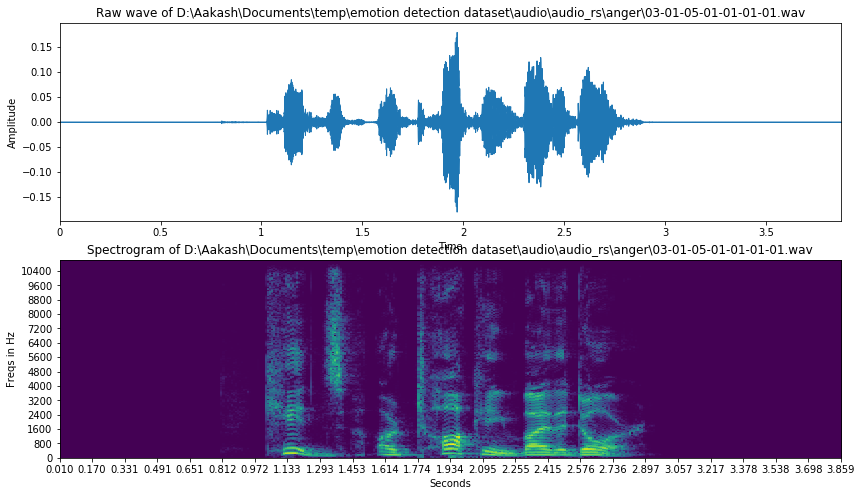

In [37]:
# Plotting Wave Form and Spectrogram
freqs, times, spectrogram = log_specgram(samples, sample_rate)

fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + filename)
ax1.set_ylabel('Amplitude')
librosa.display.waveplot(samples, sr=sample_rate)

ax2 = fig.add_subplot(212)
ax2.imshow(spectrogram.T, aspect='auto', origin='lower', 
           extent=[times.min(), times.max(), freqs.min(), freqs.max()])
ax2.set_yticks(freqs[::16])
ax2.set_xticks(times[::16])
ax2.set_title('Spectrogram of ' + filename)
ax2.set_ylabel('Freqs in Hz')
ax2.set_xlabel('Seconds')

In [47]:
mean = np.mean(spectrogram, axis=0)
std = np.std(spectrogram, axis=0)
spectrogram = (spectrogram - mean) / std

In [87]:
len(mean)

221

In [47]:
# Trim the silence voice
aa , bb = librosa.effects.trim(samples, top_db=30)
aa, bb

(array([-5.2573381e-07, -4.6874851e-07,  1.7414146e-06, ...,
        -6.3828041e-04, -1.0323879e-04,  1.4417565e-04], dtype=float32),
 array([22016, 63488]))

In [50]:
S.shape

(128, 82)

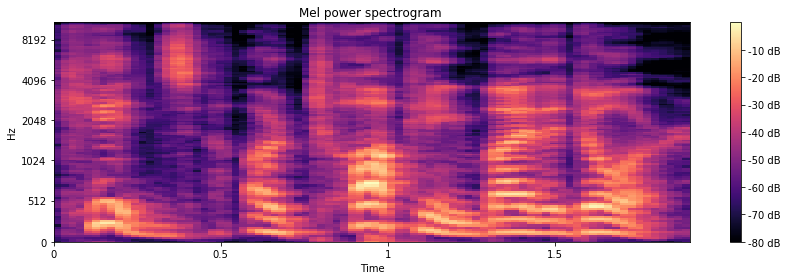

In [48]:
# Plotting Mel Power Spectrogram
S = librosa.feature.melspectrogram(aa, sr=sample_rate, n_mels=128)

# Convert to log scale (dB). We'll use the peak power (max) as reference.
log_S = librosa.power_to_db(S, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(log_S, sr=sample_rate, x_axis='time', y_axis='mel')
plt.title('Mel power spectrogram ')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

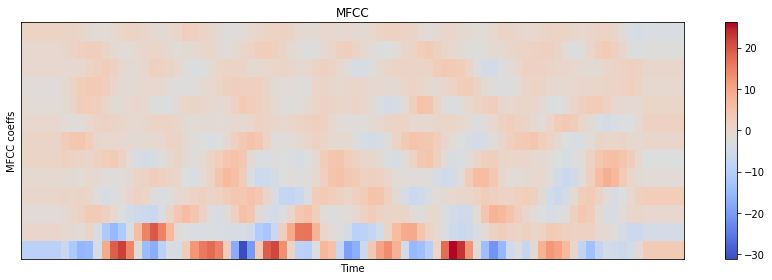

In [51]:
# Plotting MFCC
mfcc = librosa.feature.mfcc(S=log_S, n_mfcc=13)

# Let's pad on the first and second deltas while we're at it
delta2_mfcc = librosa.feature.delta(mfcc, order=2)

plt.figure(figsize=(12, 4))
librosa.display.specshow(delta2_mfcc)
plt.ylabel('MFCC coeffs')
plt.xlabel('Time')
plt.title('MFCC')
plt.colorbar()
plt.tight_layout()

In [52]:
mfcc.shape

(13, 82)

In [112]:
temp_path = 'D:\\Aakash\\Documents\\temp\\sample_audio'

In [133]:
l = listdir(temp_path)
audio_list = listdir(temp_path)
path_list = [os.path.join(temp_path, i) for i in audio_list]

df_emotion = pd.DataFrame()
df_emotion['file_path'] = path_list

In [134]:
data = pd.DataFrame(columns=['feature'])
for i in tqdm(range(len(df_emotion))):
    X, sample_rate = librosa.load(df_emotion.file_path[i], res_type='kaiser_fast',duration=3,sr=22050*2,offset=0.5)
    sample_rate = np.array(sample_rate)
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=13), axis=0)
    feature = mfccs
    data.loc[i] = [feature]

100%|██████████| 69/69 [00:08<00:00, 21.64it/s]


In [119]:
len(data['feature'][55]), len(data['feature'][5])

(141, 259)

In [135]:
d = pd.DataFrame(data['feature'].values.tolist())
d.head()

,0,1,2,3,4,5,6,7,8,9,...,249,250,251,252,253,254,255,256,257,258
0,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,-70.267764,...,-70.267764,-70.267764,-69.957707,-68.377602,-69.862569,-70.267764,-70.122135,-68.554960,-70.206530,-70.267764
1,-67.557395,-67.557395,-67.557395,-67.557395,-67.557395,-67.557395,-65.239801,-65.536197,-67.557395,-67.557395,...,-67.557395,-67.557395,-67.557395,-67.557395,-67.557395,-67.557395,-67.557395,-67.557395,-67.126574,-67.557395
2,-69.673289,-69.693311,-69.693311,-69.693311,-69.693311,-69.693311,-69.693311,-69.620774,-69.693311,-68.906572,...,-69.693311,-69.693311,-69.693311,-69.693311,-69.693311,-69.383522,-69.693311,-69.693311,-69.693311,-69.693311
3,-69.051400,-69.051400,-69.051400,-69.051400,-69.051400,-68.754863,-69.051400,-69.051400,-69.051400,-68.359101,...,-65.446950,-68.552088,-69.051400,-69.051400,-69.051400,-68.688614,-69.051400,NaN,NaN,NaN
4,-73.841370,-73.841370,-73.841370,-73.719655,-73.841370,-73.841370,-73.841370,-73.303635,-72.806811,-73.841370,...,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370,-73.841370


In [136]:
for i in range(len(d.index)) :
    print("Nan in row ", i , " : " ,  d.iloc[i].isnull().sum())

Nan in row  0  :  0
Nan in row  1  :  0
Nan in row  2  :  0
Nan in row  3  :  3
Nan in row  4  :  0
Nan in row  5  :  0
Nan in row  6  :  0
Nan in row  7  :  0
Nan in row  8  :  3
Nan in row  9  :  3
Nan in row  10  :  0
Nan in row  11  :  0
Nan in row  12  :  0
Nan in row  13  :  0
Nan in row  14  :  0
Nan in row  15  :  0
Nan in row  16  :  0
Nan in row  17  :  0
Nan in row  18  :  0
Nan in row  19  :  0
Nan in row  20  :  0
Nan in row  21  :  0
Nan in row  22  :  0
Nan in row  23  :  0
Nan in row  24  :  0
Nan in row  25  :  0
Nan in row  26  :  0
Nan in row  27  :  178
Nan in row  28  :  152
Nan in row  29  :  119
Nan in row  30  :  173
Nan in row  31  :  172
Nan in row  32  :  155
Nan in row  33  :  135
Nan in row  34  :  167
Nan in row  35  :  124
Nan in row  36  :  125
Nan in row  37  :  36
Nan in row  38  :  26
Nan in row  39  :  29
Nan in row  40  :  0
Nan in row  41  :  5
Nan in row  42  :  0
Nan in row  43  :  73
Nan in row  44  :  16
Nan in row  45  :  0
Nan in row  46  :  

In [130]:
import audiolab, scipy
a, fs, enc = audiolab.wavread('boatYAF193.wav')
b, fs, enc = audiolab.wavread('boneOAF192.wav')
c = scipy.vstack((a,b))
audiolab.wavwrite(c, 'file3.wav', fs, enc)

ModuleNotFoundError: No module named 'audiolab'

In [131]:
import wave

infiles = ["boatYAF193.wav", "boneOAF192.wav"]
outfile = "sounds.wav"

data= []
for infile in infiles:
    w = wave.open(infile, 'rb')
    data.append( [w.getparams(), w.readframes(w.getnframes())] )
    w.close()

output = wave.open(outfile, 'wb')
output.setparams(data[0][0])
output.writeframes(data[0][1])
output.writeframes(data[1][1])
output.close()

In [132]:
import IPython
IPython.display.Audio("sounds.wav")